# Problem Statement

# <span style="color:Green">Introduction</span>

###### <p style="font-family: Arial; font-size:1em;color:black;"> This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers. </p> 

#### <p style="font-family: Arial; font-size:1.5em;color:Green;"> Business Objectives</p>

##### <p style="font-family: Arial; font-size:1em;color:Black;"> This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.</p>

# Importing All require libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

### Ignore Warning messages

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Loading Application Data Set

In [3]:
application_data_set = pd.read_csv("application_data.csv")
application_data_set.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

#### Inspecting and Understanding more about application Data

In [4]:
application_data_set.shape

(307511, 122)

In [5]:
application_data_set.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [6]:
application_data_set.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

##### Few Observations from application Data 

###### <p style= color:Green;>1) There are 8 columns with numerical values<br>2) There are total 122 columns & 307511 rows<br>3) There are some columns which have null values and some other columns have +ve and -ve values which require fixing<br>4) Also certain columns are redundant and can be fixed</p>

###### Checking Null Values and % of it in each columns so it can be amended

In [7]:
null_values_set = application_data_set.isnull().sum().sort_values(ascending = False)
null_values_set

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

In [8]:
# function to find % of null values

def null_value_percentage(df):
    df = df.isnull().sum()/len(df)*100
    df = df.sort_values(ascending = False)
    return round(df,2)
#null_value_percentage = null_values/len(application_data_set)*100

## 2 . Data Cleaning

###### Drop all columns with more than 50% of missing or null values

In [9]:
# Columns with more than 50% missing or null Values
null_value_percentage(application_data_set)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
                               ...  
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
HOUR_APPR_PROCESS_START         0.00
SK_ID_CURR                      0.00
Length: 122, dtype: float64

In [10]:
null_more_50_per = null_value_percentage(application_data_set)[null_value_percentage(application_data_set)>50]

In [11]:
print("Num of columns having missing values more than 50% are {}".format(len(null_more_50_per)))

Num of columns having missing values more than 50% are 41


###### All the columns where null values are more than 50% shows that these columns are related to loan/client living

##### Lets Drop all these 41 columns

In [12]:
# Columns names with more than 50% null values
null_more_50_per.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE'],
      dtype='object')

In [13]:
# Dropping these columns
application_data_set.drop(columns = null_more_50_per.index,inplace=True)
print("Shape of data set after dropping columns {}".format(application_data_set.shape))

Shape of data set after dropping columns (307511, 81)


In [14]:
application_data_set

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

######  Now the remaining columns are 81 and plotting those again

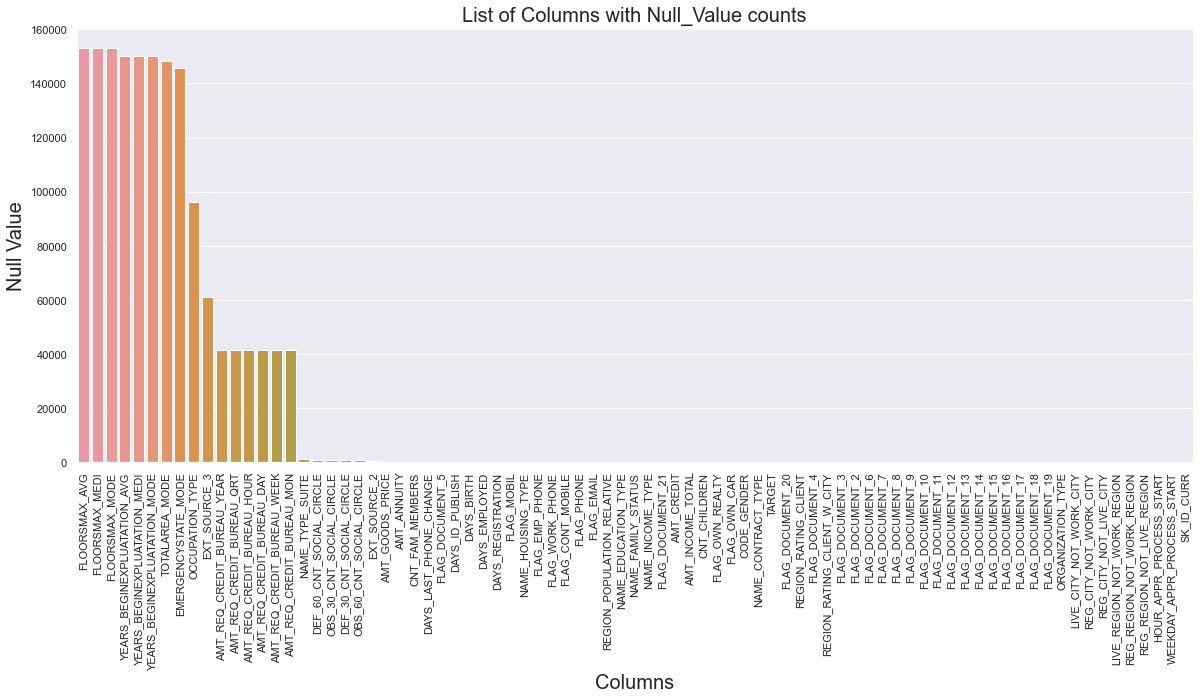

In [15]:
# Plotting Columns  where null values are less than 50% 
null_columns = application_data_set.isnull().sum().sort_values(ascending = False)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.barplot(x=null_columns.index, y=null_columns.values)
plt.title('List of Columns with Null_Value counts',fontsize = 20)
plt.xticks(rotation=90)
ax.set_xlabel("Columns", fontsize = 20)
ax.set_ylabel("Null Value", fontsize = 20)
plt.show()

######  After looking at above graph it looks like there are still few columns which has substantial null values (lets say more than 15%). Lets Tackle that

In [16]:
# columns with null values more than 15% and less than 50%
null_values_15 = null_value_percentage(application_data_set)[null_value_percentage(application_data_set).values > 15 ]
null_values_15

FLOORSMAX_AVG                   49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64

###### Above Data shows that last two columns viz. OCCUPATION_TYPE and EXT_SOURCE_3 looks relevant for business objective and rest columns can be dropped 

In [17]:
application_data_set.drop(["FLOORSMAX_AVG","FLOORSMAX_MEDI","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_AVG","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BEGINEXPLUATATION_MODE","TOTALAREA_MODE","EMERGENCYSTATE_MODE"], axis=1, inplace = True)

In [18]:
# shape of remaining data frame
application_data_set.shape

(307511, 73)

In [19]:
application_data_set.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

###### Need to understand the above columns relation with our business objective or target column. First Checking relation normalized columns   viz. 'EXT_SOURCE_2', 'EXT_SOURCE_3'

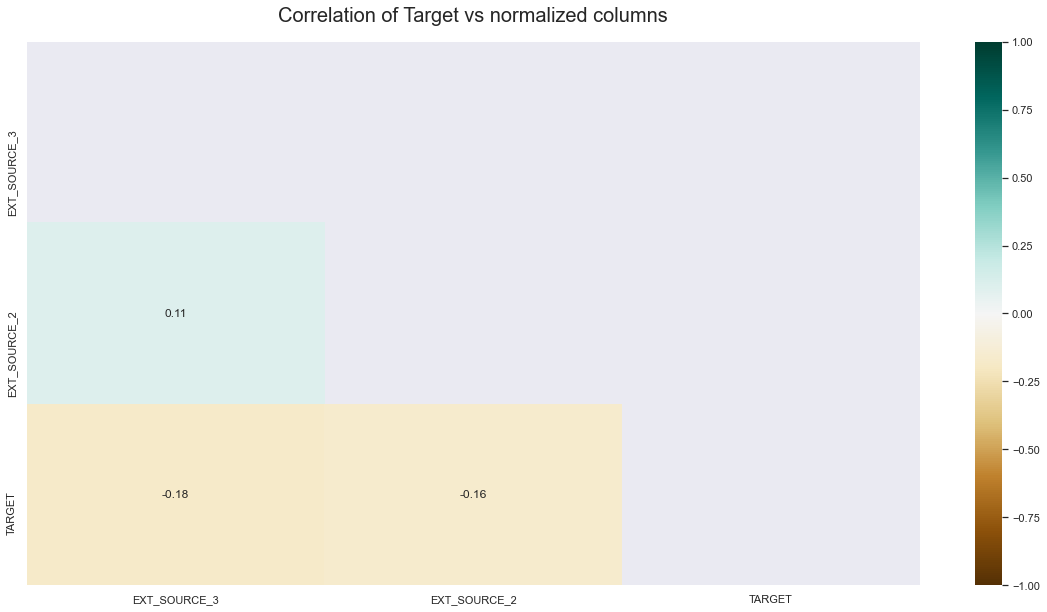

In [20]:
#plotting heatmap which provides co-relation between variables
plt.figure(figsize=(20, 10))
# Using the mask to just show the lower traingular matrix
mask = np.triu(np.ones_like(application_data_set[["EXT_SOURCE_3","EXT_SOURCE_2","TARGET"]].corr(), dtype=np.bool))
heatmap = sns.heatmap(application_data_set[["EXT_SOURCE_3","EXT_SOURCE_2","TARGET"]].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of Target vs normalized columns', fontdict={'fontsize':20}, pad=20);

###### Correlation used above to represent the statistical measure of linear relationship between two variables and target variable. This can help to measure of dependence between two different variables. The Correlation between Target and other normalized column is Weak negative suggesting  no causal relationship. Hence we drop these two columns

In [21]:
#dropping two normalized columns as inferred from heat map

application_data_set.drop(["EXT_SOURCE_3","EXT_SOURCE_2"], axis=1, inplace= True)

In [22]:
application_data_set.shape

(307511, 71)

In [23]:
null_value_percentage(application_data_set)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
                              ...  
REG_CITY_NOT_LIVE_CITY         0.00
REG_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_LIVE_REGION     0.00
HOUR_APPR_PROCESS_START        0.00
SK_ID_CURR                     0.00
Length: 71, dtype: float64

###### Now the FLAG columns relationship with target variable can be investigated. Lets Investigate that 

######  Columns like FLAG_OWN_CAR, FLAG_OWN_REALTY, FLAG_MOBIL, FLAG_PHONE and FLAG_CONT_MOBILE , FLAG_EMP_PHONE,FLAG_WORK_PHONE and FLAG_EMAIL needs investigation

In [24]:
flag_dataframe = application_data_set[["FLAG_OWN_CAR","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_PHONE",
                                "FLAG_CONT_MOBILE","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_EMAIL","TARGET"]]

In [25]:
flag_dataframe.head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_PHONE  FLAG_CONT_MOBILE  \
0            N               Y           1           1                 1   
1            N               N           1           1                 1   
2            Y               Y           1           1                 1   
3            N               Y           1           0                 1   
4            N               Y           1           0                 1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_EMAIL  TARGET  
0               1                0           0       1  
1               1                0           0       0  
2               1                1           0       0  
3               1                0           0       0  
4               1                0           0       0

In [26]:
flag_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   FLAG_OWN_CAR      307511 non-null  object
 1   FLAG_OWN_REALTY   307511 non-null  object
 2   FLAG_MOBIL        307511 non-null  int64 
 3   FLAG_PHONE        307511 non-null  int64 
 4   FLAG_CONT_MOBILE  307511 non-null  int64 
 5   FLAG_EMP_PHONE    307511 non-null  int64 
 6   FLAG_WORK_PHONE   307511 non-null  int64 
 7   FLAG_EMAIL        307511 non-null  int64 
 8   TARGET            307511 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 21.1+ MB


In [27]:
flag_dataframe["TARGET"] = flag_dataframe["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

In [28]:
flag_dataframe["TARGET"]

0         Defaulter
1           Repayer
2           Repayer
3           Repayer
4           Repayer
            ...    
307506      Repayer
307507      Repayer
307508      Repayer
307509    Defaulter
307510      Repayer
Name: TARGET, Length: 307511, dtype: object

###### Now replace  "1" as Y & "0" as N for columns starting with FLAG 

In [29]:
for i in flag_dataframe.loc[:, flag_dataframe.columns != 'TARGET']:
    flag_dataframe[i] = flag_dataframe[i].replace({1:"Y", 0:"N"})

In [30]:
flag_dataframe.head()

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_PHONE FLAG_CONT_MOBILE  \
0            N               Y          Y          Y                Y   
1            N               N          Y          Y                Y   
2            Y               Y          Y          Y                Y   
3            N               Y          Y          N                Y   
4            N               Y          Y          N                Y   

  FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_EMAIL     TARGET  
0              Y               N          N  Defaulter  
1              Y               N          N    Repayer  
2              Y               Y          N    Repayer  
3              Y               N          N    Repayer  
4              Y               N          N    Repayer

In [31]:
df_flag_own_car = flag_dataframe.groupby(['FLAG_OWN_CAR',"TARGET"]).size().reset_index(name='counts')
df_flag_own_reality = flag_dataframe.groupby(['FLAG_OWN_REALTY',"TARGET"]).size().reset_index(name='counts')
df_flag_mobil = flag_dataframe.groupby(['FLAG_MOBIL',"TARGET"]).size().reset_index(name='counts')
df_flag_phone = flag_dataframe.groupby(['FLAG_PHONE',"TARGET"]).size().reset_index(name='counts')
df_flag_cont_mobile = flag_dataframe.groupby(['FLAG_CONT_MOBILE',"TARGET"]).size().reset_index(name='counts')
df_flag_emp_phone = flag_dataframe.groupby(['FLAG_EMP_PHONE',"TARGET"]).size().reset_index(name='counts')
df_flag_work_phone = flag_dataframe.groupby(['FLAG_WORK_PHONE',"TARGET"]).size().reset_index(name='counts')
df_flag_email = flag_dataframe.groupby(['FLAG_EMAIL',"TARGET"]).size().reset_index(name='counts')


###### Now Plot all flag columns with respect to Target variable to get insight  

Text(0, 0.5, 'Count')

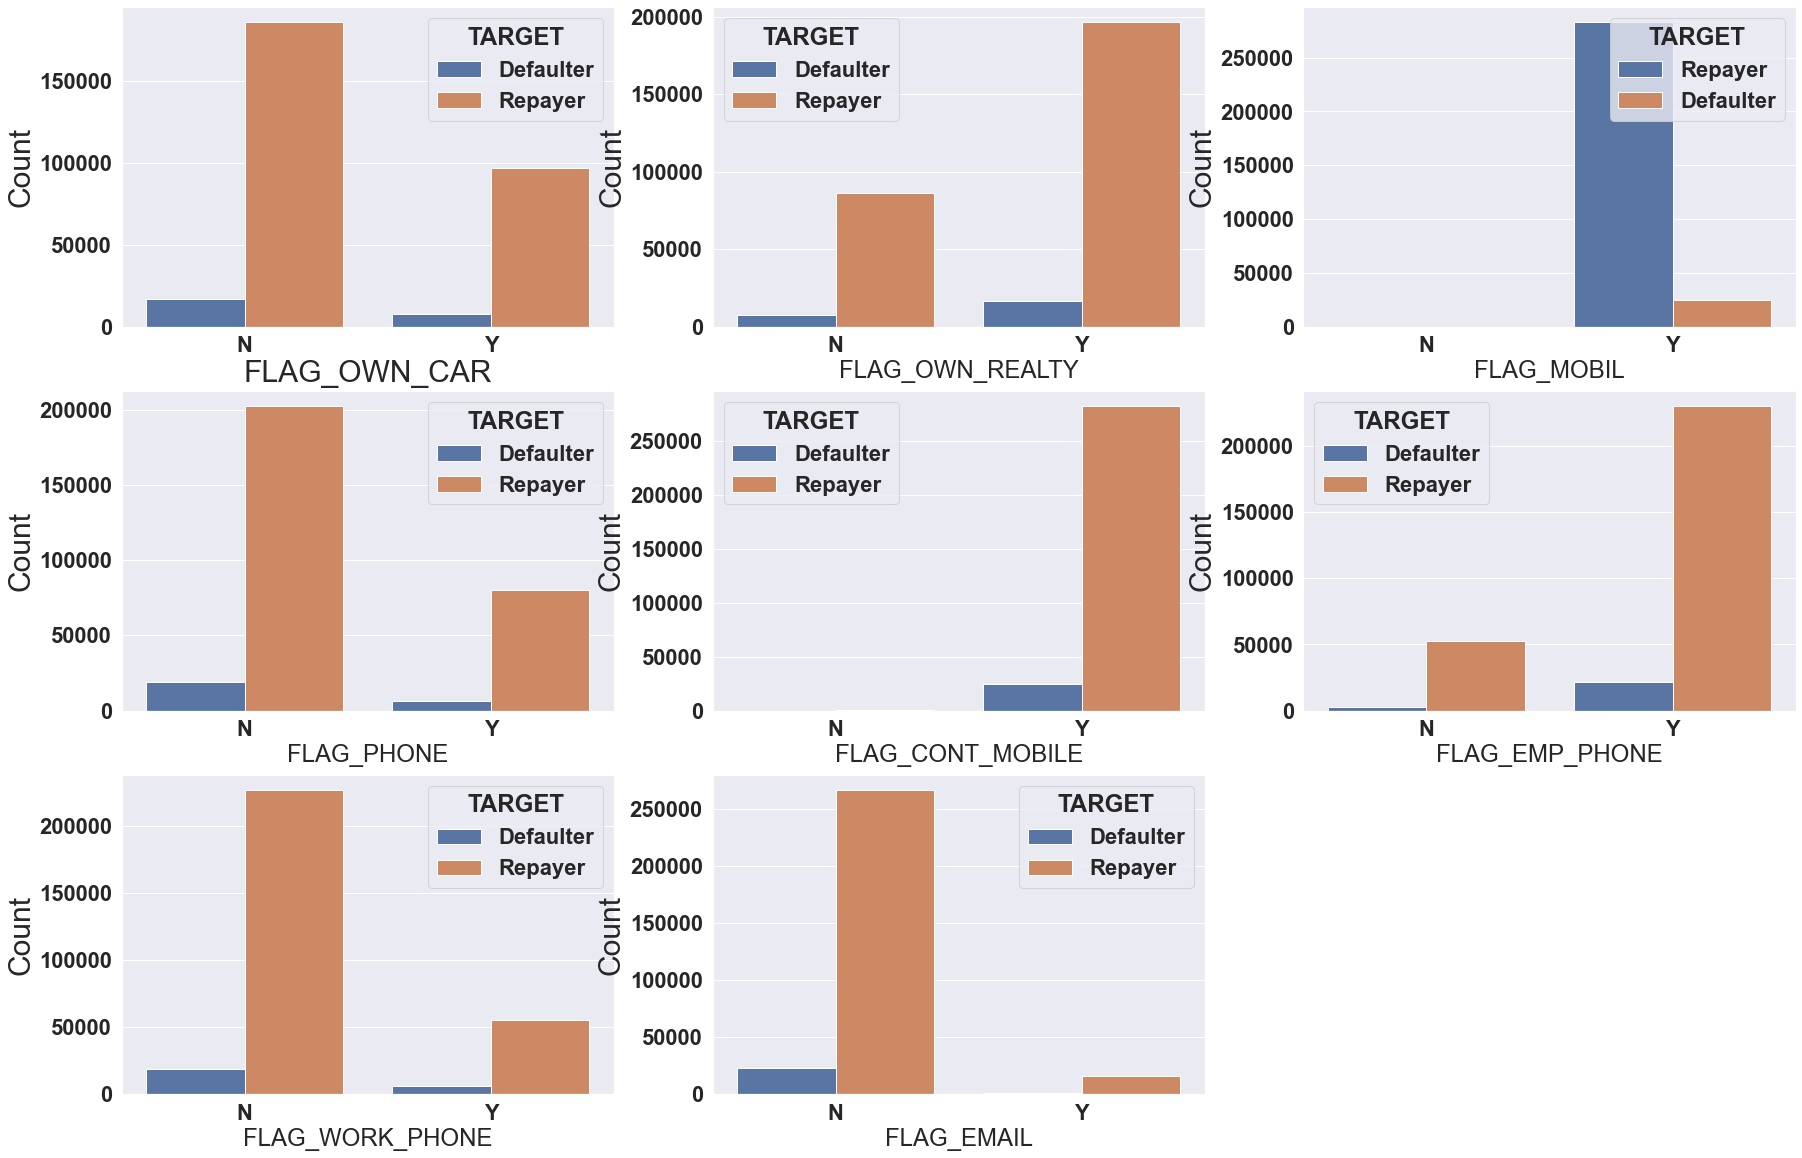

In [32]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(3,3,1)
ax = sns.barplot(x=df_flag_own_car["FLAG_OWN_CAR"], y=df_flag_own_car["counts"], hue=df_flag_own_car["TARGET"])
ax.set_xlabel("FLAG_OWN_CAR",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,2)
ax = sns.barplot(x=df_flag_own_reality["FLAG_OWN_REALTY"], y=df_flag_own_reality["counts"], hue=df_flag_own_reality["TARGET"])
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,3)
ax = sns.barplot(x=df_flag_mobil["FLAG_MOBIL"], y=df_flag_mobil["counts"], hue=df_flag_mobil["TARGET"])
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,4)
ax = sns.barplot(x=df_flag_phone["FLAG_PHONE"], y=df_flag_phone["counts"], hue=df_flag_phone["TARGET"])
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,5)
ax = sns.barplot(x=df_flag_cont_mobile["FLAG_CONT_MOBILE"], y=df_flag_cont_mobile["counts"], hue=df_flag_cont_mobile["TARGET"])
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,6)
ax = sns.barplot(x=df_flag_emp_phone["FLAG_EMP_PHONE"], y=df_flag_emp_phone["counts"], hue=df_flag_emp_phone["TARGET"])
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,7)
ax = sns.barplot(x=df_flag_work_phone["FLAG_WORK_PHONE"], y=df_flag_work_phone["counts"], hue=df_flag_work_phone["TARGET"])
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,8)
ax = sns.barplot(x=df_flag_email["FLAG_EMAIL"], y=df_flag_email["counts"], hue=df_flag_email["TARGET"])
ax.set_ylabel("Count", fontsize = 30)

###### Data Insight : Columns likes FLAG_OWN_REALTY, FLAG_MOBIL , FLAG_CONT_MOBILE, FLAG_EMP_PHONE, shows there are more repayers than defaulter and hence keep these columns and remove all other columns for furhter analysis.

In [33]:
application_data_set.drop(["FLAG_OWN_CAR","FLAG_PHONE","FLAG_WORK_PHONE","FLAG_EMAIL"], axis=1, inplace= True)

In [34]:
application_data_set.shape

(307511, 67)

###### As done above, similar analysis can be done for each FLAG_DOCUMENT columns, it was observed that Columns which start with  FLAG_DOCUMENT  <span style="font-family: Arial; font-size:1.0em;color:Red;">except FLAG_DOCUMENT_3 </span> has no relationship with business objective or target variable hence all FLAG_DOCUMENT but <span style="font-family: Arial; font-size:1.0em;color:Red;">but  FLAG_DOCUMENT_3 </span> can be eliminated

In [35]:
flag_document_dataframe = application_data_set[["FLAG_DOCUMENT_3","TARGET"]]

In [36]:
df_flag_document_3 = flag_document_dataframe.groupby(['FLAG_DOCUMENT_3',"TARGET"]).size().reset_index(name='counts')

In [37]:
for i in df_flag_document_3.loc[:, df_flag_document_3.columns != 'TARGET']:
    df_flag_document_3[i] = df_flag_document_3[i].replace({1:"Y", 0:"N"})

In [38]:
df_flag_document_3["TARGET"] = df_flag_document_3["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

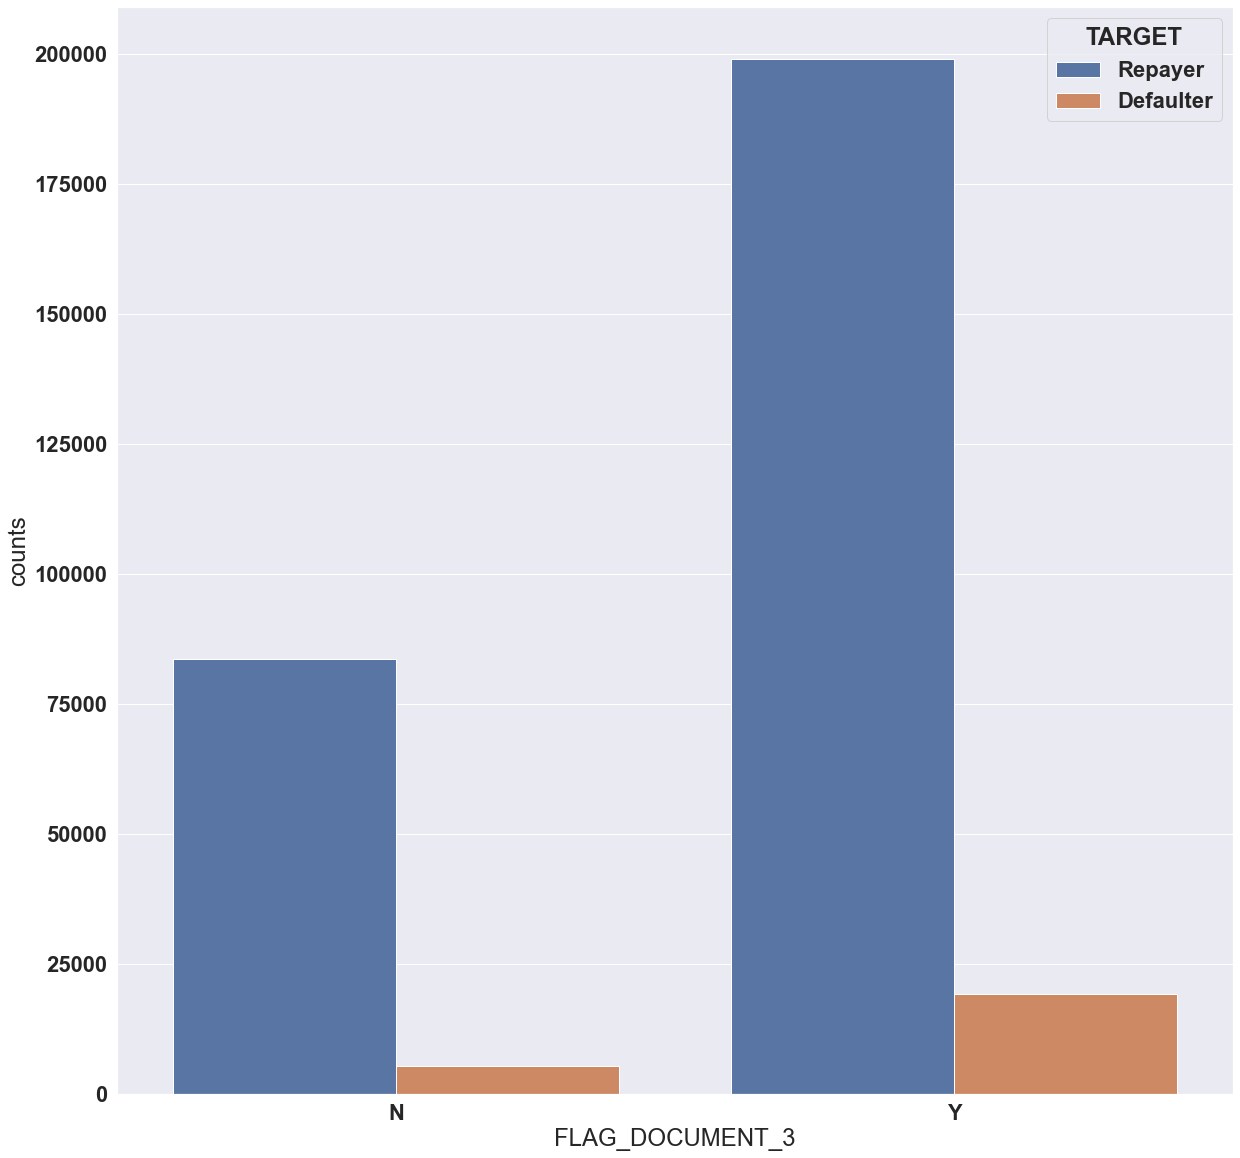

In [39]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
ax = sns.barplot(x=df_flag_document_3["FLAG_DOCUMENT_3"], y=df_flag_document_3["counts"], hue=df_flag_document_3["TARGET"])

In [40]:
application_data_set

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0           100002       1         Cash loans           M               Y   
1           100003       0         Cash loans           F               N   
2           100004       0    Revolving loans           M               Y   
3           100006       0         Cash loans           F               Y   
4           100007       0         Cash loans           M               Y   
...            ...     ...                ...         ...             ...   
307506      456251       0         Cash loans           M               N   
307507      456252       0         Cash loans           F               Y   
307508      456253       0         Cash loans           F               Y   
307509      456254       1         Cash loans           F               Y   
307510      456255       0         Cash loans           F               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0              351000.0  ...                0                0   
1             1129500.0  ...                0                0   
2              135000.0  ...                0                0   
3              297000.0  ...                0                0   
4              513000.0  ...                0                0   
...                 ...  ...              ...              ...   
307506         225000.0  ...                0                0   
307507         225000.0  ...                0                0   
307508         585000.0  ...                0                0   
307509         319500.0  ...                0                0   
307510         675000.0  ...                0                0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                     0                0                        0.0   
1                     0                0                        0.0   
2                     0                0                        0.0   
3                     0                0                        NaN   
4                     0                0                        0.0   
...                 ...              ...                        ...   
307506                0                0                        NaN   
307507                0                0                        NaN   
307508                0                0                        1.0   
307509                0                0                        0.0   
307510                0                0                        0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             NaN                         NaN   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        NaN                         NaN   
307507                        NaN                         NaN   
307508                        0.0              

###### Now elimiating all other but FLAG_DOCUMENT_3 columns. First creating a list of columns which start with FLAG_DOCUMENT and eliminate that  

In [41]:
# combining flag_document in one list 
columns_name = application_data_set.columns.values 
inter_flag_document_column = [a for a in columns_name if "FLAG_DOCUMENT" in a ]
flag_document_column = [col for col in inter_flag_document_column if "FLAG_DOCUMENT_3" not in col]

In [42]:
flag_document_column

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [43]:
len(flag_document_column)

19

In [44]:
application_data_set.drop(flag_document_column, axis=1, inplace= True)

In [45]:
application_data_set.shape

(307511, 48)

In [46]:
application_data_set.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0  ...                      2.0                      2.0   
1  ...                      1.0                      0.0   
2  ...                      0.0                      0.0   
3  ...                      2.0                      0.0   
4  ...                      0.0                      0.0   

  DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                -1134.0               1                        0.0   
1                 -828.0               1                        0.0   
2                 -815.0               0                        0.0   
3                 -617.0               1                        NaN   
4                -1106.0               0                        0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 48 columns]

In [47]:
len(application_data_set.columns)

48

In [48]:
application_data_set.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHA

###### Now there are 48 columns are remaining and lets see what can be done on tackling the relevant null values in these remaining columns 

In [49]:
null_value_percentage(application_data_set).head(13)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
dtype: float64

# 3 . Imputation : 7 columns having null values greater than 1% , will impute that lets do it one by one

###### As can be seen above the First Column is OCCUPATION_TYPE and has 31.35 % missing values.  Lets Impute that with NA

In [50]:
application_data_set["OCCUPATION_TYPE"] = application_data_set["OCCUPATION_TYPE"].fillna("NA") 

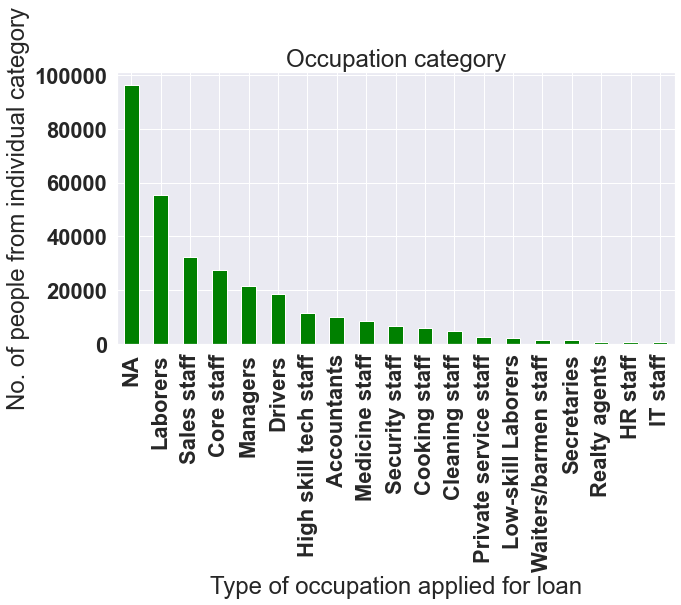

In [51]:
# Lets plot the graph for the OCCUPATION_TYPE to check the which category applied for loan the most

fig = plt.figure(figsize = (10, 5))
#  Bar plot
application_data_set["OCCUPATION_TYPE"].value_counts().plot.bar(color ='green',width = 0.5,rot=90)
plt.xlabel("Type of occupation applied for loan")
plt.ylabel("No. of people from individual category")
plt.title("Occupation category")
plt.show()

###### NA are the highest % amonsgt all people applied for loan 

###### Now lets see next columns which start with AMT_REQ  and has 13.50 % missing values.  Lets check that columns. These columns represent Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application) and should have discrete numeric values and hence null values can be replaced with median


In [52]:
amt_columns_filter = [col for col in application_data_set if col.startswith('AMT_REQ')]
amt_columns_filter

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [53]:
application_data_set[amt_columns_filter].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [54]:
application_data_set[amt_columns_filter].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

###### Now lets impute the above columns with median as column should have numeric value

In [55]:
application_data_set.fillna(application_data_set[amt_columns_filter].median(),inplace = True)

In [56]:
application_data_set[amt_columns_filter].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [57]:
application_data_set.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307510.000000    307511.000000               307511.000000   
mean              -962.858788         0.710023                    0.005538   
std                826.808487         0.453752                    0.078014   
min              -4292.000000         0.000000                    0.000000   
25%              -1570.000000         0.000000                    0.000000   
50%               -757.000000         1.000000                    0.000000   
75%               -274.000000         1.000000                    0.000000   
max                  0.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723   
std                     0.103037                    0.190728   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307511.000000              307511.000000   
mean                    0.231293                   0.229631   
std                     0.856810                   0.744059   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%     

In [58]:
null_value_percentage(application_data_set)

NAME_TYPE_SUITE                0.42
OBS_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
DAYS_LAST_PHONE_CHANGE         0.00
DAYS_BIRTH                     0.00
REGION_POPULATION_RELATIVE     0.00
NAME_EDUCATION_TYPE            0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
NAME_HOUSING_TYPE              0.00
NAME_FAMILY_STATUS             0.00
AMT_REQ_CREDIT_BUREAU_YEAR     0.00
AMT_CREDIT                     0.00
NAME_INCOME_TYPE               0.00
FLAG_MOBIL                     0.00
AMT_INCOME_TOTAL               0.00
CNT_CHILDREN                   0.00
FLAG_OWN_REALTY                0.00
CODE_GENDER                    0.00
NAME_CONTRACT_TYPE             0.00
TARGET                         0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE             

###### The columns like DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE have negative or mixed values and need to be amended

In [59]:
days_colums_filter = [col for col in application_data_set if col.startswith('DAYS')]
days_colums_filter

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [60]:
application_data_set[days_colums_filter].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [61]:
#replacing negative values

application_data_set[days_colums_filter]= abs(application_data_set[days_colums_filter])

In [62]:
application_data_set[days_colums_filter].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

### Converting 'DAYS_BIRTH' to years and binning

In [63]:
application_data_set['DAYS_BIRTH']= (application_data_set['DAYS_BIRTH']/365).astype(int)

In [64]:
application_data_set['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [65]:
application_data_set['DAYS_BIRTH_BINS']=pd.cut(application_data_set['DAYS_BIRTH'], bins=[0,20,25,30,35,40,45,50,55,60,100], labels=["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-Above"])

In [66]:
application_data_set['DAYS_BIRTH_BINS'].value_counts()

35-40       43680
40-45       39997
30-35       39437
25-30       36488
50-55       35097
45-50       34404
55-60       32722
60-Above    29368
20-25       16317
0-20            1
Name: DAYS_BIRTH_BINS, dtype: int64

In [67]:
application_data_set["DAYS_BIRTH_BINS"].value_counts(normalize= True)*100

35-40       14.204370
40-45       13.006689
30-35       12.824582
25-30       11.865592
50-55       11.413250
45-50       11.187892
55-60       10.640920
60-Above     9.550227
20-25        5.306152
0-20         0.000325
Name: DAYS_BIRTH_BINS, dtype: float64

### Converting total years of employment from "DAYS_EMPLOYED" column

In [68]:
application_data_set["YEARS_EMPLOYED"] = (application_data_set["DAYS_EMPLOYED"]/365).astype(int)
application_data_set["EMPLOYEMENT_YEARS"] = pd.cut(application_data_set["YEARS_EMPLOYED"], bins=[0,5,10,15,20,25,30,50], labels=["0-5","5-10","10-15","15-20","20-25","25-30","30-Above"])

In [69]:
application_data_set["EMPLOYEMENT_YEARS"].value_counts()

0-5         124634
5-10         55983
10-15        22928
15-20         9730
20-25         5465
25-30         2944
30-Above      2549
Name: EMPLOYEMENT_YEARS, dtype: int64

In [70]:
application_data_set["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         55.582363
5-10        24.966441
10-15       10.225078
15-20        4.339236
20-25        2.437197
25-30        1.312920
30-Above     1.136764
Name: EMPLOYEMENT_YEARS, dtype: float64

######  Now again screening thorugh the description of the columns like AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE it was observed that these columns have large values and can be  catgorised and <span style= color:Green;>but same is not TRUE for the SK_ID_CURR columns as it represent the ID of loan <span>
    
    

###### Binning AMT_INCOME_TOTAL

In [71]:
application_data_set['AMT_INCOME_TOTAL']=(application_data_set['AMT_INCOME_TOTAL']/100000).astype(float)


application_data_set['AMT_INCOME_RANGE']=pd.cut(application_data_set['AMT_INCOME_TOTAL'],bins = [0,1,2,3,4,5,6,7,8,9,10,11],labels=['0-1Lakh','1Lakh-2Lakh','2Lakh-3Lakh','3Lakh-4Lakh','4Lakh-5Lakh','5Lakh-6Lakh','6Lakh-7Lakh','7Lakh-8Lakh','8Lakh-9Lakh','9Lakh-10Lakh','10Lakh Above'])

In [72]:
application_data_set['AMT_INCOME_RANGE'].value_counts()

1Lakh-2Lakh     155898
2Lakh-3Lakh      65176
0-1Lakh          63698
3Lakh-4Lakh      14676
4Lakh-5Lakh       5361
5Lakh-6Lakh       1095
6Lakh-7Lakh        869
8Lakh-9Lakh        298
7Lakh-8Lakh        162
9Lakh-10Lakh        28
10Lakh Above        18
Name: AMT_INCOME_RANGE, dtype: int64

###### Binning AMT_CREDIT

In [73]:
application_data_set['AMT_CREDIT']=(application_data_set['AMT_CREDIT']/100000).astype(float)


application_data_set['AMT_CREDIT_RANGE']=pd.cut(application_data_set['AMT_CREDIT'],bins=[0,1,2,3,4,5,6,7,8,9,10,100],labels=['0-1Lakh','1Lakh-2Lakh','2Lakh-3Lakh','3Lakh-4Lakh','4Lakh-5Lakh','5Lakh-6Lakh','6Lakh-7Lakh','7Lakh-8Lakh','8Lakh-9Lakh','9Lakh-10Lakh','10Lakh Above'])

In [74]:
application_data_set['AMT_INCOME_RANGE'].value_counts()

1Lakh-2Lakh     155898
2Lakh-3Lakh      65176
0-1Lakh          63698
3Lakh-4Lakh      14676
4Lakh-5Lakh       5361
5Lakh-6Lakh       1095
6Lakh-7Lakh        869
8Lakh-9Lakh        298
7Lakh-8Lakh        162
9Lakh-10Lakh        28
10Lakh Above        18
Name: AMT_INCOME_RANGE, dtype: int64

###### Binning AMT_GOODS_PRICE

In [75]:
application_data_set['AMT_GOODS_PRICE']=(application_data_set['AMT_GOODS_PRICE']/100000).astype(float)
bins=[0,1,2,3,4,5,6,7,8,9,10,100]

application_data_set['AMT_GOODS_PRICE_RANGE']=pd.cut(application_data_set['AMT_GOODS_PRICE'],bins=[0,1,2,3,4,5,6,7,8,9,10,100],labels=['0-1Lakh','1Lakh-2Lakh','2Lakh-3Lakh','3Lakh-4Lakh','4Lakh-5Lakh','5Lakh-6Lakh','6Lakh-7Lakh','7Lakh-8Lakh','8Lakh-9Lakh','9Lakh-10Lakh','10Lakh Above'])

In [76]:
application_data_set['AMT_GOODS_PRICE_RANGE'].value_counts()

2Lakh-3Lakh     62761
4Lakh-5Lakh     56973
6Lakh-7Lakh     40024
10Lakh Above    34119
1Lakh-2Lakh     32956
8Lakh-9Lakh     21484
3Lakh-4Lakh     21219
5Lakh-6Lakh     13117
0-1Lakh          8709
7Lakh-8Lakh      8110
9Lakh-10Lakh     7761
Name: AMT_GOODS_PRICE_RANGE, dtype: int64

In [77]:
application_data_set.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0             2.025    4.065975      24700.5            3.510   
1             0             2.700   12.935025      35698.5           11.295   
2             0             0.675    1.350000       6750.0            1.350   
3             0             1.350    3.126825      29686.5            2.970   
4             0             1.215    5.130000      21865.5            5.130   

   ... AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0  ...                        0.0                       0.0   
1  ...                        0.0                       0.0   
2  ...                        0.0                       0.0   
3  ...                        0.0                       0.0   
4  ...                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR DAYS_BIRTH_BINS  \
0                       0.0                        1.0           20-25   
1                       0.0                        0.0           40-45   
2                       0.0                        0.0           50-55   
3                       0.0                        1.0           50-55   
4                       0.0                        0.0           50-55   

   YEARS_EMPLOYED  EMPLOYEMENT_YEARS  AMT_INCOME_RANGE  AMT_CREDIT_RANGE  \
0               1                0-5       2Lakh-3Lakh       4Lakh-5Lakh   
1               3                0-5       2Lakh-3Lakh      10Lakh Above   
2               0                NaN           0-1Lakh       1Lakh-2Lakh   
3               8               5-10       1Lakh-2Lakh       3Lakh-4Lakh   
4               8               5-10       1Lakh-2Lakh       5Lakh-6Lakh   

   AMT_GOODS_PRICE_RANGE  
0            3Lakh-4Lakh  
1           10Lakh Above  
2            1Lakh-2Lakh  
3            2Lakh-3Lakh  
4            5Lakh-6Lakh  

[5 rows x 54 columns]

In [78]:
application_data_set.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000     307511.000000   
mean   278180.518577       0.080729       0.417052          1.687979   
std    102790.175348       0.272419       0.722121          2.371231   
min    100002.000000       0.000000       0.000000          0.256500   
25%    189145.500000       0.000000       0.000000          1.125000   
50%    278202.000000       0.000000       0.000000          1.471500   
75%    367142.500000       0.000000       1.000000          2.025000   
max    456255.000000       1.000000      19.000000       1170.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  307511.000000  307499.000000    307233.000000   
mean        5.990260   27108.573909         5.383962   
std         4.024908   14493.737315         3.694465   
min         0.450000    1615.500000         0.405000   
25%         2.700000   16524.000000         2.385000   
50%         5.135310   24903.000000         4.500000   
75%         8.086500   34596.000000         6.795000   
max        40.500000  258025.500000        40.500000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868      43.435968   67724.742149  ...   
std                      0.013831      11.954593  139443.751806  ...   
min                      0.000290      20.000000       0.000000  ...   
25%                      0.010006      34.000000     933.000000  ...   
50%                      0.018850      43.000000    2219.000000  ...   
75%                      0.028663      53.000000    5707.000000  ...   
max                      0.072508      69.000000  365243.000000  ...   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
count             306490.000000           307510.000000    307511.000000   
mean                   0.100049              962.858788         0.710023   
std                    0.362291              826.808487         0.453752   
min                    0.000000                0.000000         0.000000   
25%                    0.000000              274.000000         0.000000   
50%                    0.000000              757.000000         1.000000   
75%                    0.000000             1570.000000         1.000000   
max                   24.000000             4292.000000         1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307511.000000              307511.000000   
mean                     0.005538                   0.006055   
std                      0.078014                   0.103037   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               307511.000000              307511.000000   
mean                     0.029723                   0.231293   
std                      0.190728                   0.856810   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  YEARS_EMPLOYED  
count              307511.000000               307511.000000   307511.000000  
mean                    0.229631                    1.778463      185.021521  
std                     0.744059                    1.765523      381.972190  
min                     0.000000                    

# 4. Investigating Outliers

###### Here if the difference between 25% and 75% is large then we can investigate more on that

{'whiskers': [<matplotlib.lines.Line2D at 0x220003216d8>,
 'caps': [<matplotlib.lines.Line2D at 0x22000321c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x220003214a8>],
 'medians': [<matplotlib.lines.Line2D at 0x22000331240>],
 'fliers': [<matplotlib.lines.Line2D at 0x22000331518>],
 'means': []}

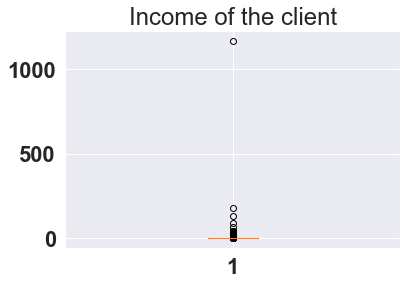

<Figure size 2160x1440 with 0 Axes>

In [79]:
# boxplot for 'AMT_INCOME_TOTAL' column to check the outliers
fig, ax = plt.subplots()
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
ax.set_title('Income of the client')
ax.boxplot(application_data_set["AMT_INCOME_TOTAL"])

###### there is outlier in Income of the client which is way higher than rest of field

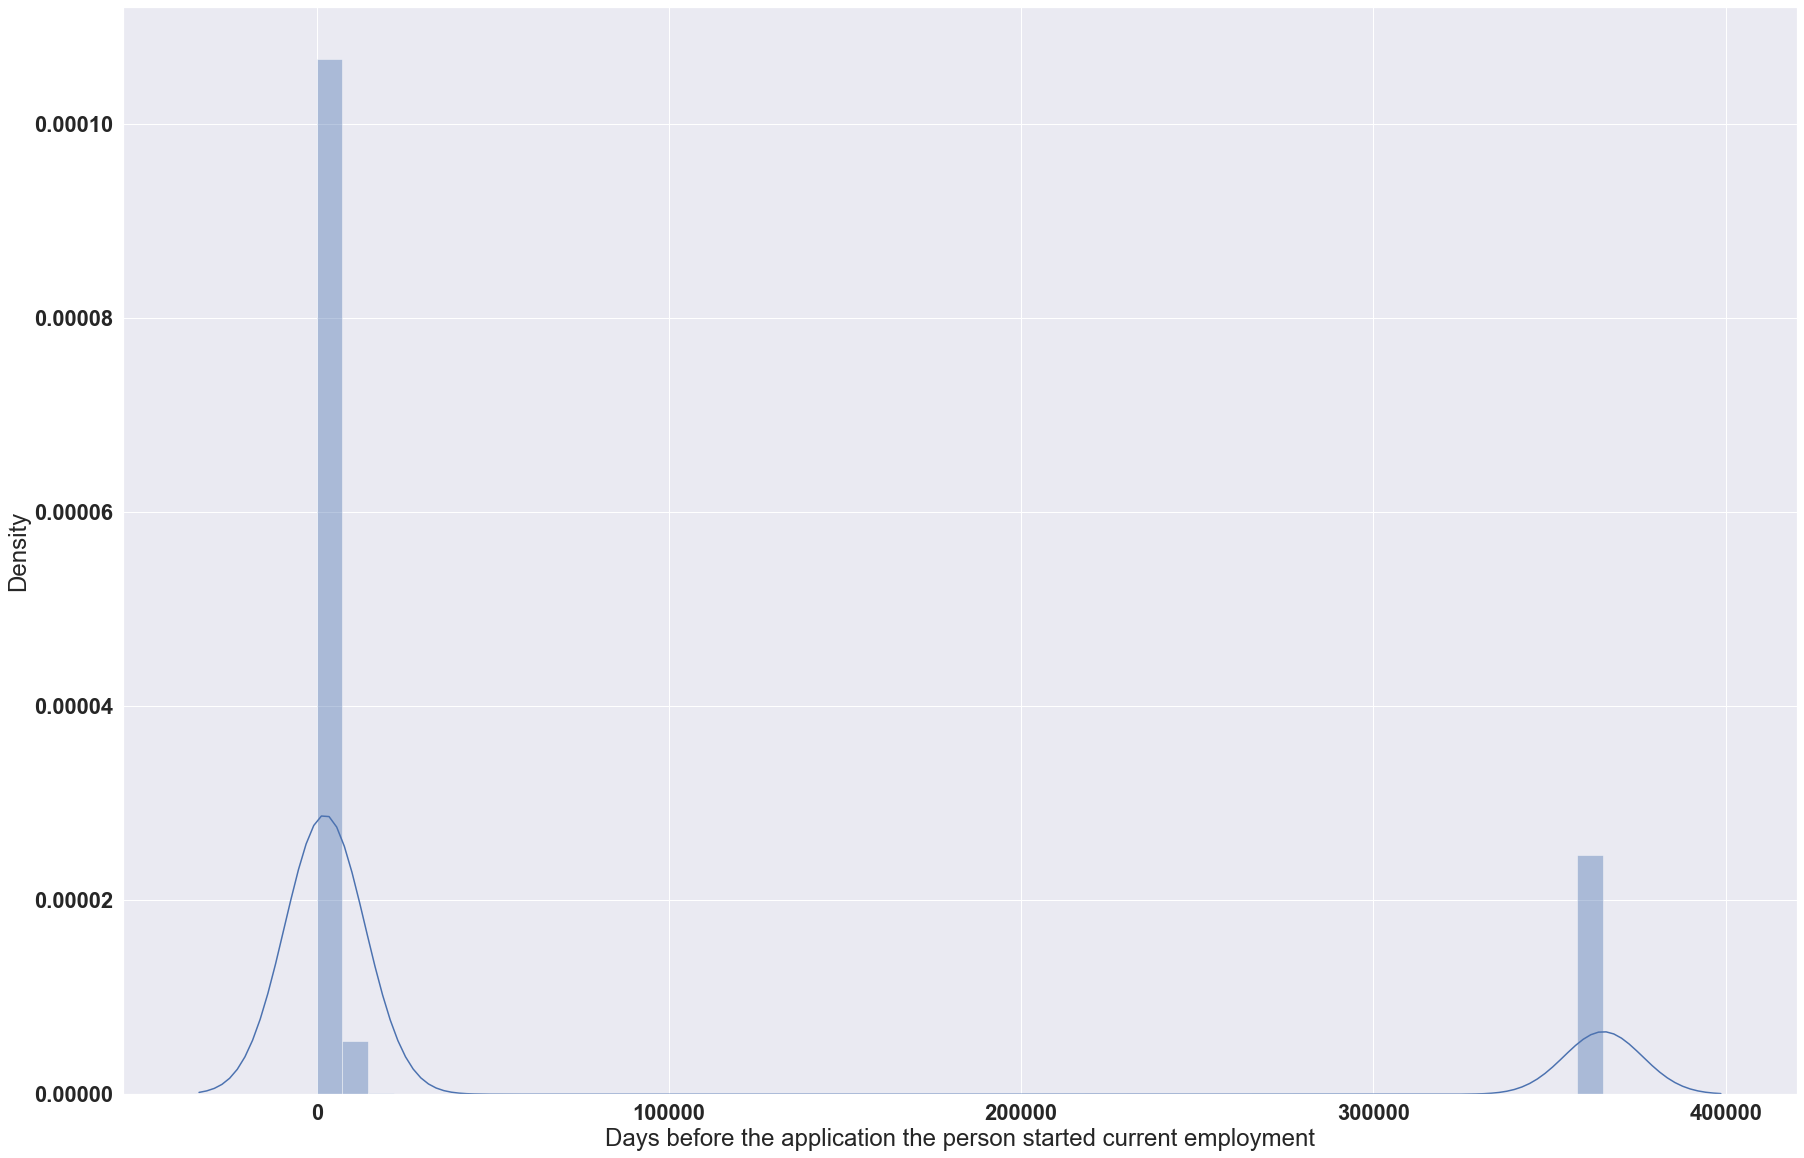

In [80]:
# Distplot for 'DAYS_EMPLOYED' column to check the outliers
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
x = pd.Series(application_data_set['DAYS_EMPLOYED'], name="Days before the application the person started current employment")
ax = sns.distplot(x)

###### The coloumn 'DAYS_EMPLOYED' shows  Days before the application the person started current employment. Hence if it is more than 20,000 that can be outlier 

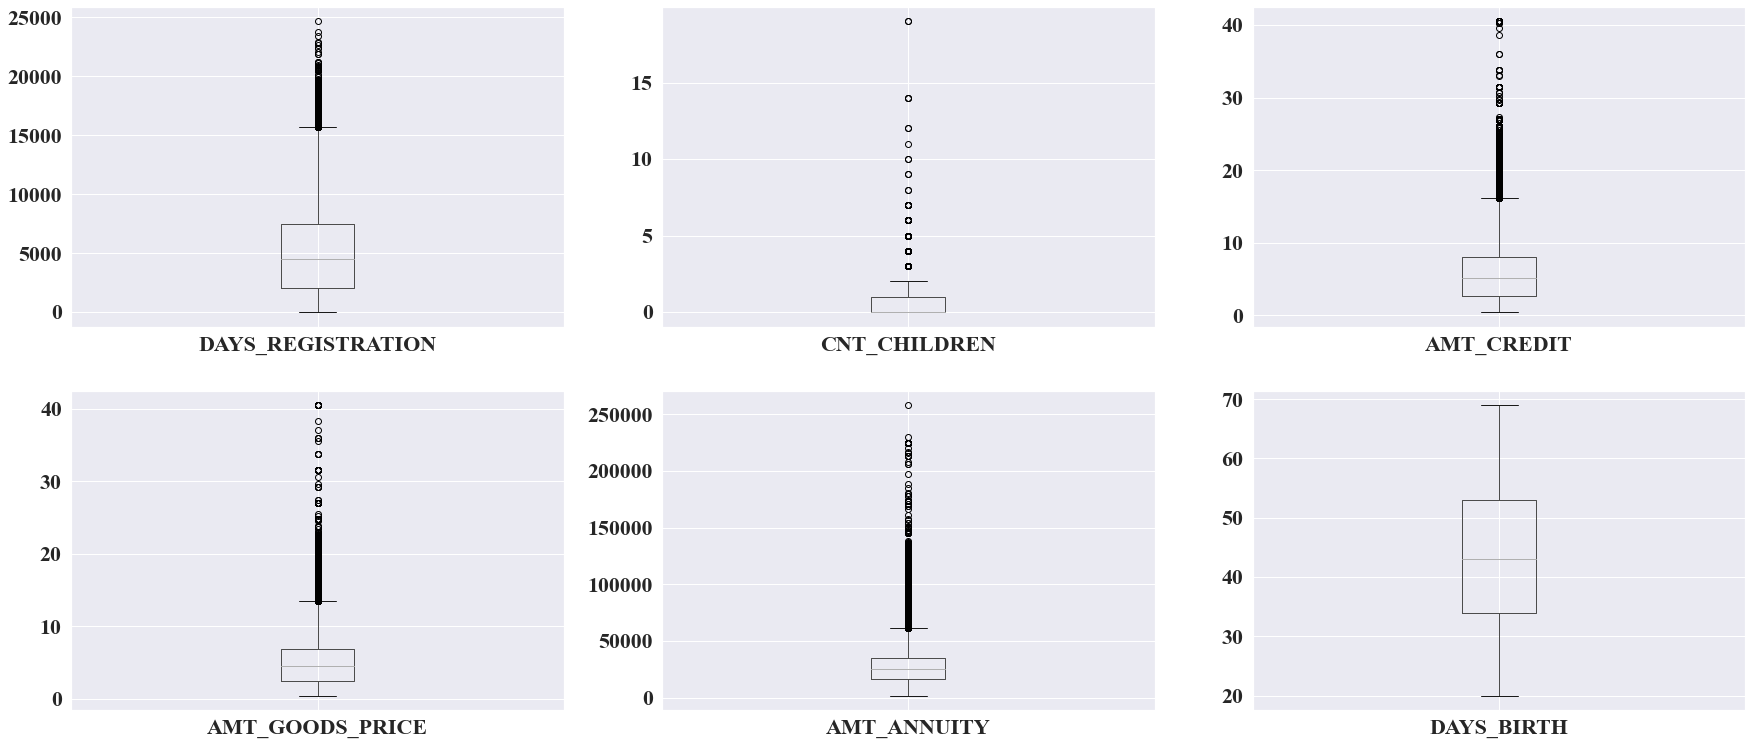

In [81]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)

plt.subplot(3,3,1)
boxplot = application_data_set.boxplot(column=['DAYS_REGISTRATION'])
plt.subplot(3,3,2)
boxplot = application_data_set.boxplot(column=['CNT_CHILDREN'])
plt.subplot(3,3,3)
boxplot = application_data_set.boxplot(column=['AMT_CREDIT'])
plt.subplot(3,3,4)
boxplot = application_data_set.boxplot(column=['AMT_GOODS_PRICE'])
plt.subplot(3,3,5)
boxplot = application_data_set.boxplot(column=['AMT_ANNUITY'])
plt.subplot(3,3,6)
boxplot = application_data_set.boxplot(column=['DAYS_BIRTH'])



###### Does not see any outlier in DAYS_BIRTH
###### In column 'AMT_ANNUITY'  a single value of > than  250000 is  an outlier.
###### In the column 'DAYS_REGISTRATION'  a value greater than 24000 is an outlier.

# 5. Convert require columns from object type to categorical for better analysis

In [82]:
application_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

In [83]:
category_columns = ['REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

In [84]:
for col in category_columns:
    application_data_set[col] = pd.Categorical(application_data_set[col])

In [85]:
application_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

# 7. Now referring to previous_application.csv spread sheet to understand more and perform data cleaning , finding outliers , data imputation on the same

In [86]:
previous_data_set = pd.read_csv("previous_application.csv")
previous_data_set.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [87]:
previous_data_set.shape

(1670214, 37)

In [88]:
previous_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [89]:
previous_data_set.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

###### There are 37 columns total
###### Some column have large values and need to convert to categorical columns
###### Some column have mixed values and need to impute


In [90]:
null_value_percentage(previous_data_set)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

In [91]:
#Drop columns with  missing values greater than 50%

previous_data_set.drop(columns = ["RATE_INTEREST_PRIVILEGED", "RATE_INTEREST_PRIMARY", "RATE_DOWN_PAYMENT", "AMT_DOWN_PAYMENT" ], inplace = True)

In [92]:
previous_data_set.shape

(1670214, 33)

In [93]:
# After going through the description of columns for previous_application spread sheet it is noticed that following are the redundant columns and can be dropped 
redundant_columns = ['NFLAG_LAST_APPL_IN_DAY','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','WEEKDAY_APPR_PROCESS_START']

previous_data_set.drop(redundant_columns,axis =1, inplace = True)


In [94]:
#Store the column name with greater than 15%  missing values 

previous_data_set_15 = null_value_percentage(previous_data_set)[null_value_percentage(previous_data_set)>15]

In [95]:
previous_data_set_15

NAME_TYPE_SUITE              49.12
NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [96]:
previous_data_set_15.index

Index(['NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_LAST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING',
       'DAYS_TERMINATION', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT'],
      dtype='object')

###### First Column is NAME_TYPE_SUITE which depicts "Who was accompanying client when he was applying for the loan"  has 49.12 % missing values.  Lets Impute that with NA

In [97]:
previous_data_set["NAME_TYPE_SUITE"] = previous_data_set["NAME_TYPE_SUITE"].fillna("NA") 
null_value_percentage(previous_data_set)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_TYPE            0.00
AMT_APPLICATION               0.00
NAME_PAYMENT_TYPE             0.00
SK_ID_CURR                    0.00
DAYS_DECISION                 0.00
NAME_GOODS_CATEGORY           0.00
CODE_REJECT_REASON            0.00
NAME_TYPE_SUITE               0.00
NAME_CLIENT_TYPE              0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
NAME_YIELD_GROUP              0.00
SK_ID_PREV          

######  Convert negative values to positive  for following columns

In [98]:
previous_data_set.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.284699e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     2.278473e+05  -8.806797e+02      3.139511e+02   
std    3.185746e+05     3.153966e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00  -2.922000e+03     -1.000000e+00   
25%    2.416050e+04     5.084100e+04  -1.300000e+03     -1.000000e+00   
50%    8.054100e+04     1.123200e+05  -5.810000e+02      3.000000e+00   
75%    2.164185e+05     2.340000e+05  -2.800000e+02      8.200000e+01   
max    6.905160e+06     6.905160e+06  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

In [99]:
# Converting Negative values to positive values

negative_to_positive = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

for col in negative_to_positive:
    previous_data_set[col] = abs(previous_data_set[col]) 

In [100]:
previous_data_set.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.284699e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     2.278473e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     3.153966e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     5.084100e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     1.123200e+05   5.810000e+02      3.000000e+00   
75%    2.164185e+05     2.340000e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342340.056543    15949.224065   
std    1.456729e+01        88413.495220    72007.270877   
min    0.000000e+00            2.000000        2.000000   
25%    6.000000e+00       365243.000000      475.000000   
50%    1.200000e+01       365243.000000      921.000000   
75%    2.400000e+01       365243.000000     1825.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                35163.363265   78152.730207      83505.775017   
std                106405.950190  148833.342466     152484.418802   
min                     0.000000       2.000000          2.000000   
25%                   257.000000     455.000000        447.000000   
50%                   741.000000    1155.000000       1171.000000   
75%                  1735.000000    2418.000000       2501.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

In [101]:
# Filling missing values for columns having more than 40% of null values with "NA". 
columns_40_unknown = ['NFLAG_INSURED_ON_APPROVAL','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING','DAYS_TERMINATION']

for col in columns_40_unknown:
    previous_data_set[col] = previous_data_set[col].fillna("NA")

In [102]:
null_value_percentage(previous_data_set)

AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NFLAG_INSURED_ON_APPROVAL     0.00
NAME_TYPE_SUITE               0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_APPLICATION               0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
CODE_REJECT_REASON            0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
DAYS_TERMINATION              0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
NAME_YIELD_GROUP              0.00
DAYS_FIRST_DRAWING            0.00
DAYS_FIRST_DUE                0.00
DAYS_LAST_DUE_1ST_VERSION     0.00
DAYS_LAST_DUE                 0.00
SK_ID_PREV          

In [103]:
previous_data_set['DAYS_DECISION']

0            73
1           164
2           301
3           512
4           781
           ... 
1670209     544
1670210    1694
1670211    1488
1670212    1185
1670213    1193
Name: DAYS_DECISION, Length: 1670214, dtype: int64

In [104]:
#Grouping the days in year

previous_data_set['YEARLY_DECISION'] = pd.cut(previous_data_set['DAYS_DECISION'],bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365],labels=["1","2","3","4","5","6","7","7 above"])

In [105]:
labels=["1","2","3","4","5","6","7","7 above"]
previous_data_set['YEARLY_DECISION'].value_counts()

1          573740
2          385098
3          214716
4          131666
5          102360
7           97103
7 above     84525
6           81006
Name: YEARLY_DECISION, dtype: int64

###### most of the application shows its 1 year within  current application when previous application made


In [106]:
null_value_percentage(previous_data_set)

AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
YEARLY_DECISION               0.00
NAME_CLIENT_TYPE              0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_APPLICATION               0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
CODE_REJECT_REASON            0.00
NAME_TYPE_SUITE               0.00
NAME_GOODS_CATEGORY           0.00
NFLAG_INSURED_ON_APPROVAL     0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
NAME_YIELD_GROUP              0.00
DAYS_FIRST_DRAWING            0.00
DAYS_FIRST_DUE                0.00
DAYS_LAST_DUE_1ST_VERSION     0.00
DAYS_LAST_DUE                 0.00
DAYS_TERMINATION    

######  Now dealing with column"AMT_GOODS_PRICE" lets check which viz mean, mode or median are better choice for imputation of null or missing values

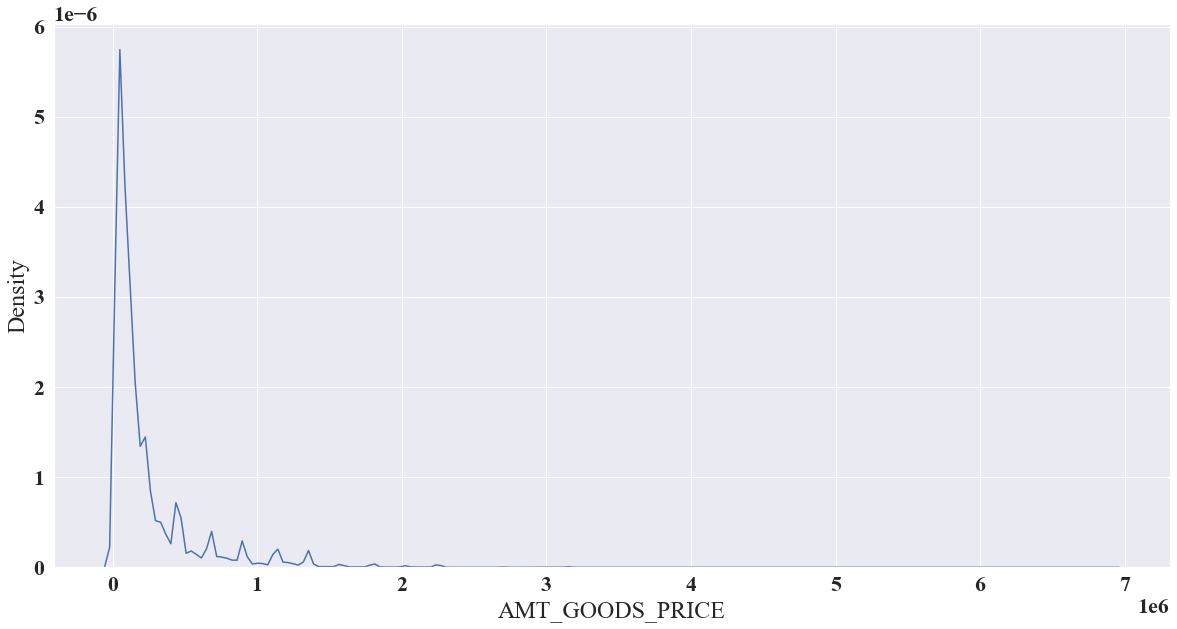

In [107]:
# Lets plot kde plot to see the distribution and then decide which method of imputation is better 
plt.figure(figsize=(20,10))
sns.kdeplot(previous_data_set['AMT_GOODS_PRICE'])
plt.show()

###### Above figure shows that , few picks(noise) are associated with this and hence mean can not  be use to impute missign value so impute with median or mode

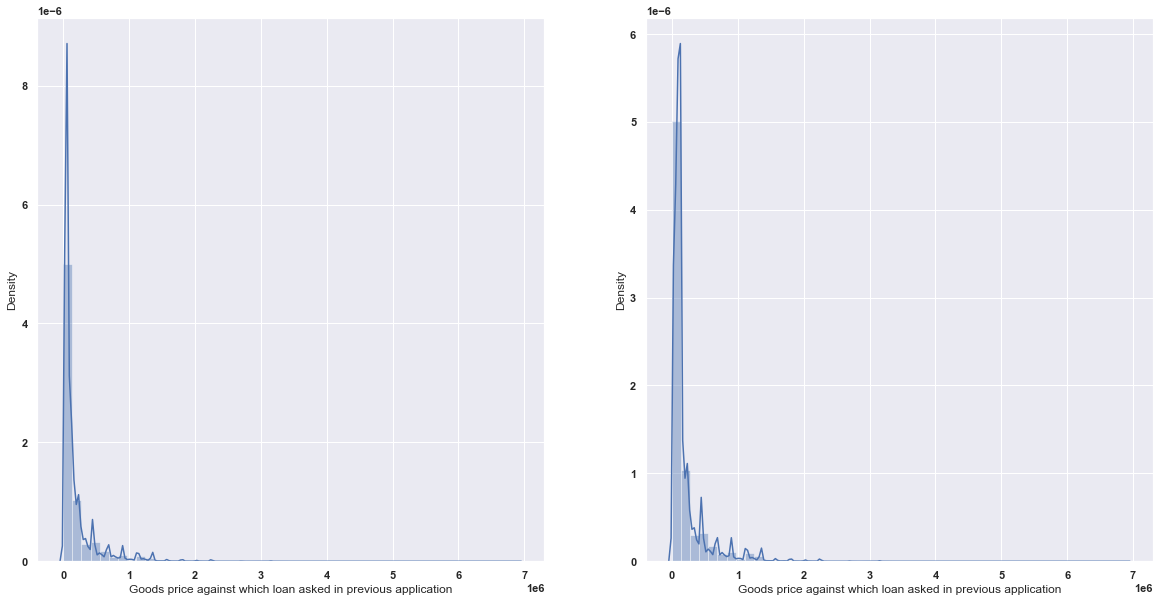

In [108]:
# Plotting these graphs with distplot


from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 1)

plt.subplot(1,2,1)
x = pd.Series(previous_data_set['AMT_GOODS_PRICE'].fillna(previous_data_set['AMT_GOODS_PRICE'].mode()[0]), name="Goods price against which loan asked in previous application")
ax = sns.distplot(x)
plt.subplot(1,2,2)
y = pd.Series(previous_data_set['AMT_GOODS_PRICE'].fillna(previous_data_set['AMT_GOODS_PRICE'].median()), name="Goods price against which loan asked in previous application")
ax = sns.distplot(y)

###### above graph shows data can be imputed with mode 

In [109]:
# Imputing missing values with mode for AMT_GOODS_PRICE

previous_data_set['AMT_GOODS_PRICE'].fillna(previous_data_set['AMT_GOODS_PRICE'].mode()[0], inplace=True)

###### following similar methodlogy as done for AMT_GOODS_PRICE , the column name AMT_ANNUITY column missing values can be imputed with median

In [110]:
previous_data_set['AMT_ANNUITY'].fillna(previous_data_set['AMT_ANNUITY'].median(),inplace = True)

##### Now CNT_PAYMENT has 22.29% missing values depicts "Term of previous credit at application of the previous application"..impute missing values  with 0 

In [111]:
#imputing null values with  0

previous_data_set['CNT_PAYMENT'].fillna(0,inplace = True)

In [112]:
previous_data_set.shape

(1670214, 30)

In [113]:
null_value_percentage(previous_data_set)

PRODUCT_COMBINATION          0.02
AMT_CREDIT                   0.00
YEARLY_DECISION              0.00
NAME_CLIENT_TYPE             0.00
SK_ID_CURR                   0.00
NAME_CONTRACT_TYPE           0.00
AMT_ANNUITY                  0.00
AMT_APPLICATION              0.00
AMT_GOODS_PRICE              0.00
NAME_CASH_LOAN_PURPOSE       0.00
NAME_CONTRACT_STATUS         0.00
DAYS_DECISION                0.00
NAME_PAYMENT_TYPE            0.00
CODE_REJECT_REASON           0.00
NAME_TYPE_SUITE              0.00
NAME_GOODS_CATEGORY          0.00
NFLAG_INSURED_ON_APPROVAL    0.00
NAME_PORTFOLIO               0.00
NAME_PRODUCT_TYPE            0.00
CHANNEL_TYPE                 0.00
SELLERPLACE_AREA             0.00
NAME_SELLER_INDUSTRY         0.00
CNT_PAYMENT                  0.00
NAME_YIELD_GROUP             0.00
DAYS_FIRST_DRAWING           0.00
DAYS_FIRST_DUE               0.00
DAYS_LAST_DUE_1ST_VERSION    0.00
DAYS_LAST_DUE                0.00
DAYS_TERMINATION             0.00
SK_ID_PREV    

In [114]:
previous_data_set.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.670214e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     1.856429e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     2.871413e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00   
75%    2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  
count  1.670214e+06  
mean   1.247621e+01  
std    1.447588e+01  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.000000e+01  
75%    1.600000e+01  
max    8.400000e+01

###### Check the column where 75% quartile and Max value difference is high and find outliers

In [115]:
high_difference_75_max = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

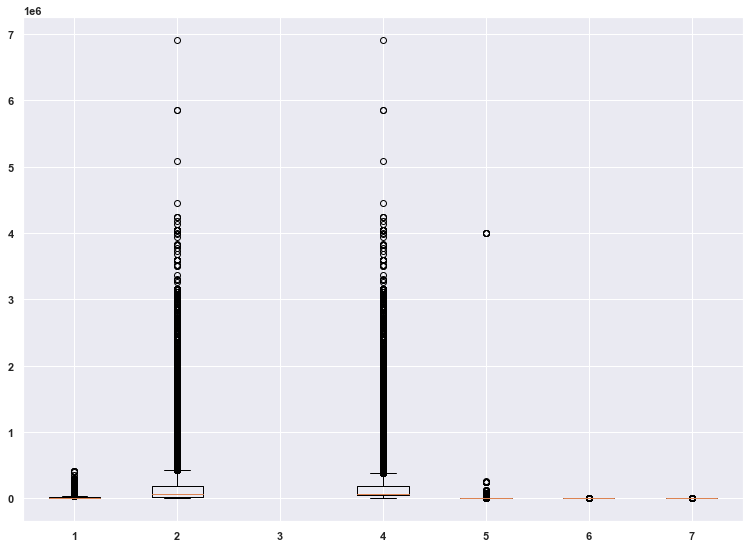

In [116]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.boxplot(previous_data_set[high_difference_75_max])
plt.show()

###### above grah shows AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have number of outliers.

###### Now there are certain columns also which needs to be converted into category 

In [117]:
# converting required columns to categorical 

previous_data_set_category_column = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in previous_data_set_category_column:
    previous_data_set[col] =pd.Categorical(previous_data_set[col])


In [118]:
previous_data_set.shape

(1670214, 30)

In [119]:
previous_data_set.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.670214e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     1.856429e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     2.871413e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00   
75%    2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  
count  1.670214e+06  
mean   1.247621e+01  
std    1.447588e+01  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.000000e+01  
75%    1.600000e+01  
max    8.400000e+01

# 8. Identifying Driving factors for business decisions using data analysis

###### Checking Imbalance

In [120]:
application_data_set["TARGET"] = application_data_set["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

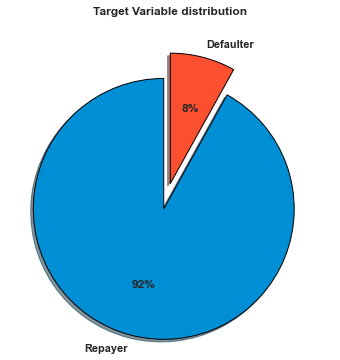

In [121]:
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Repayer', 'Defaulter']
explode = [0.2, 0]
colors = ['#008fd5', '#fc4f30']

plt.pie(application_data_set["TARGET"].value_counts(), labels = labels, colors = colors, startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax.set_title('Target Variable distribution', fontweight='bold')
plt.show()

###### Lets Start with univariate analysis

In [122]:
# Defining a function to check the whether columns are categorical or numerical 

def column_type(datacolumn,column):
    if datacolumn[column].dtype == np.int64 or datacolumn[column].dtype == np.float64:
        return "numerical"
    if datacolumn[column].dtype == "category":
        return "categorical"

In [123]:
# Defining univariate function for analysis

def merging_dataframe(datacolumn,column,target_column):
    df22 = datacolumn.groupby([column,target_column]).size().reset_index(name='counts')
    df22 = df22.set_index(column)
    df33 = df22.groupby([column]).sum()
    df22 = df22.loc[df22[target_column] == 'Defaulter']
    merged = df22.merge(df33, left_index=True, right_index=True, how='inner')
    merged['percent_defaulter'] = merged["counts_x"]*100/merged["counts_y"]
    return round(merged,2)
#merging_dataframe(application_data_set,"NAME_CONTRACT_TYPE","TARGET")


def univariate_defaulter_per_analysis(datacolumn,column,target_column,xlabel_angle=False):
    if column_type(datacolumn,column) == "numerical":
        sns.distplot(dataset[column],hist=False)
    elif column_type(datacolumn,column) == "categorical":
        count_value = datacolumn[column].value_counts()
        df_column = pd.DataFrame({column: count_value.index,'count': count_value.values})
        df2 = datacolumn.groupby([column,target_column]).size().reset_index(name='counts')     
        fig, ax = plt.subplots(figsize=(20,20))
        sns.set_style("whitegrid")
        sns.set(font_scale = 2)   
        ax = merging_dataframe(datacolumn,column,target_column)['percent_defaulter'].plot.bar(rot=0)
        ax.set_title("Defaulters %"+column, fontsize = 20)    
        ax.set_xlabel(column)
        ax.set_ylabel('% Defaulters')
        
        if(xlabel_angle):
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.show()

In [124]:
# Defining univariate function for analysis
def univariate_analysis(datacolumn,column,target_column,xlabel_angle=False):
    if column_type(datacolumn,column) == "numerical":
        sns.distplot(dataset[column],hist=False)
    elif column_type(datacolumn,column) == "categorical":
        count_value = datacolumn[column].value_counts()
        df_column = pd.DataFrame({column: count_value.index,'count': count_value.values})
        df2 = datacolumn.groupby([column,target_column]).size().reset_index(name='counts')
        
        fig, ax = plt.subplots(figsize=(20,20))
        sns.set_style("whitegrid")
        sns.set(font_scale = 2)
        ax = sns.barplot(x=df2[column], y=df2["counts"], hue=df2[target_column])
        ax.set_title(column)    
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        
        if(xlabel_angle):
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.show()

###  NAME_CONTRACT_TYPE vs Target Variable

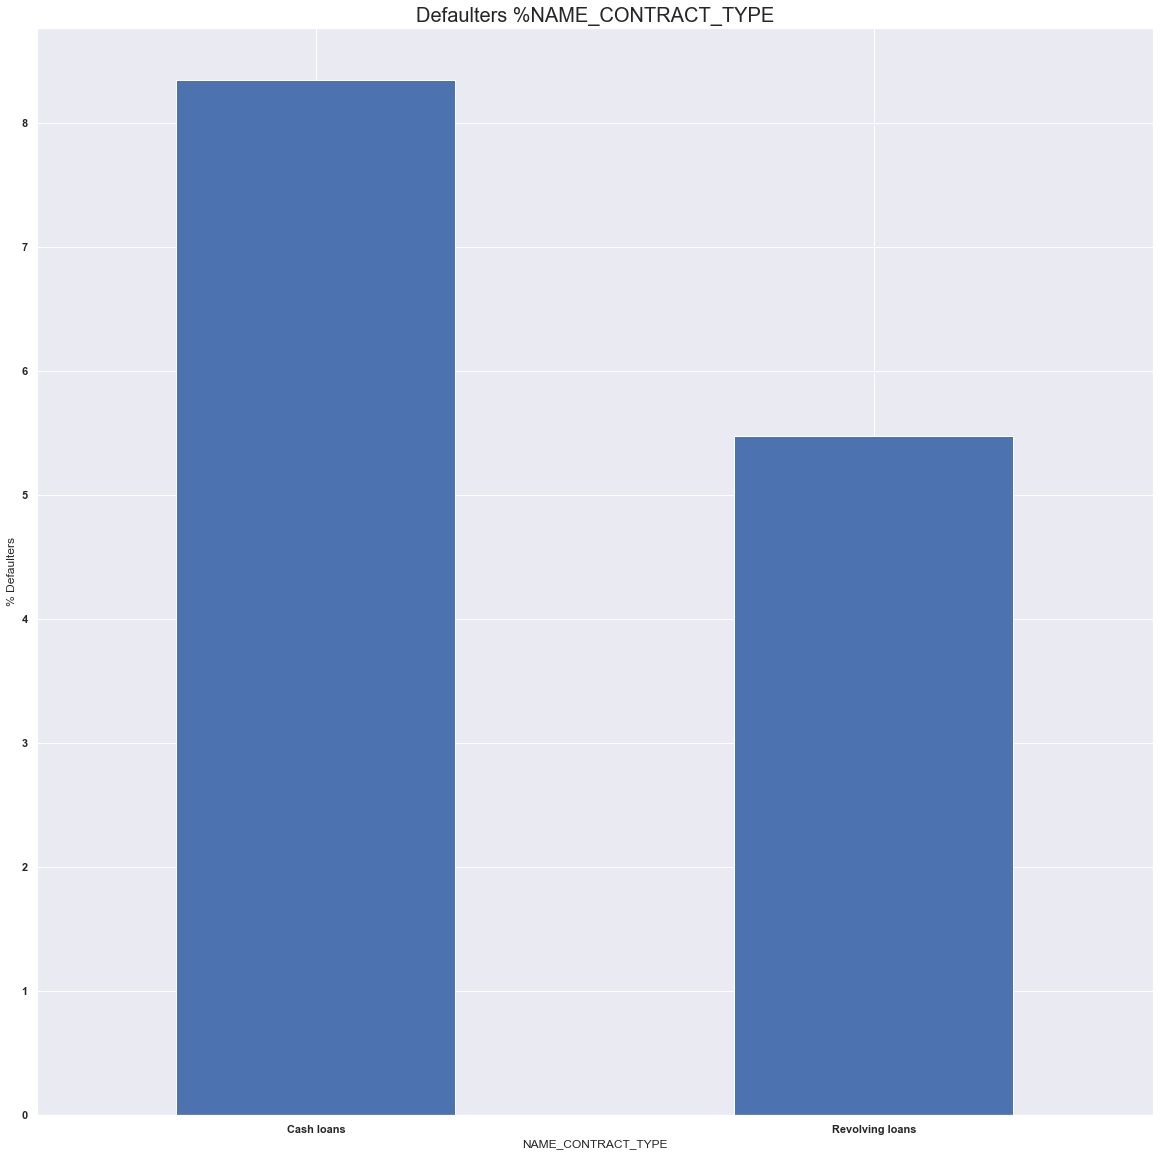

In [125]:
# checking defaulters percentage
univariate_defaulter_per_analysis(application_data_set,"NAME_CONTRACT_TYPE","TARGET",False)

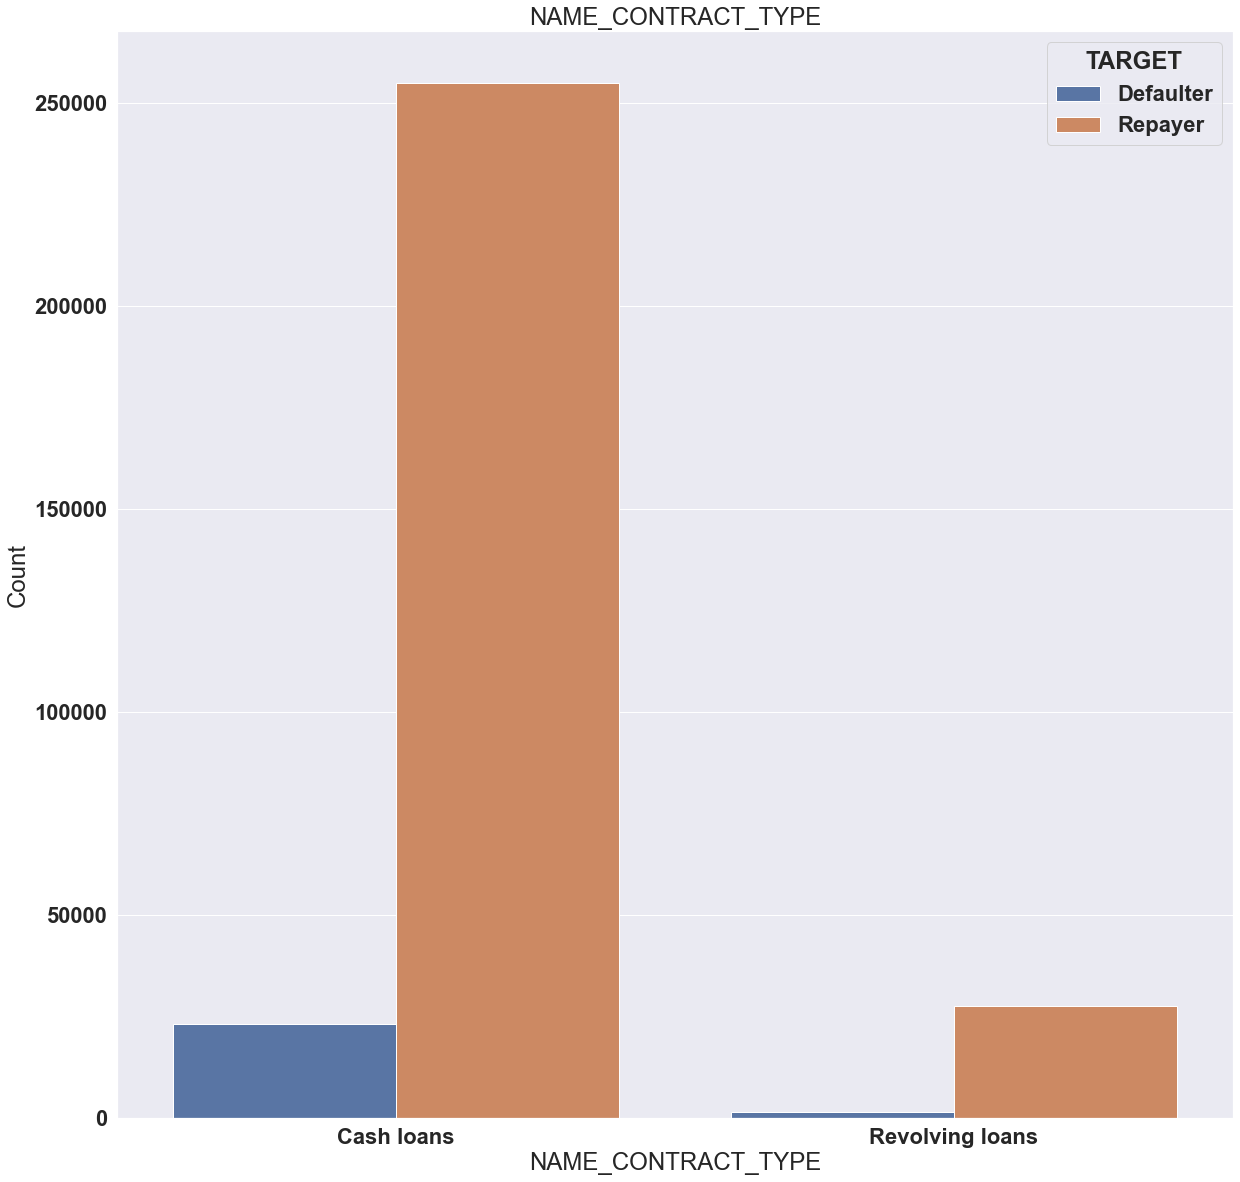

In [126]:
#Checking number of people default
univariate_analysis(application_data_set,"NAME_CONTRACT_TYPE","TARGET",False)

###### Conclusions : The % of defaulters in different loan types are less comapred to repayers

###  CODE_GENDER vs Target Variable

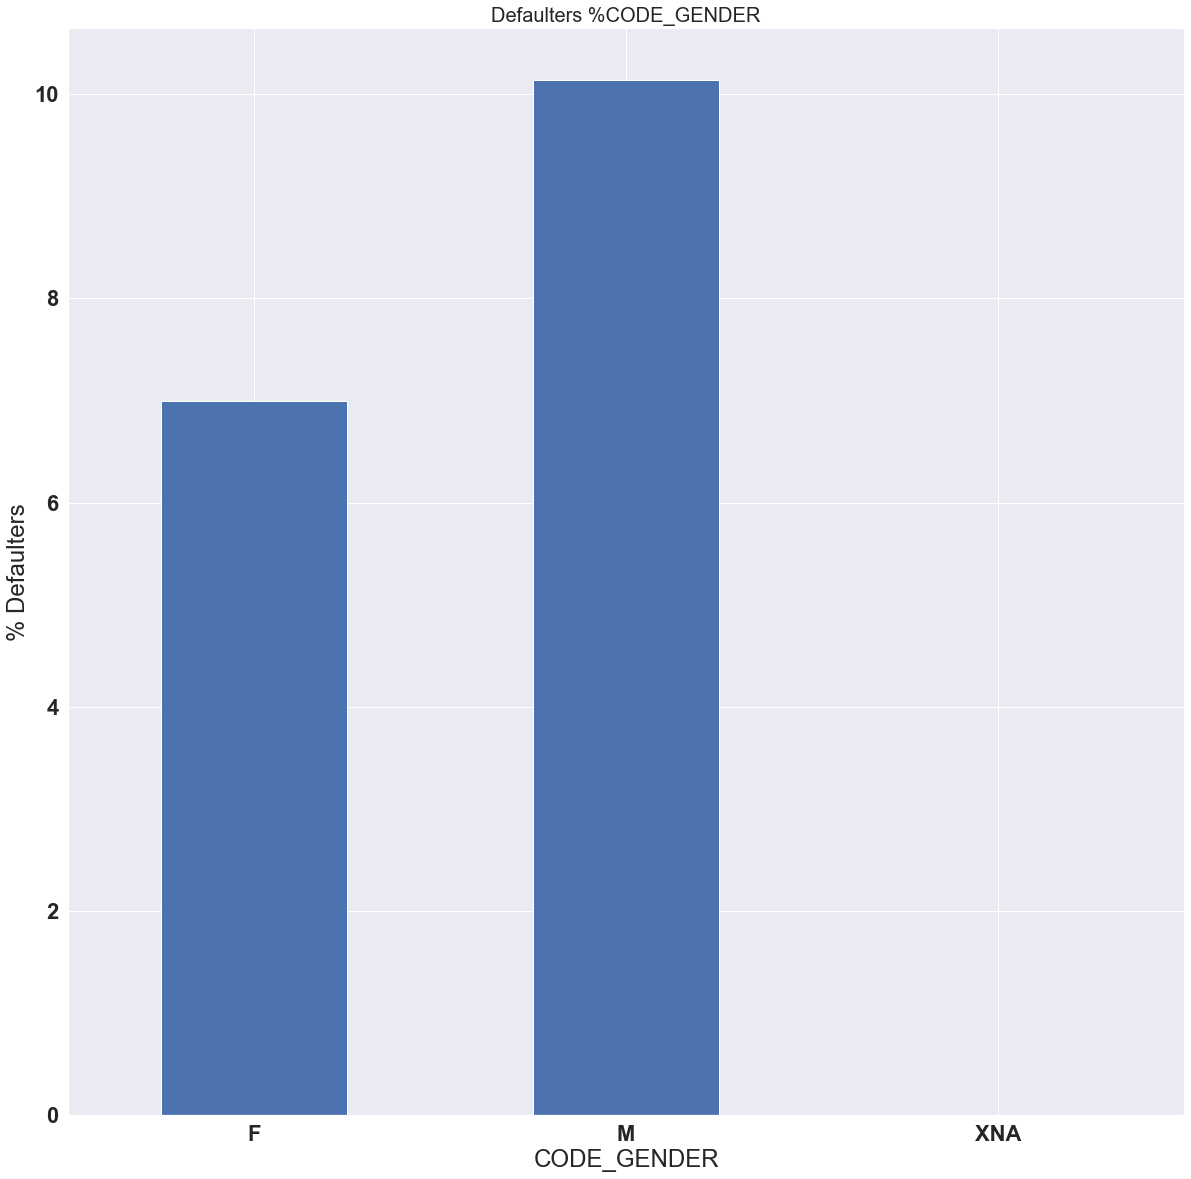

In [127]:
univariate_defaulter_per_analysis(application_data_set,"CODE_GENDER","TARGET",False)

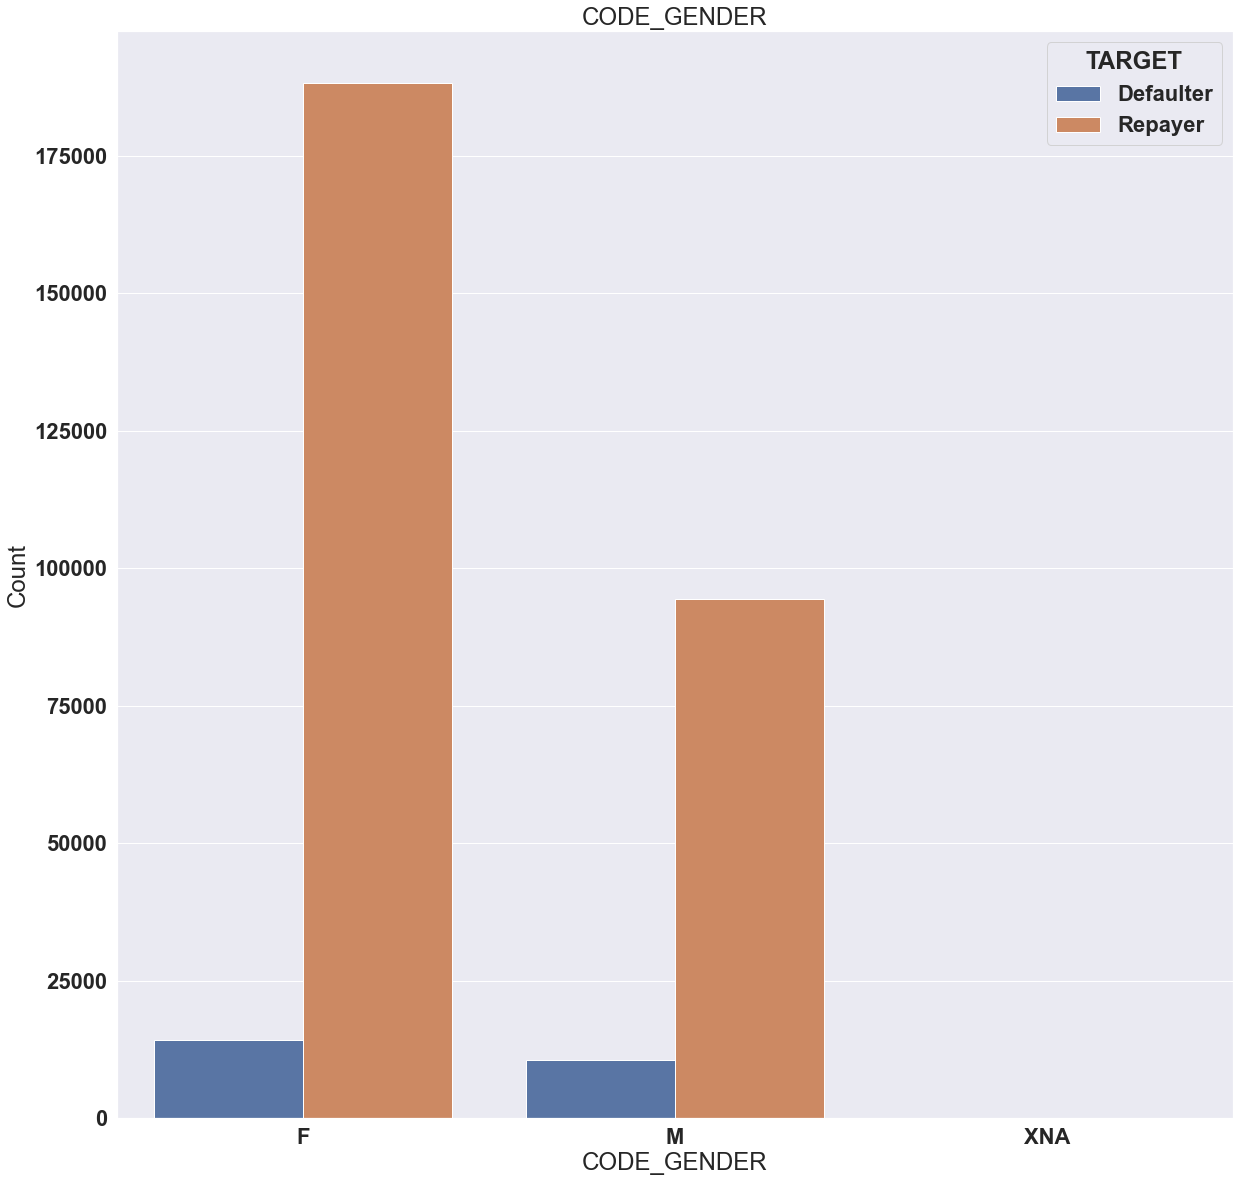

In [128]:
univariate_analysis(application_data_set,"CODE_GENDER","TARGET",False)

##### Gender type based Conclusions:  The female clients are more than male clients and female % of defaulters is less comapred to their male counterparts

### FLAG_OWN_REALTY vs Target Variable

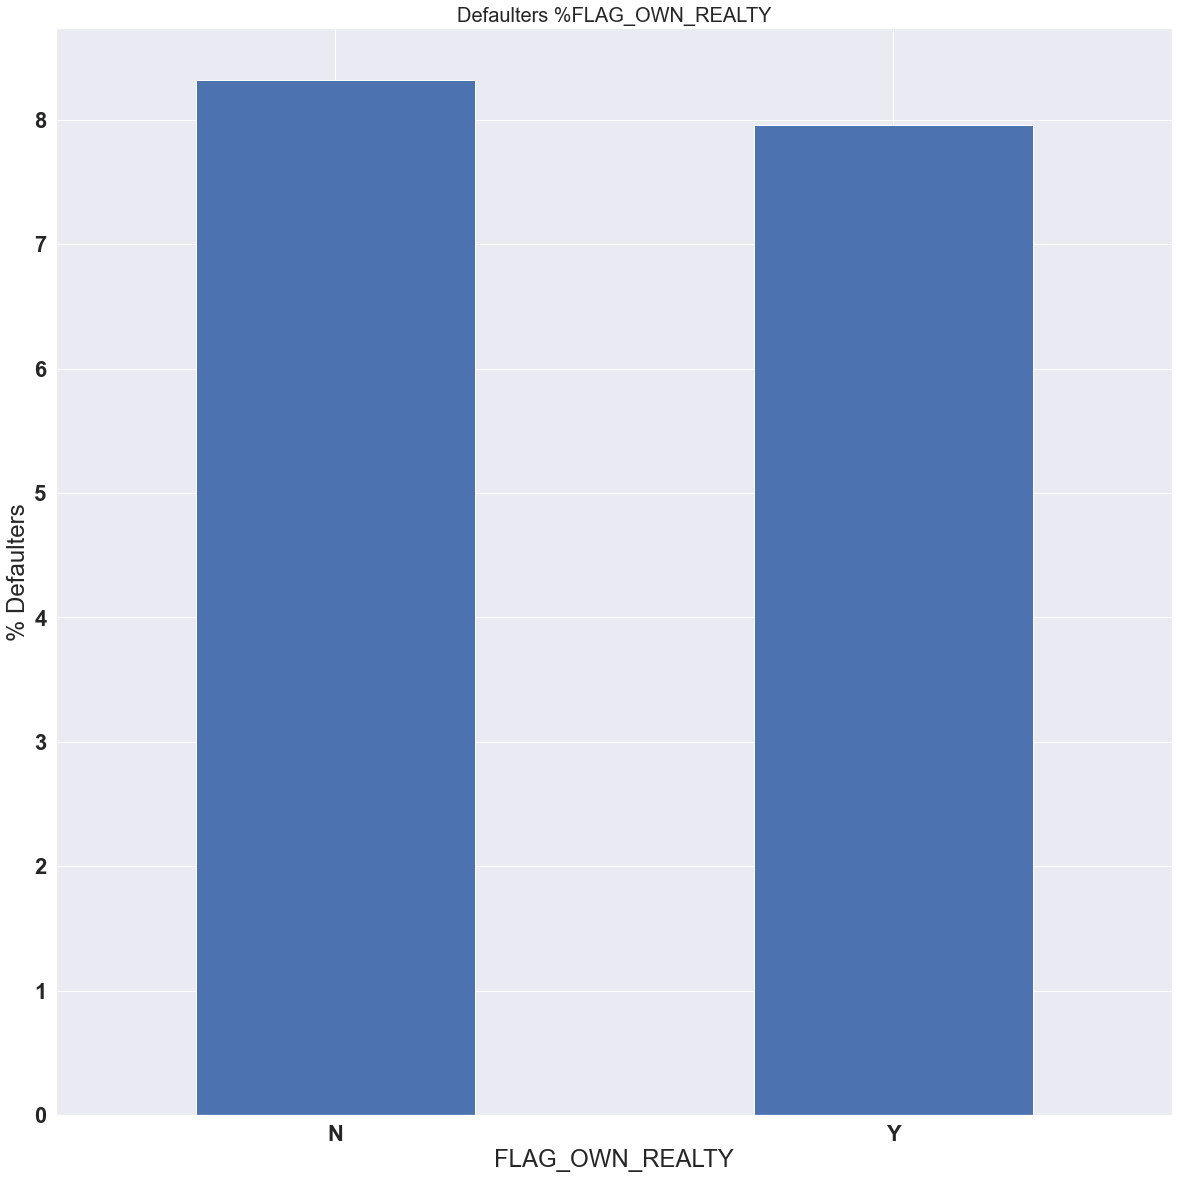

In [129]:
univariate_defaulter_per_analysis(application_data_set,"FLAG_OWN_REALTY","TARGET",False)

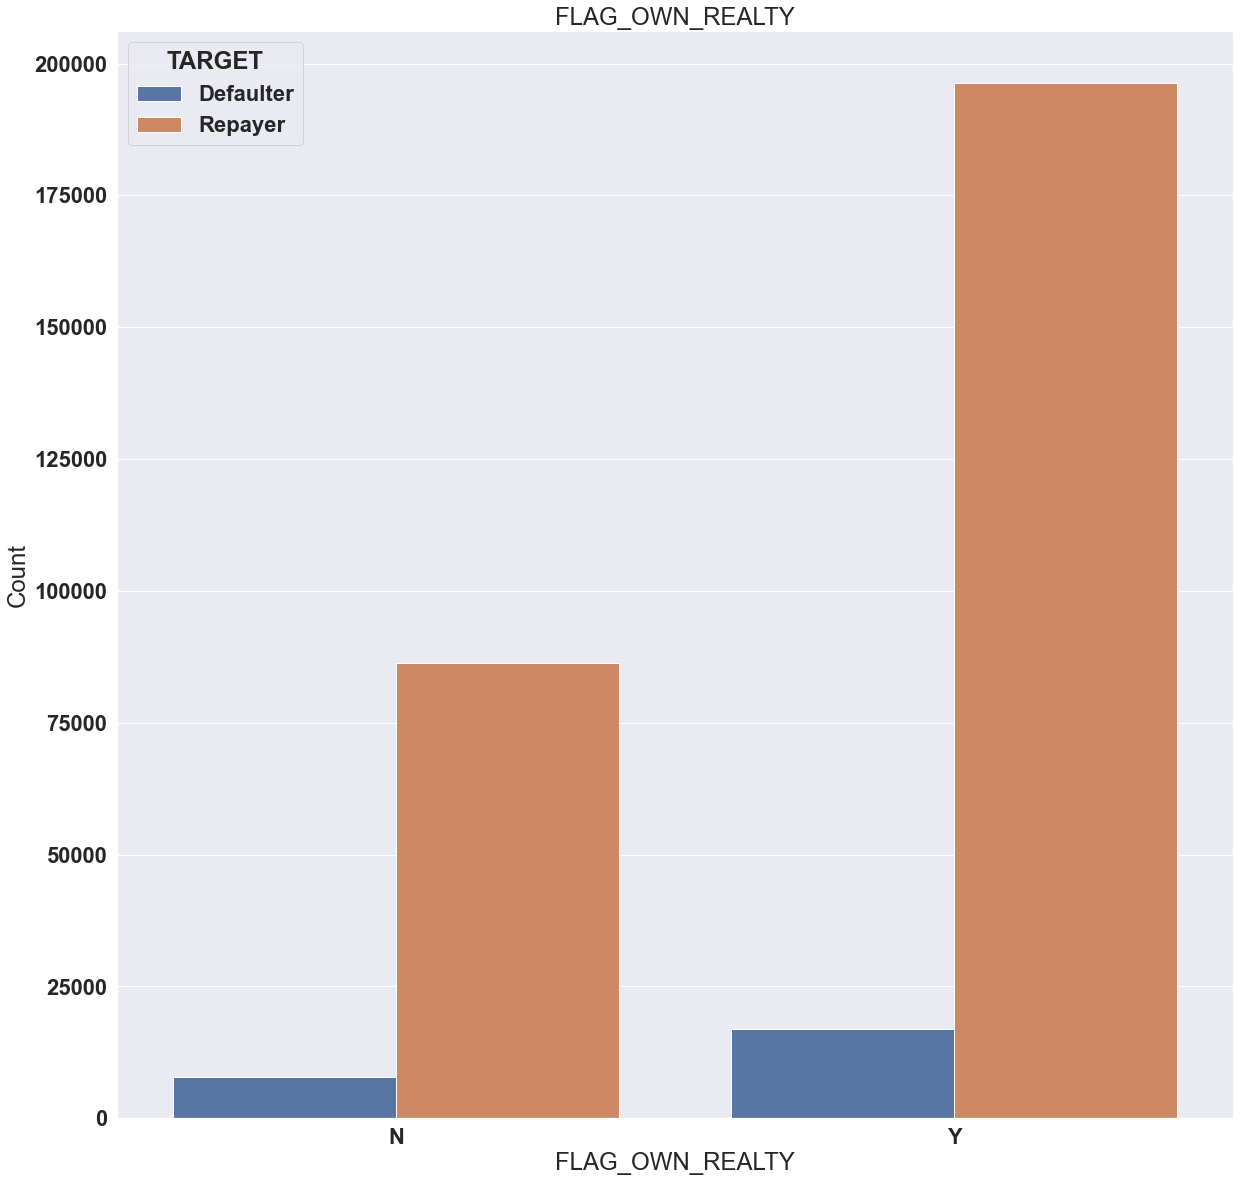

In [130]:
univariate_analysis(application_data_set,"FLAG_OWN_REALTY","TARGET",False)

##### Conclusions FLAG_OWN_REALITY : The people who possesses real estate their number is almost double than not having it and defaulter % is around same

### NAME_HOUSING_TYPE vs Target Variable

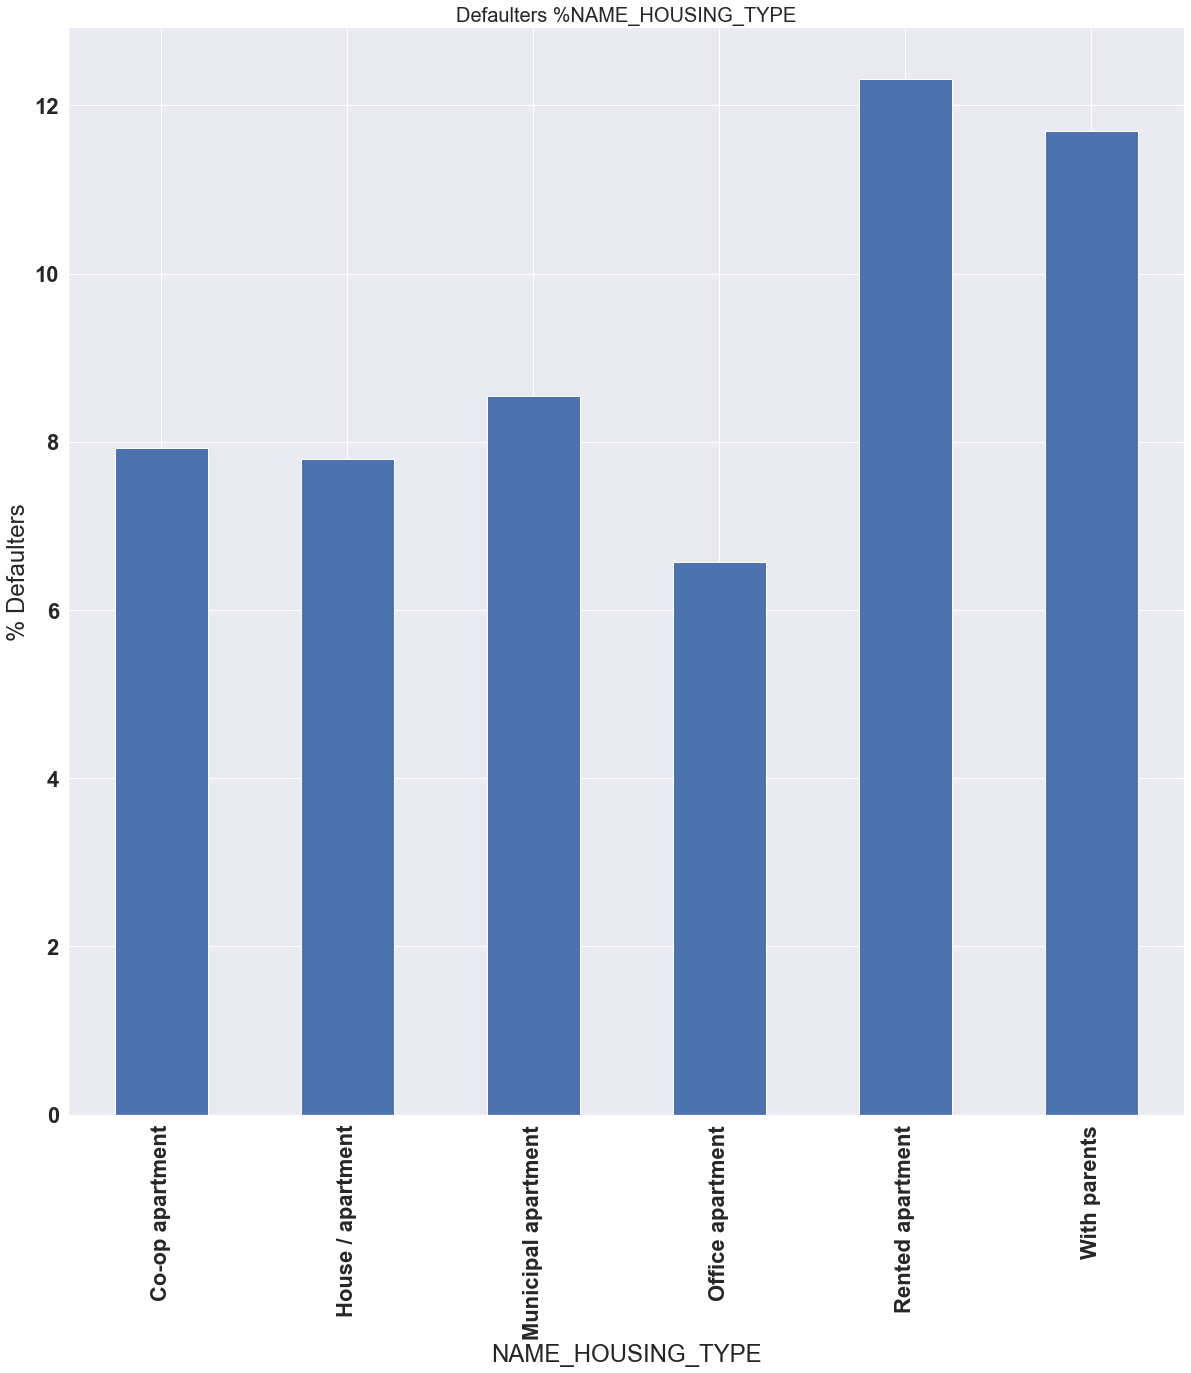

In [131]:
#4 Analyzing Housing Type based on loan repayment status
univariate_defaulter_per_analysis(application_data_set,"NAME_HOUSING_TYPE","TARGET",True)

In [197]:
# Defining univariate function for analysis
def univariate_type(datacolumn,column,target_column,xlabel_angle=False,ylog=False):
    if column_type(datacolumn,column) == "numerical":
        sns.distplot(dataset[column],hist=False)
    elif column_type(datacolumn,column) == "categorical":
        count_value = datacolumn[column].value_counts()
        df_column = pd.DataFrame({column: count_value.index,'count': count_value.values})
        df2 = datacolumn.groupby([column,target_column]).size().reset_index(name='counts')
        
        fig, ax = plt.subplots(figsize=(20,20))
        sns.set_style("whitegrid")
        sns.set(font_scale = 2)
        ax = sns.barplot(x=df2[column], y=df2["counts"], hue=df2[target_column])
        
        ax.set_title(column)    
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        
        if ylog:
            ax.set_yscale('log')
            ax.set_ylabel("Count(log_scale)")
        else:
            ax.set_ylabel("Count")
        
        if(xlabel_angle):
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.show()

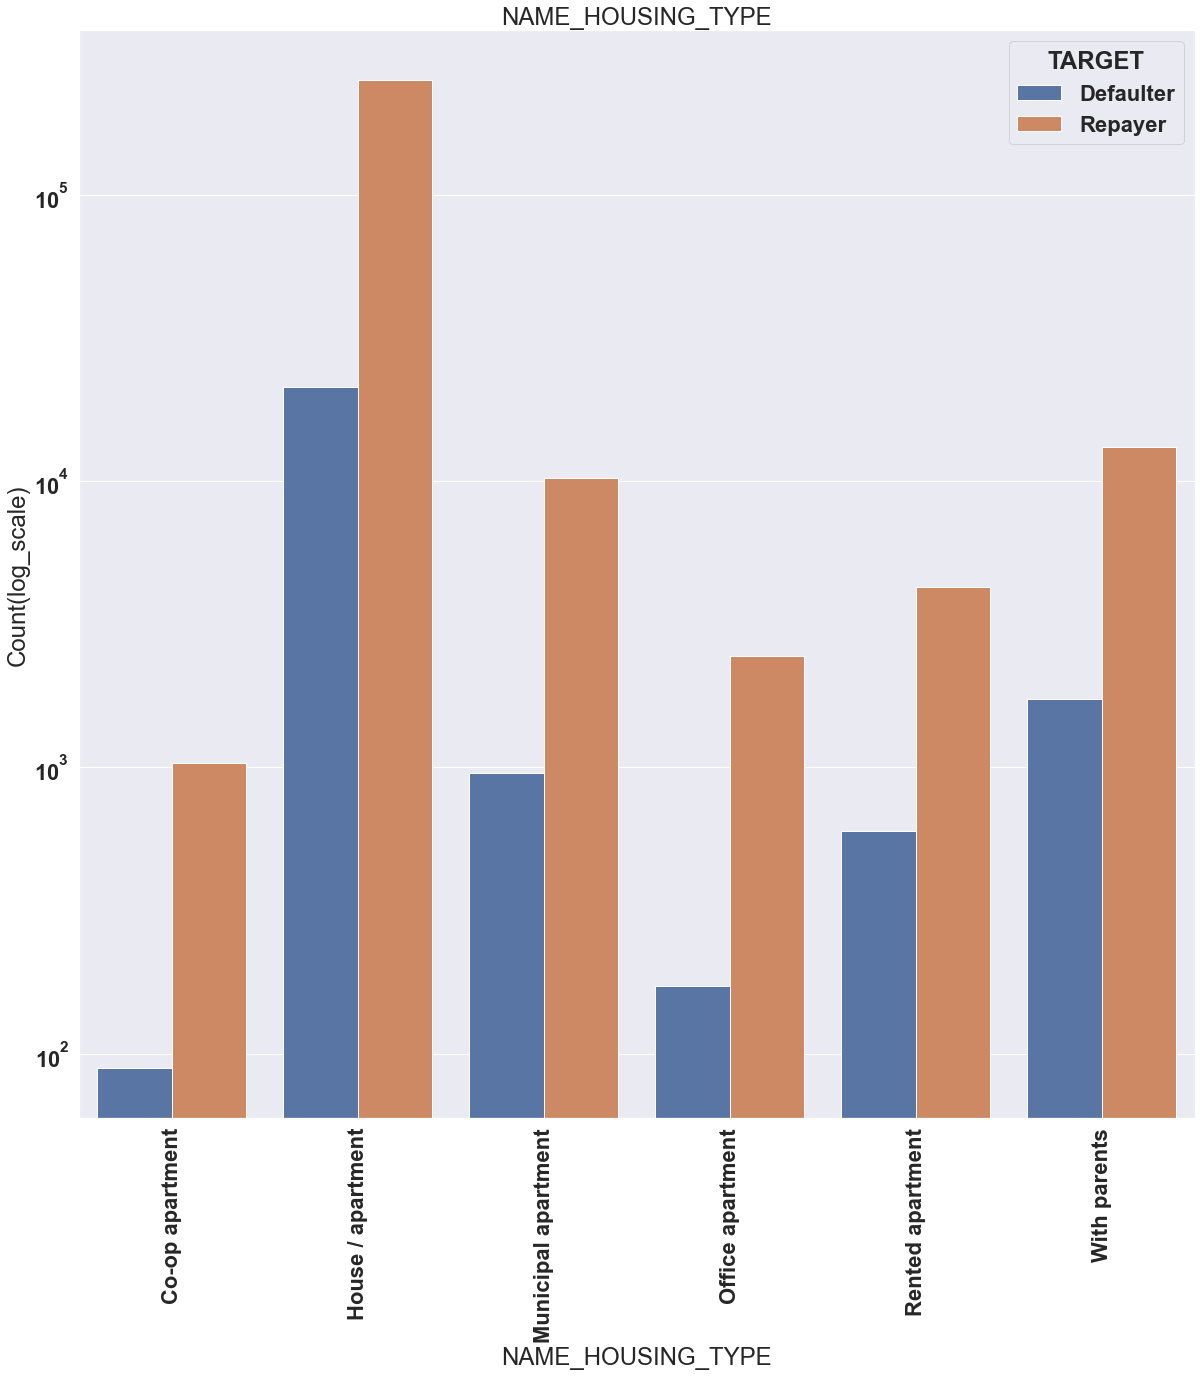

In [133]:
univariate_type(application_data_set,"NAME_HOUSING_TYPE","TARGET",True,True)

###### Conclusion: The client with rented apartment and living with parents has more chances of being defaulter. On the other hand people staying in office apartment has less possibility of deafulting 

### NAME_FAMILY_STATUS vs Target Variable

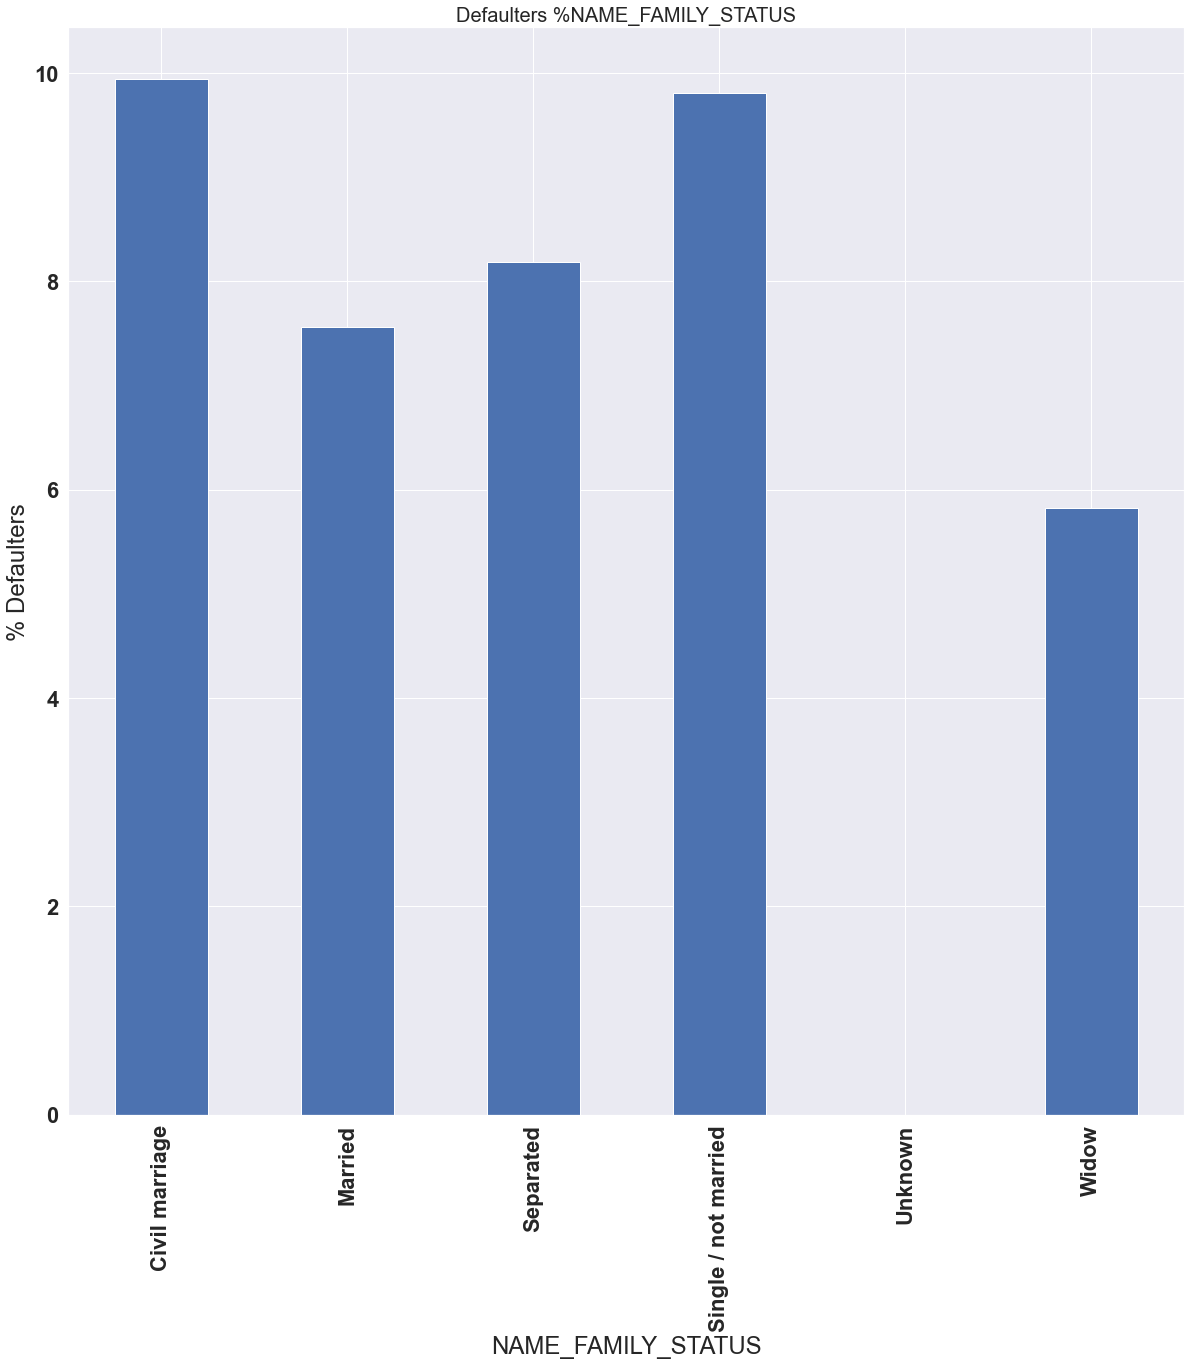

In [134]:
univariate_defaulter_per_analysis(application_data_set,"NAME_FAMILY_STATUS","TARGET",True)

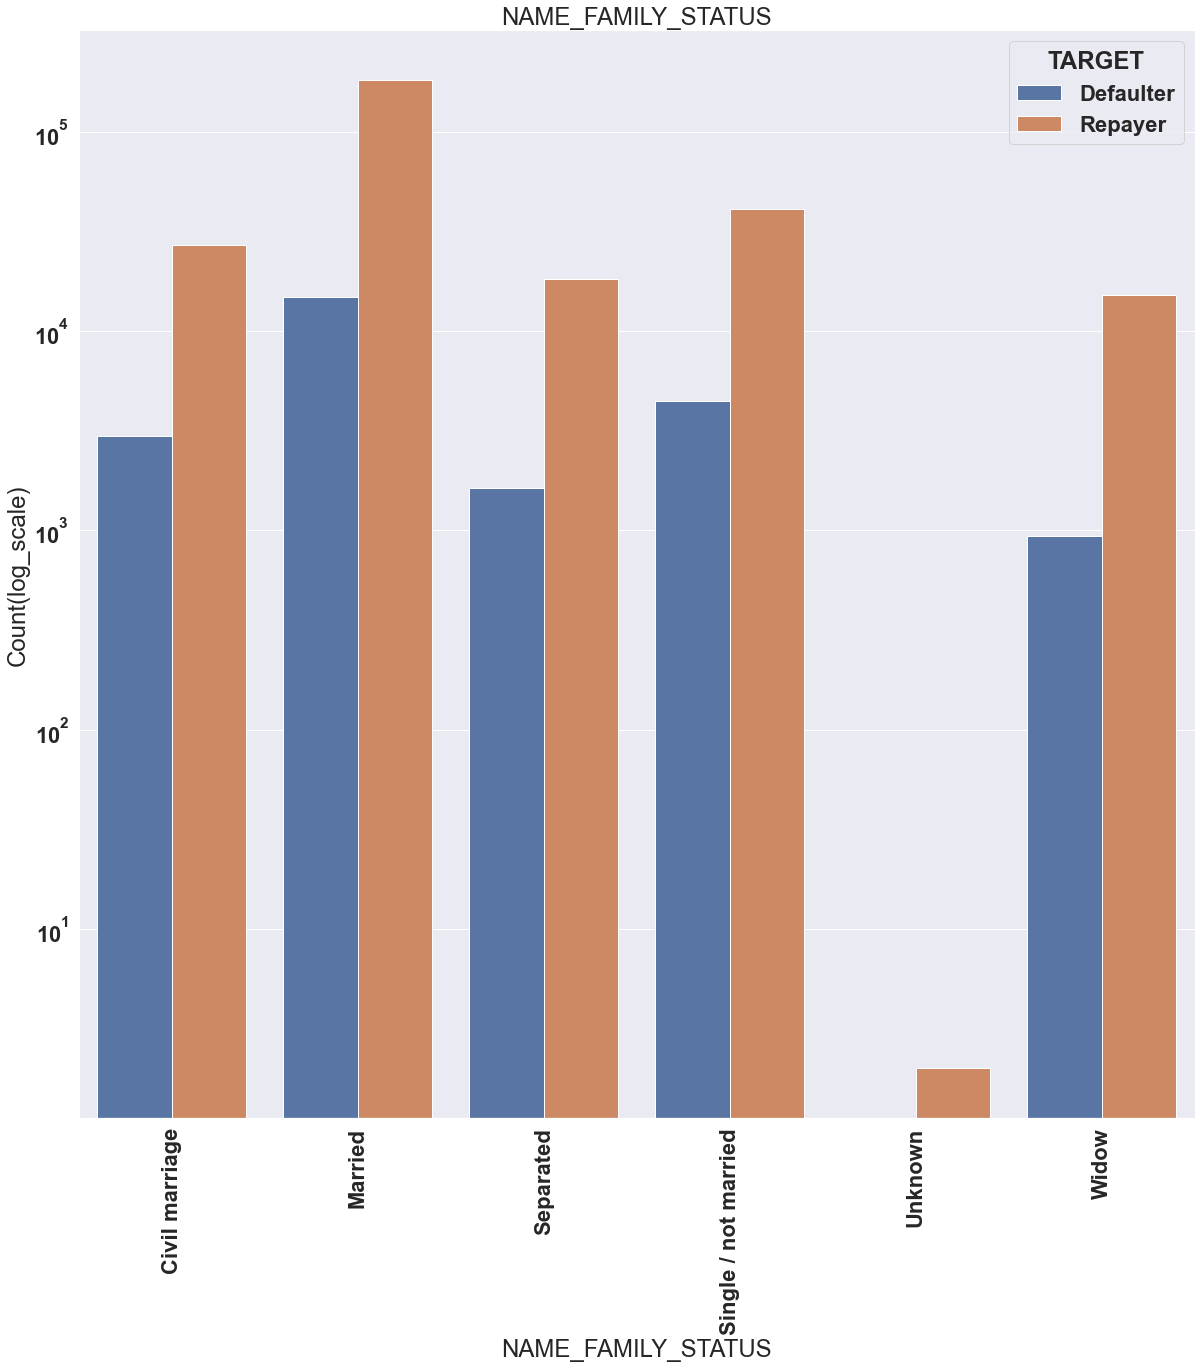

In [135]:
univariate_type(application_data_set,"NAME_FAMILY_STATUS","TARGET",True,True)

###### Inferences: Clients with Single/not married and Civil marriage status have highest chances of being defaulter. But Married people has least chances of being defaulter

### NAME_EDUCATION_TYPE vs Target Variable

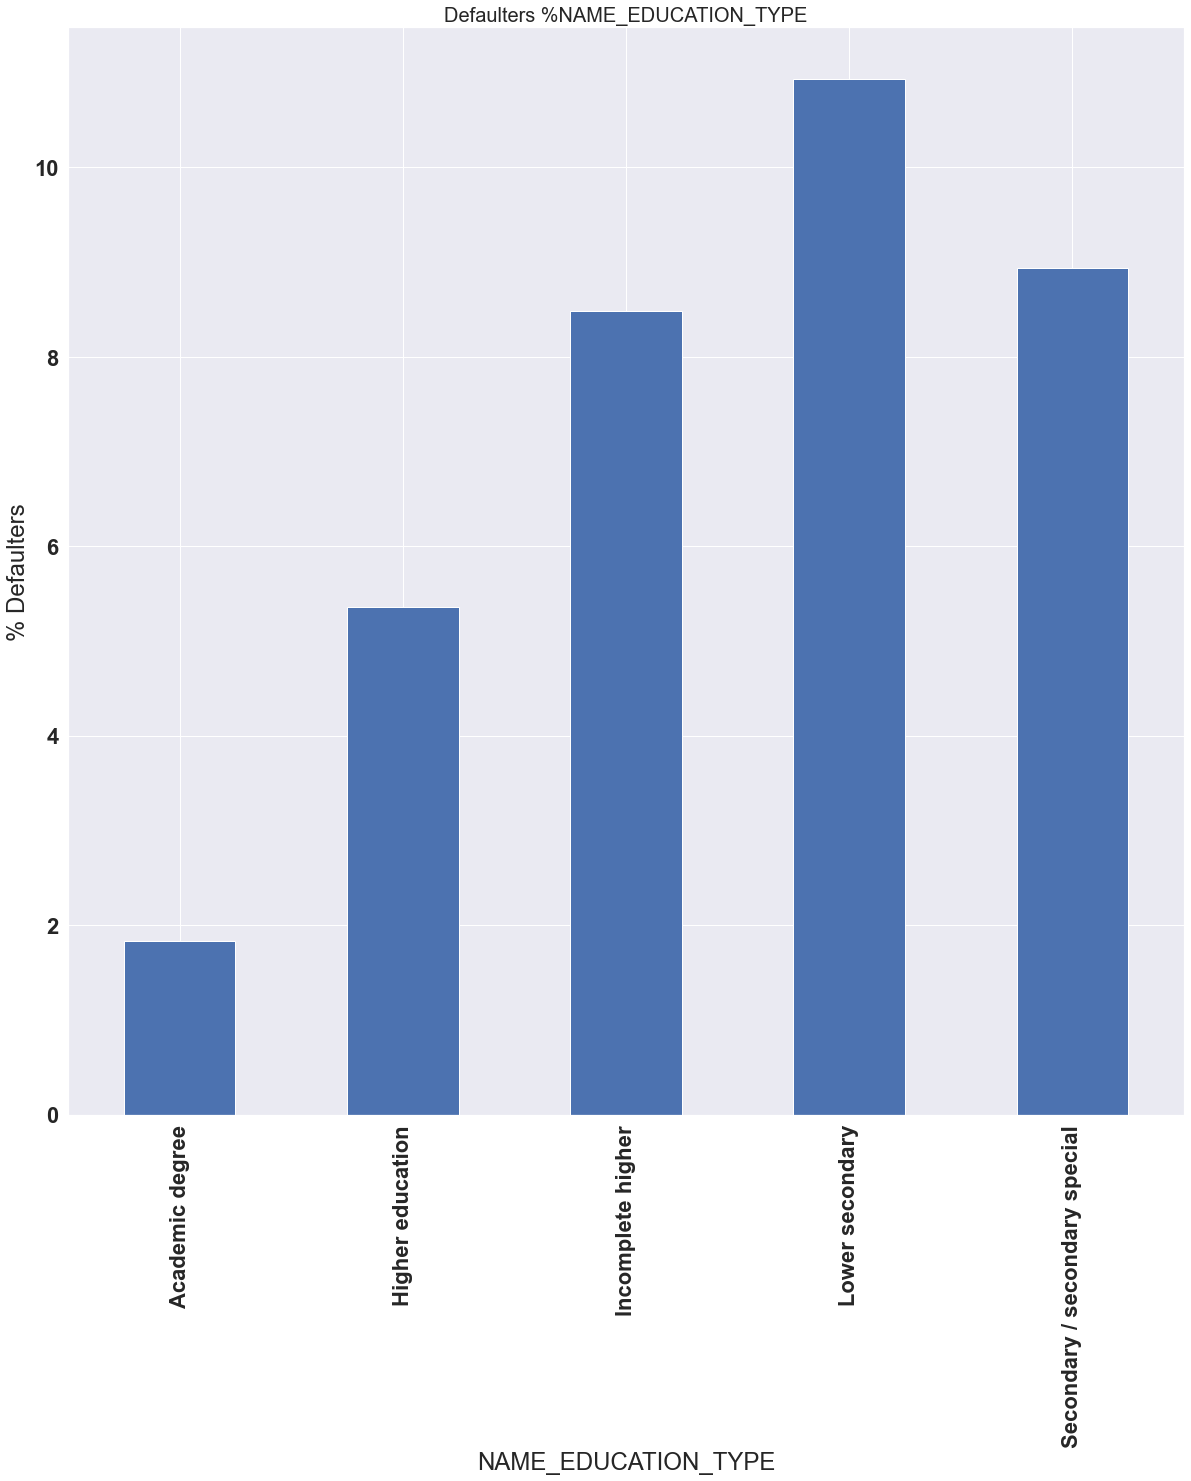

In [136]:
univariate_defaulter_per_analysis(application_data_set,"NAME_EDUCATION_TYPE","TARGET",True)

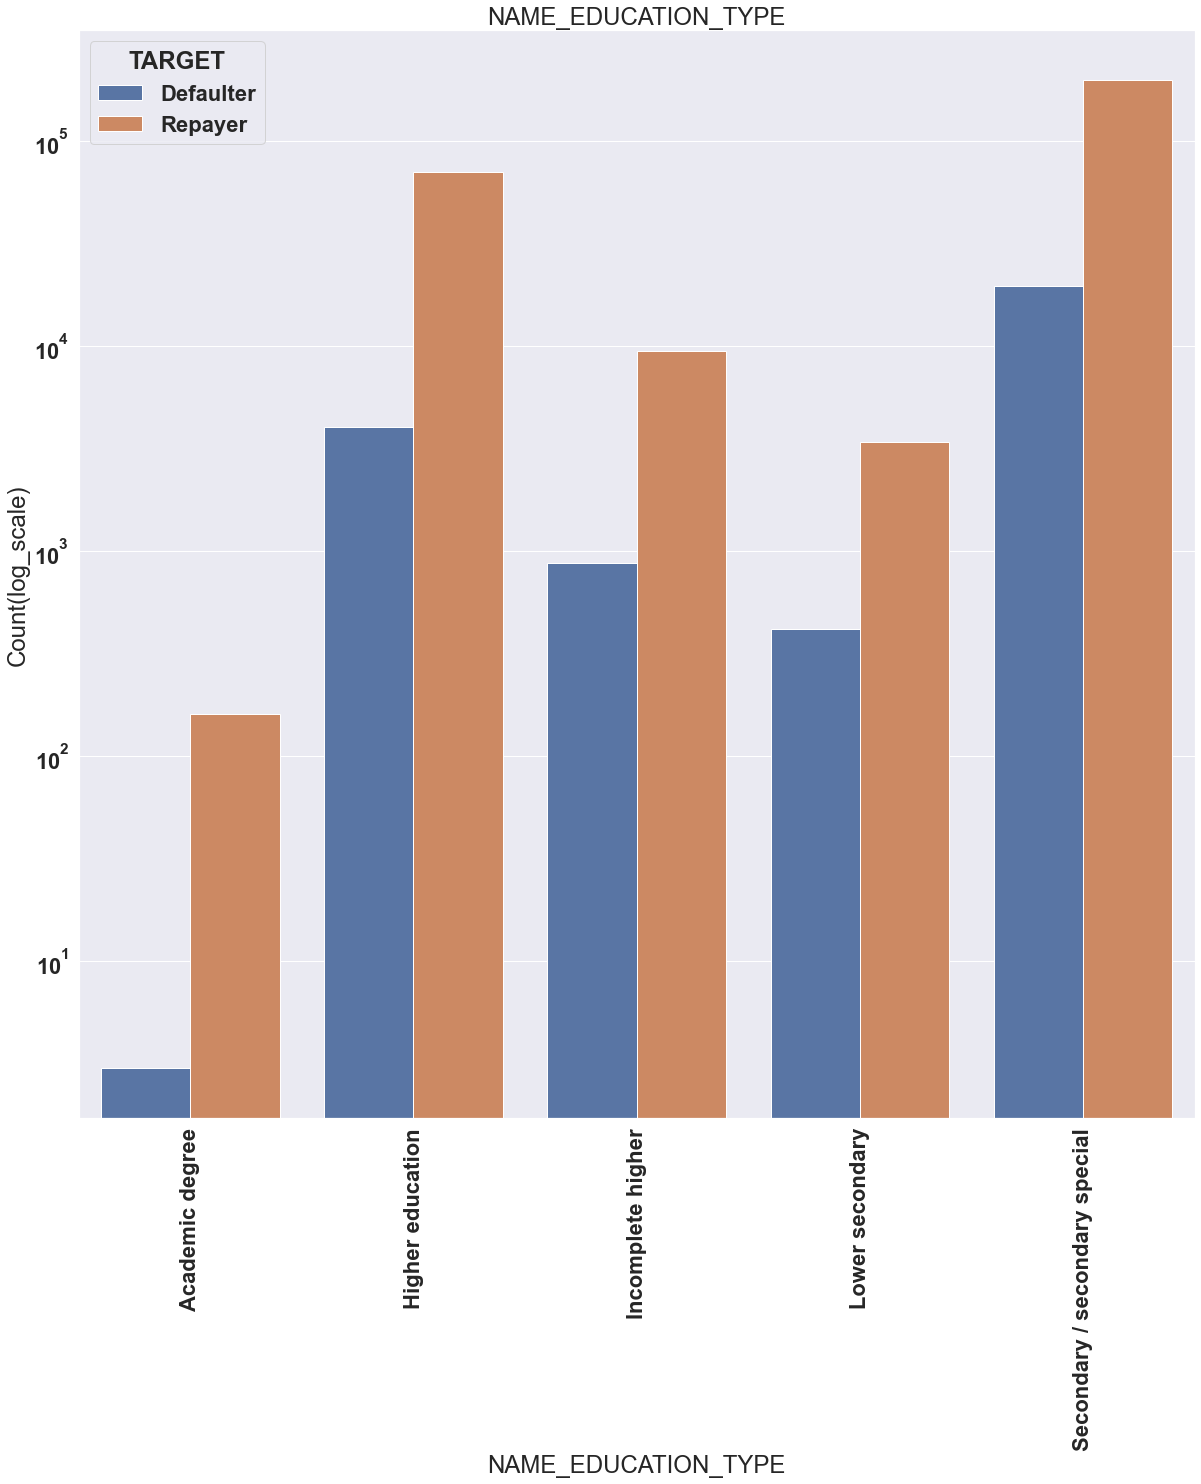

In [137]:
univariate_type(application_data_set,"NAME_EDUCATION_TYPE","TARGET",True,True)

###### Conclusion: Clients with Lower secondary education have more chances than any client with any other education type and but there are more client with secondary/secondary special eduation Type

### NAME_INCOME_TYPE  vs Target Variable

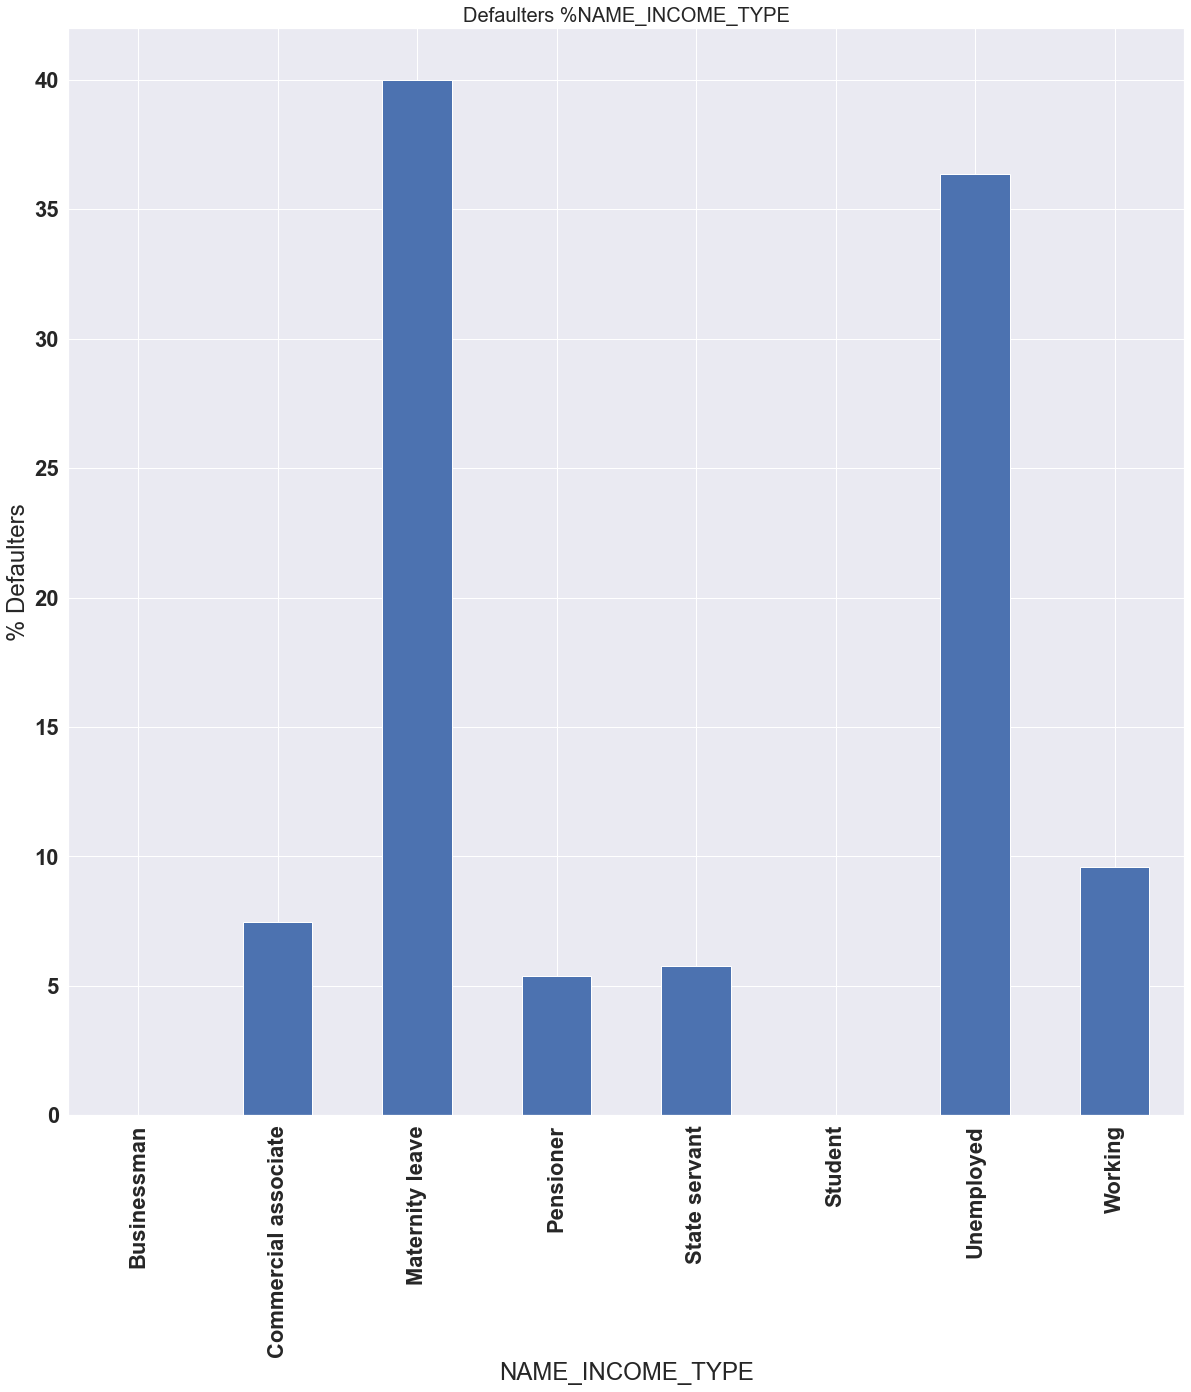

In [138]:
univariate_defaulter_per_analysis(application_data_set,"NAME_INCOME_TYPE","TARGET",True)

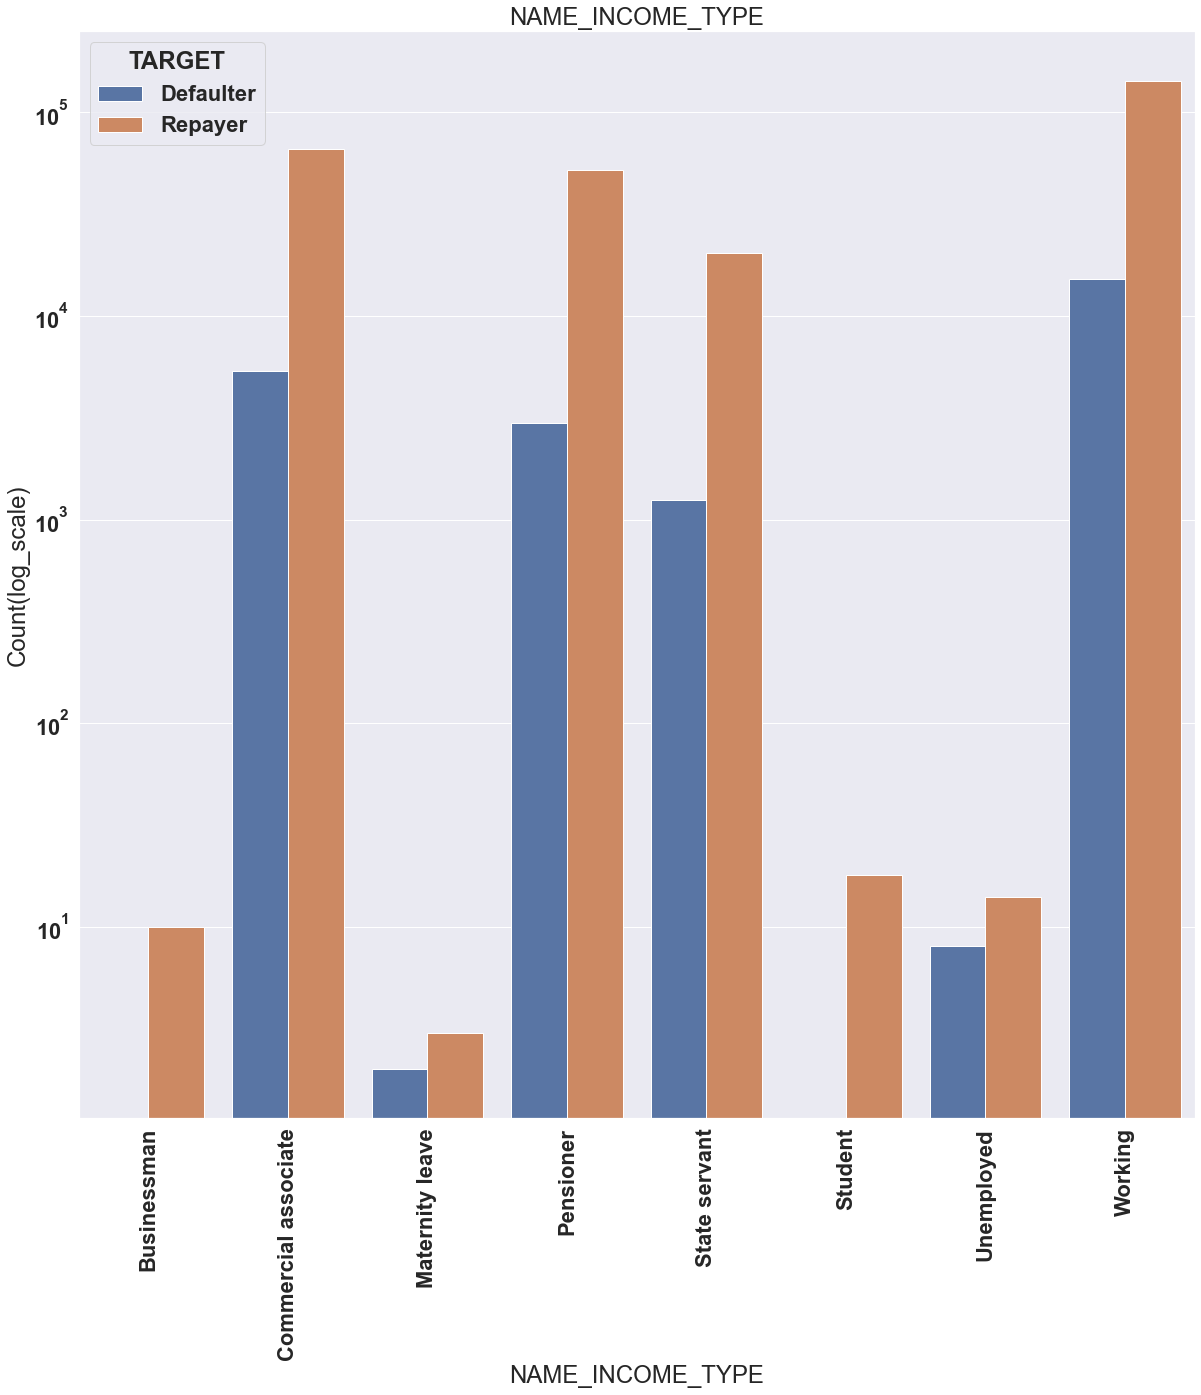

In [139]:
univariate_type(application_data_set,"NAME_INCOME_TYPE","TARGET",True,True)

###### Conclusion: Clients who are on maternity leave and unemployed have higher chances of being defaulter. People who are working, commercial associate, pensioner and state servent have more chances of applying for loan

### REGION_RATING_CLIENT vs TARGET VARIABLE

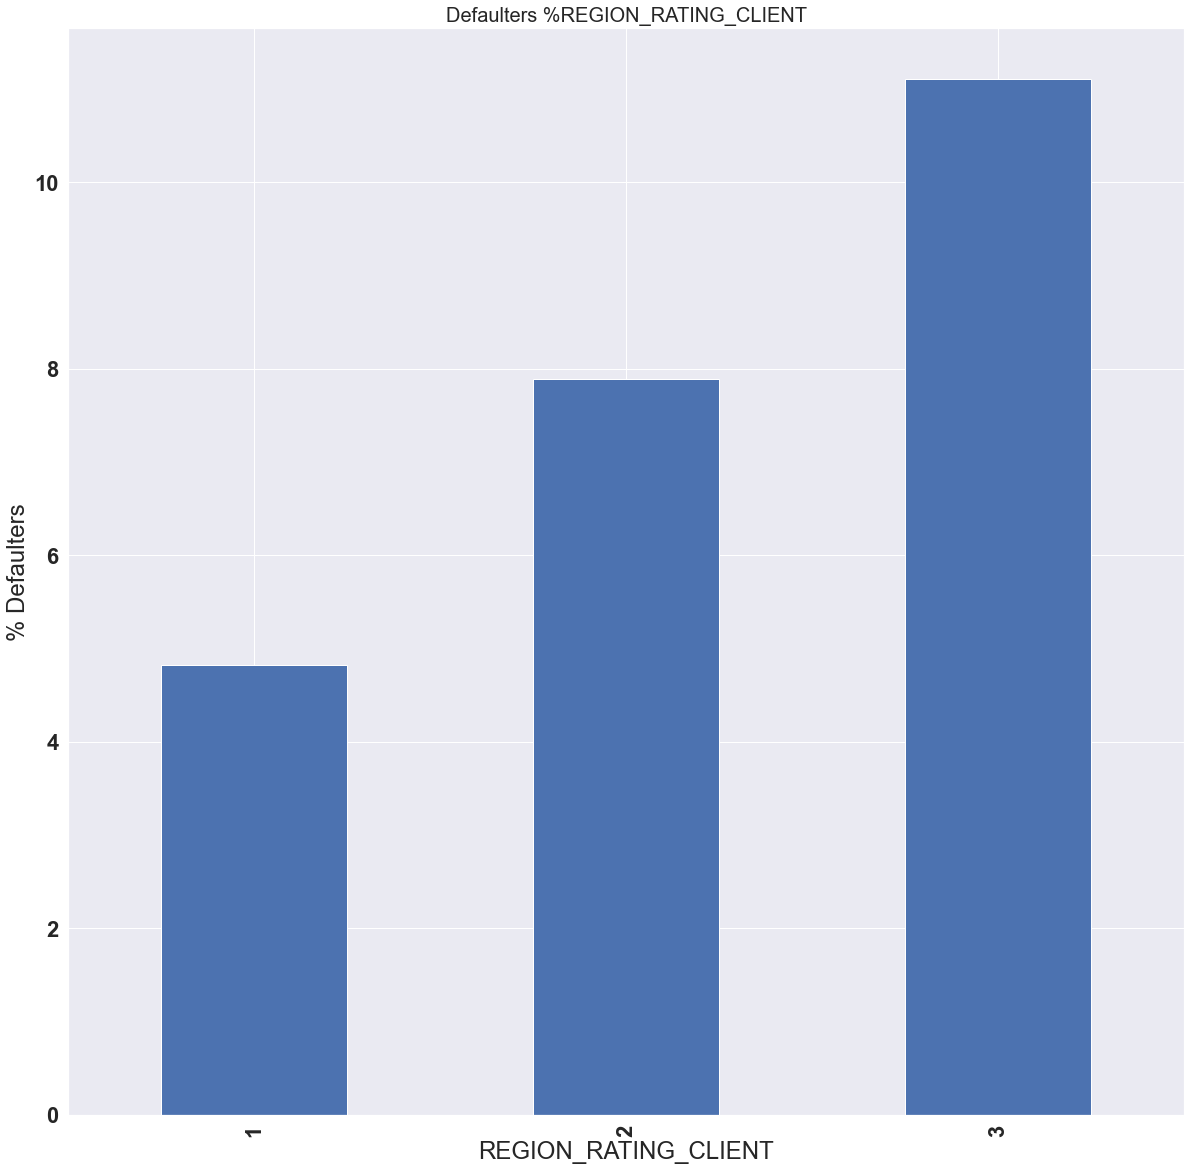

In [140]:
univariate_defaulter_per_analysis(application_data_set,"REGION_RATING_CLIENT","TARGET",True)

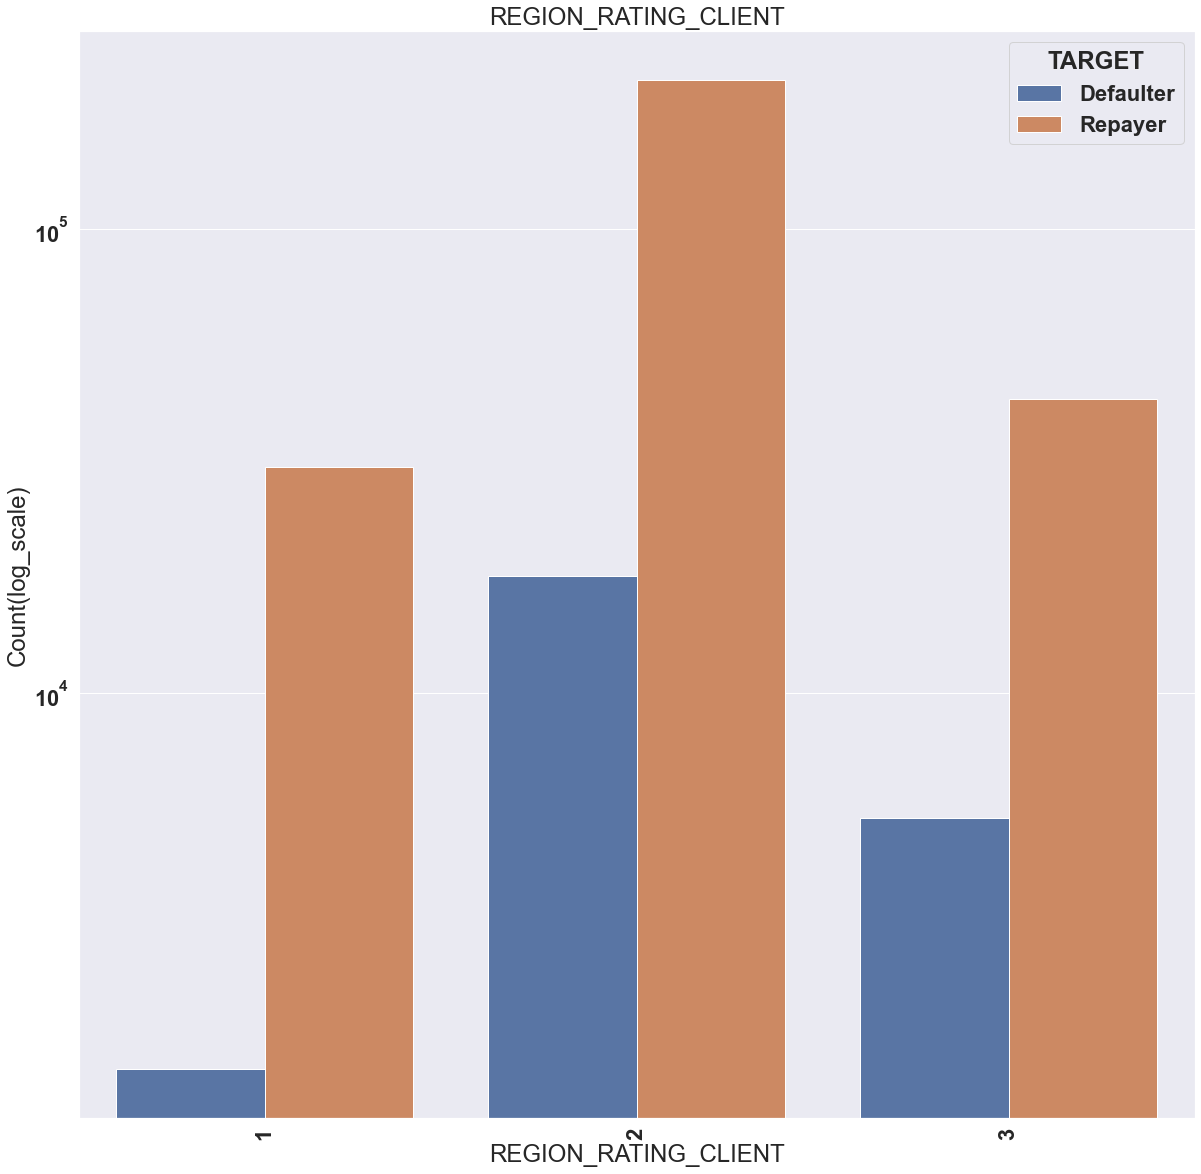

In [141]:
univariate_type(application_data_set,"REGION_RATING_CLIENT","TARGET",True,True)

###### Conclusions:Client Region Rating with 3 has highest % of being defaulter. WHile Region_rating of 2 have more in number for loan application

### OCCUPATION TYPE vs TARGET VARIABLE

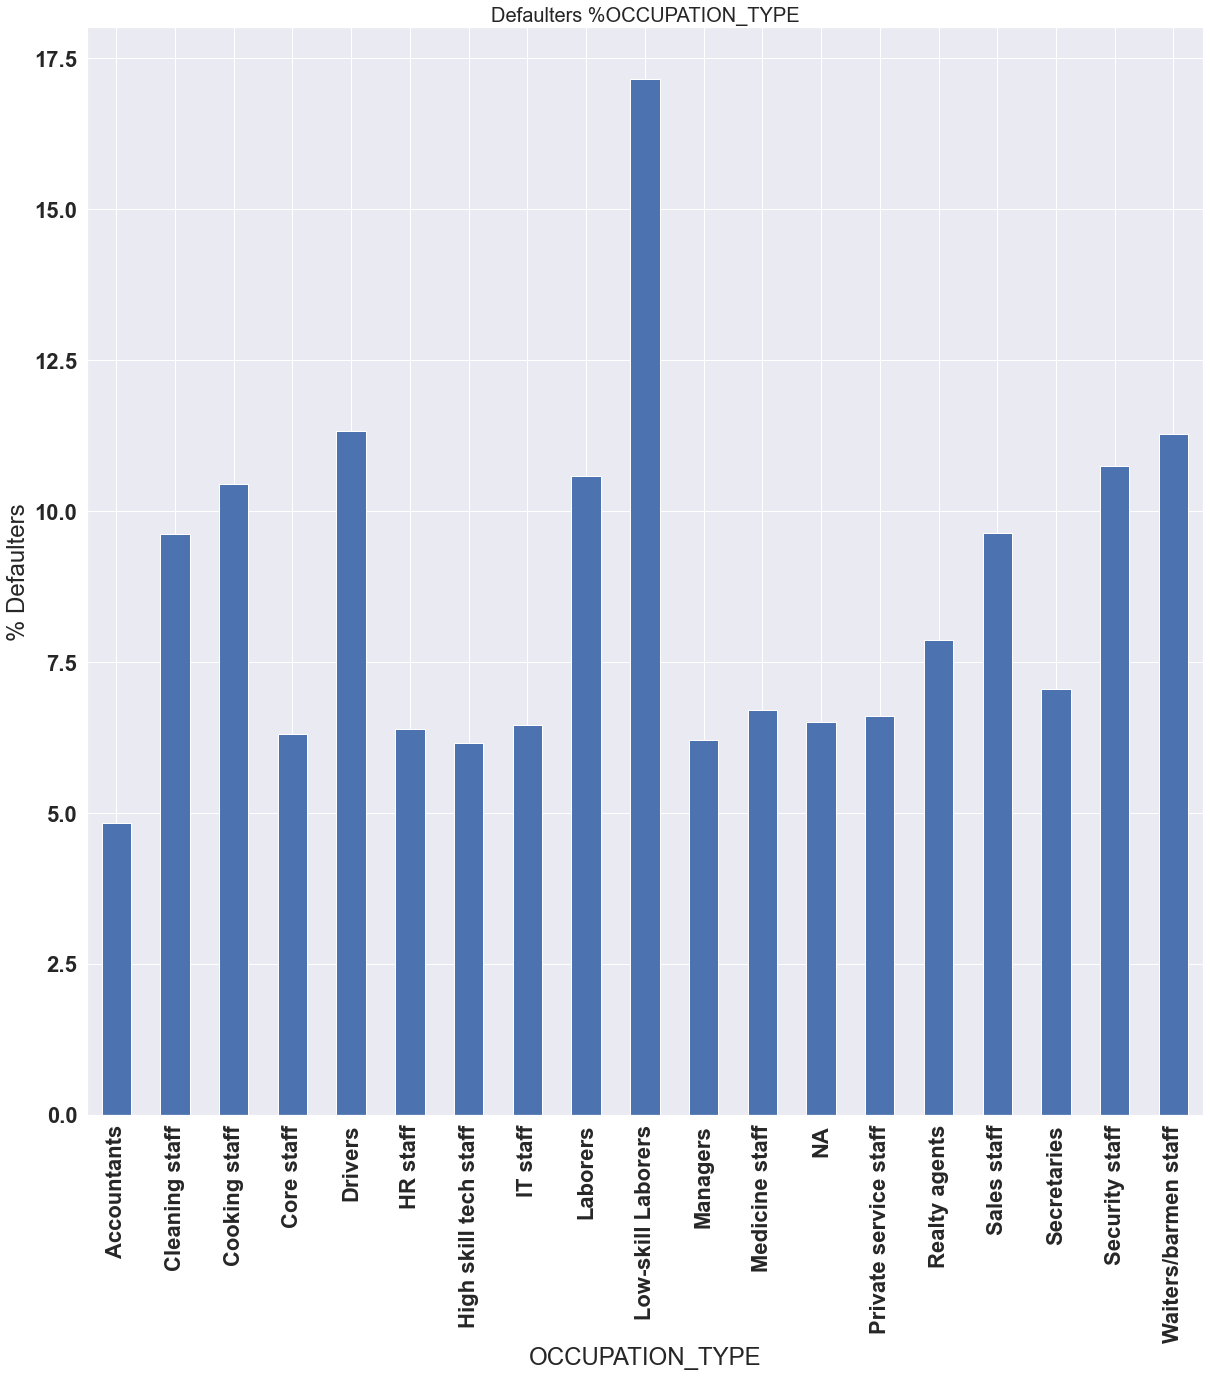

In [142]:
univariate_defaulter_per_analysis(application_data_set,"OCCUPATION_TYPE","TARGET",True)

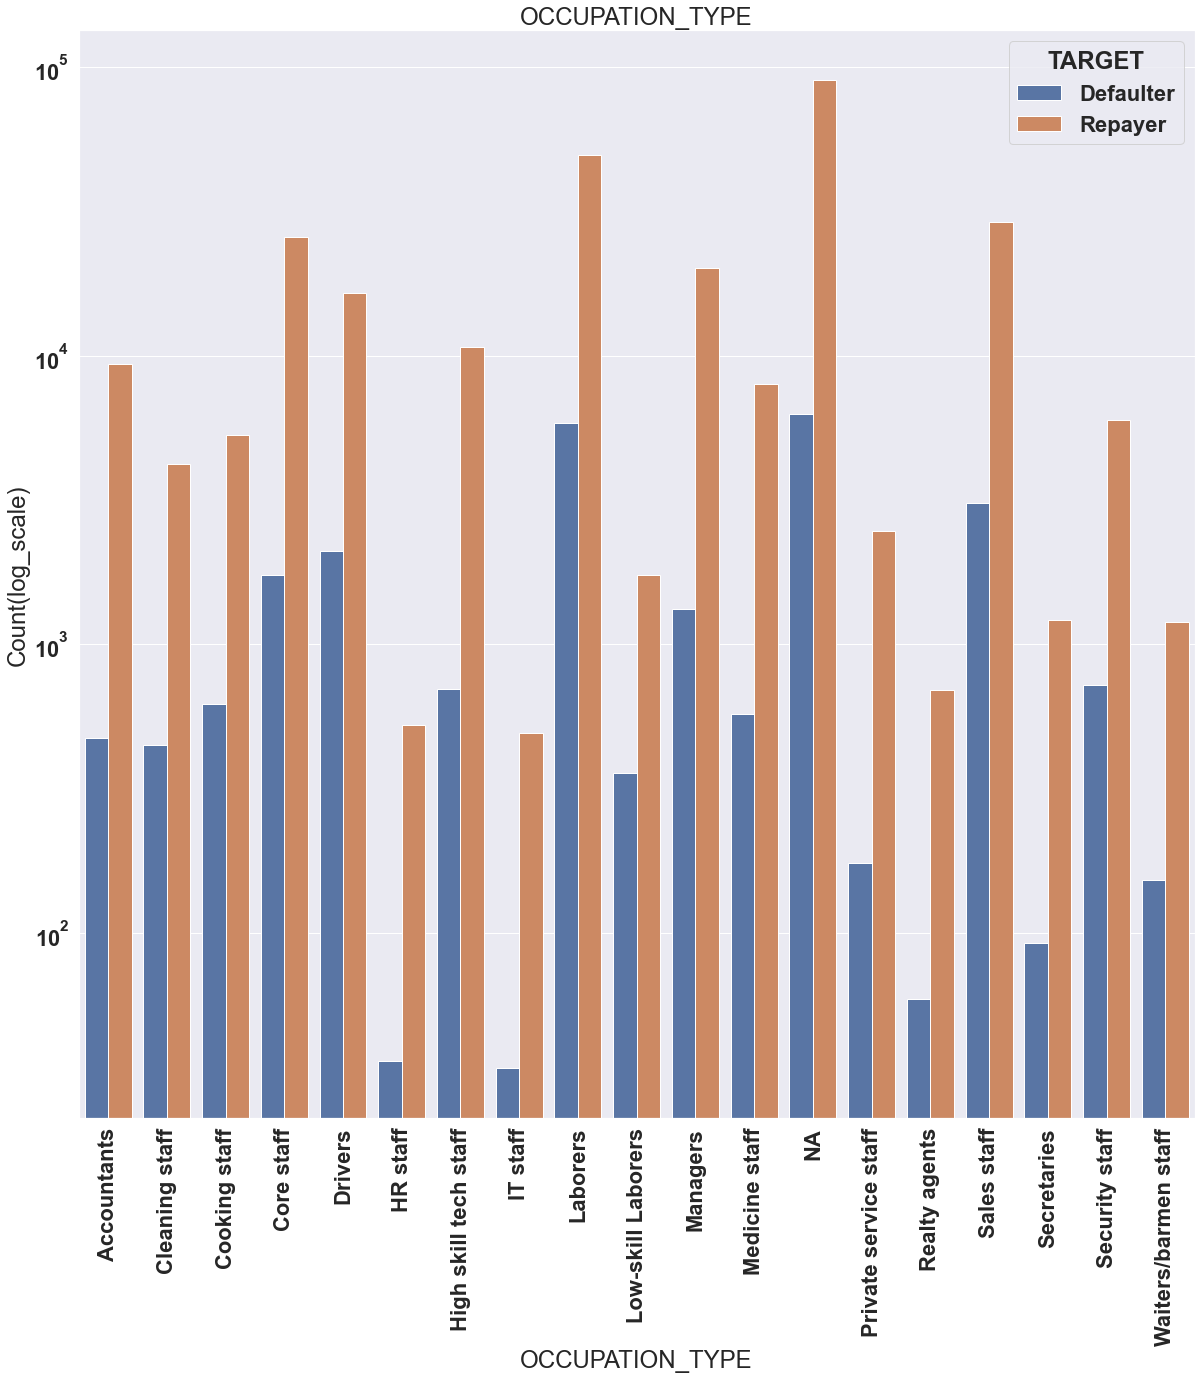

In [143]:
univariate_type(application_data_set,"OCCUPATION_TYPE","TARGET",True,True)

###### Conclusion: Low skills labourer have highest chance of being defaulter and IT staff have less chances of being applied for loan

### ORGANIZATION_TYPE VS TARGET VARIABLE

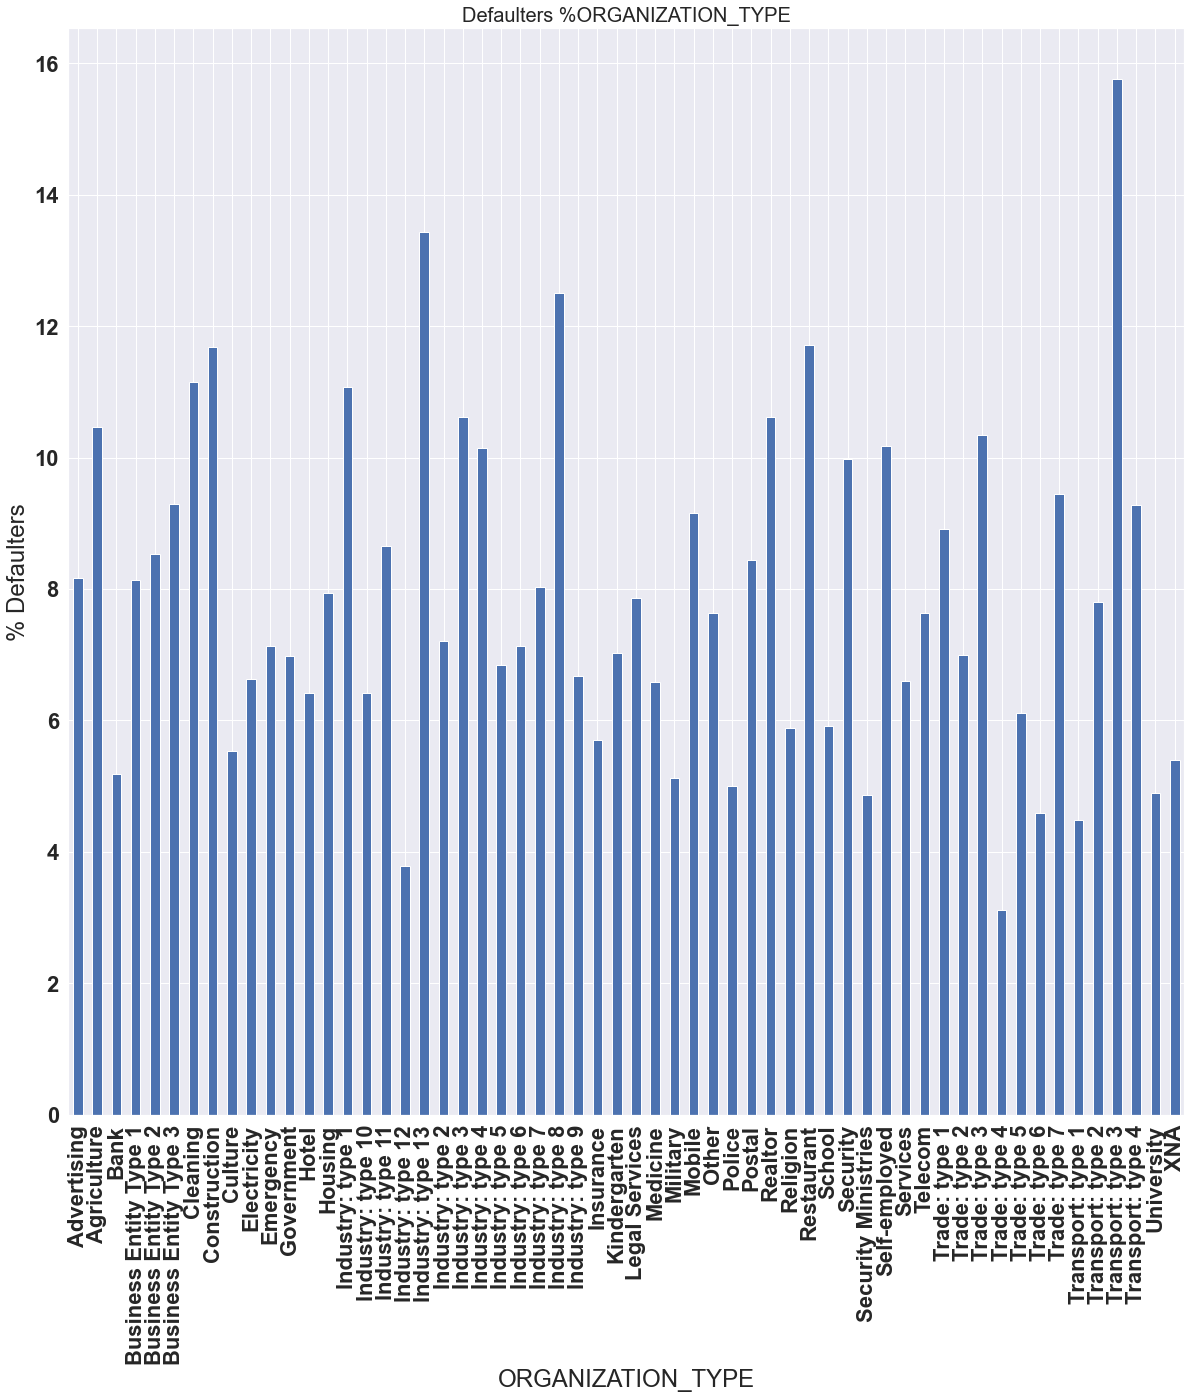

In [144]:
univariate_defaulter_per_analysis(application_data_set,"ORGANIZATION_TYPE","TARGET",True)

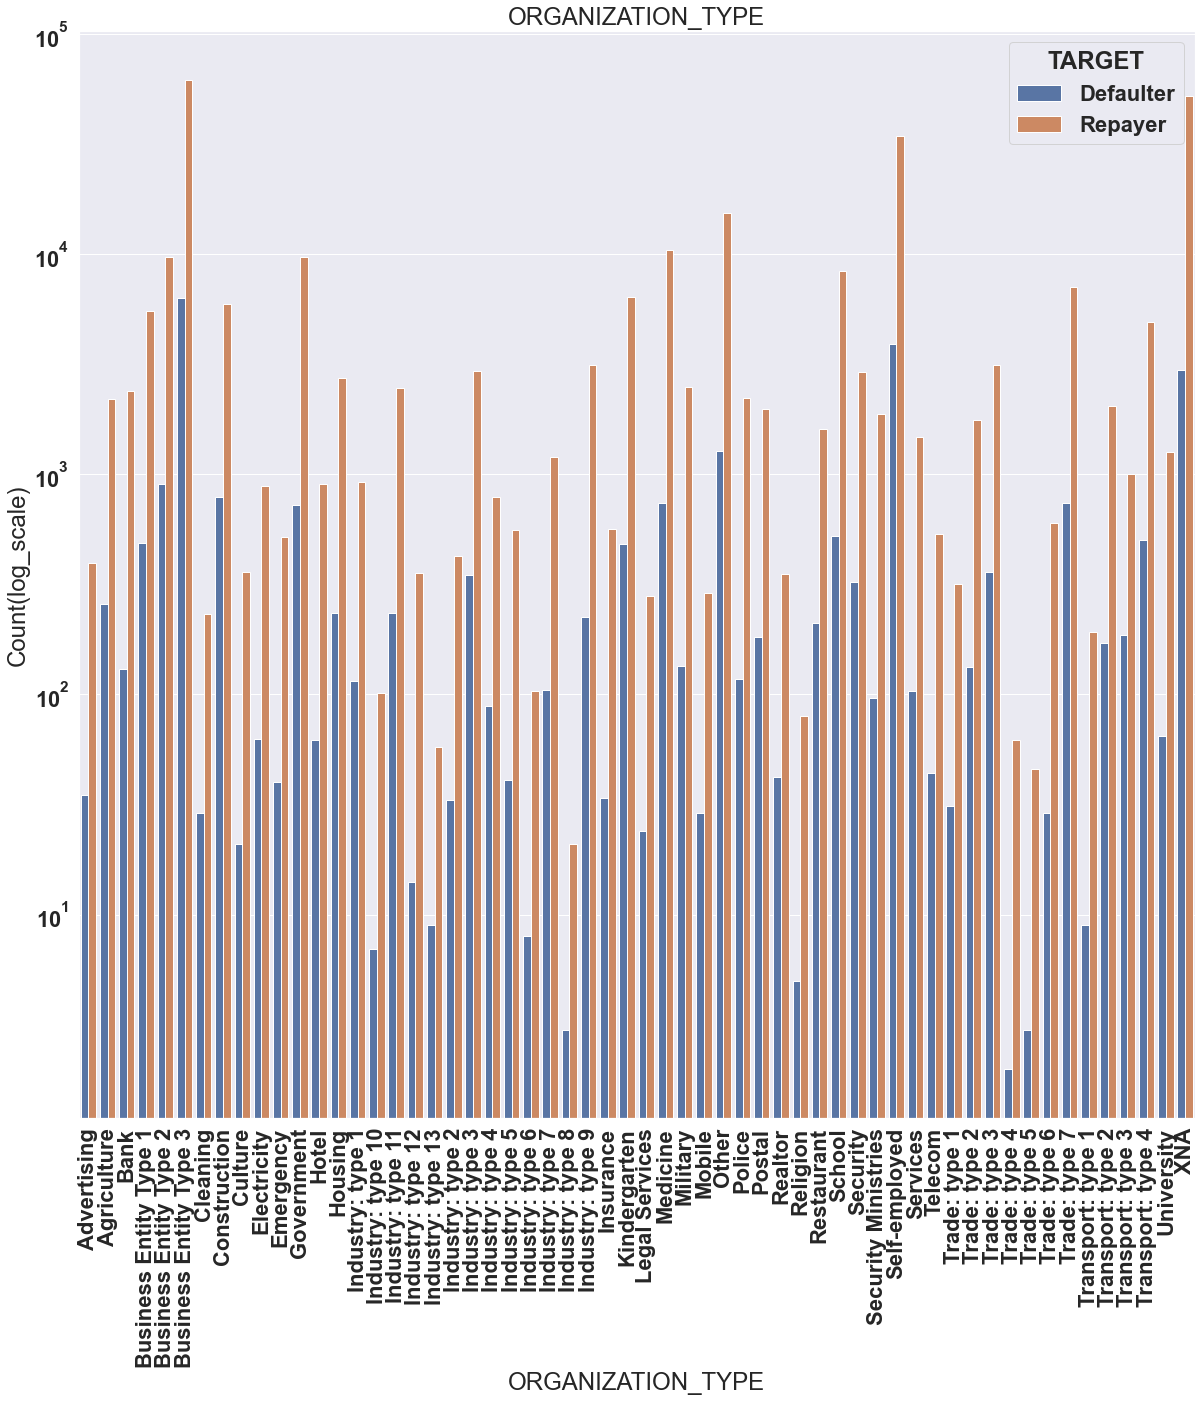

In [145]:
univariate_type(application_data_set,"ORGANIZATION_TYPE","TARGET",True,True)

###### Conclusion :  Clients with type 3 are highest defaulter and most application are from XNA and Business enity 3

### EMPLOYEMENT_YEARS vs TARGET VARIABLE 

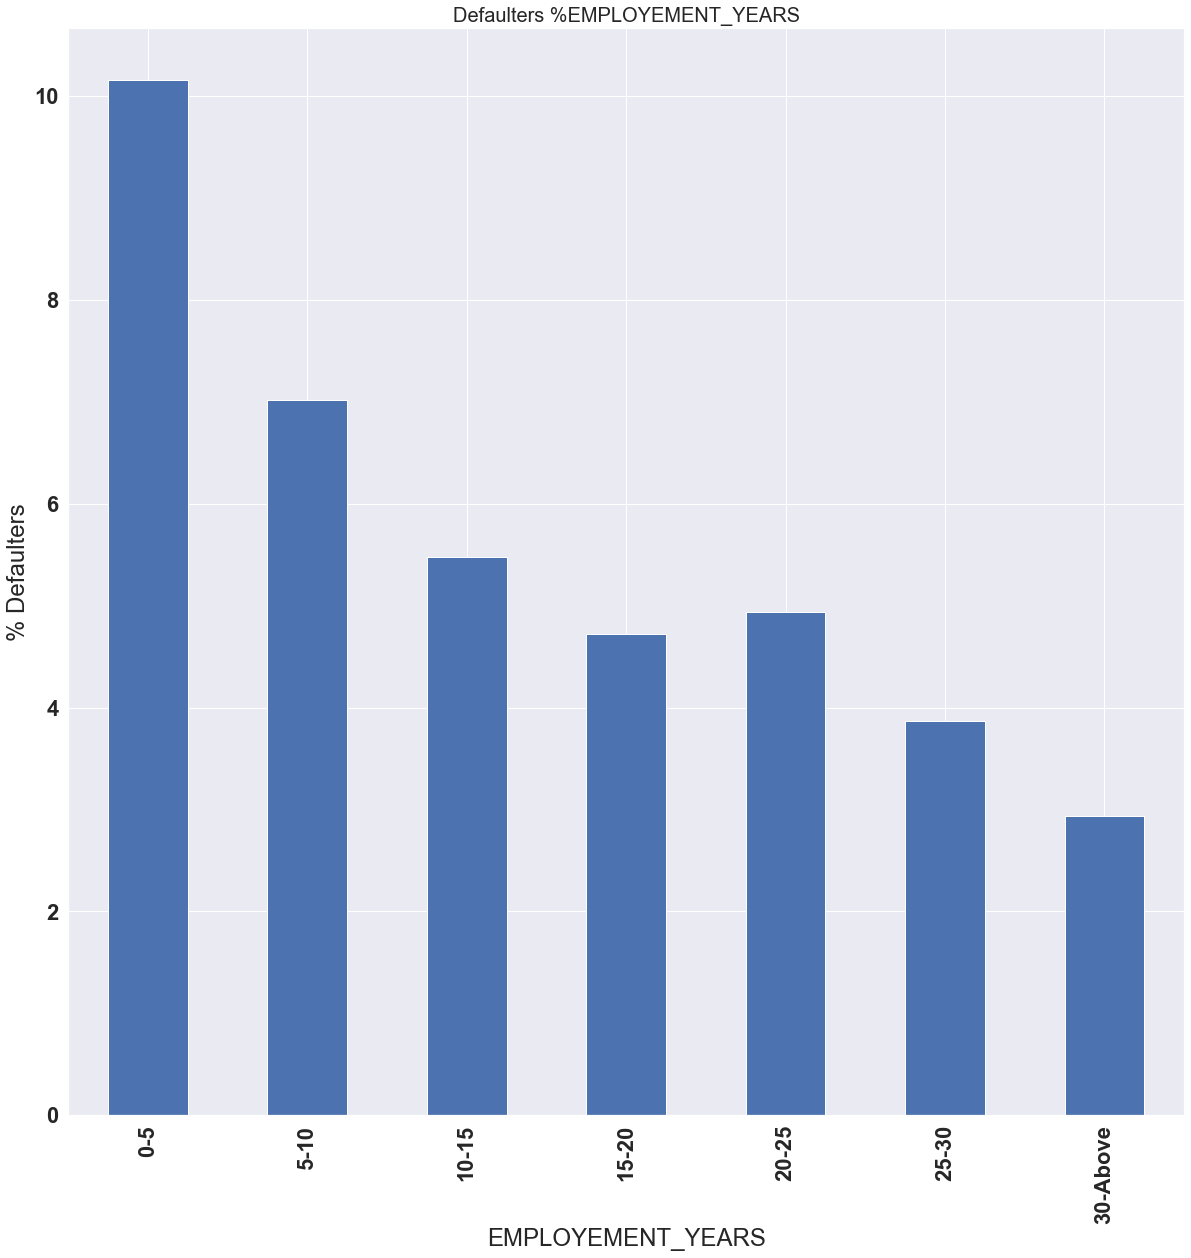

In [146]:
univariate_defaulter_per_analysis(application_data_set,"EMPLOYEMENT_YEARS","TARGET",True)

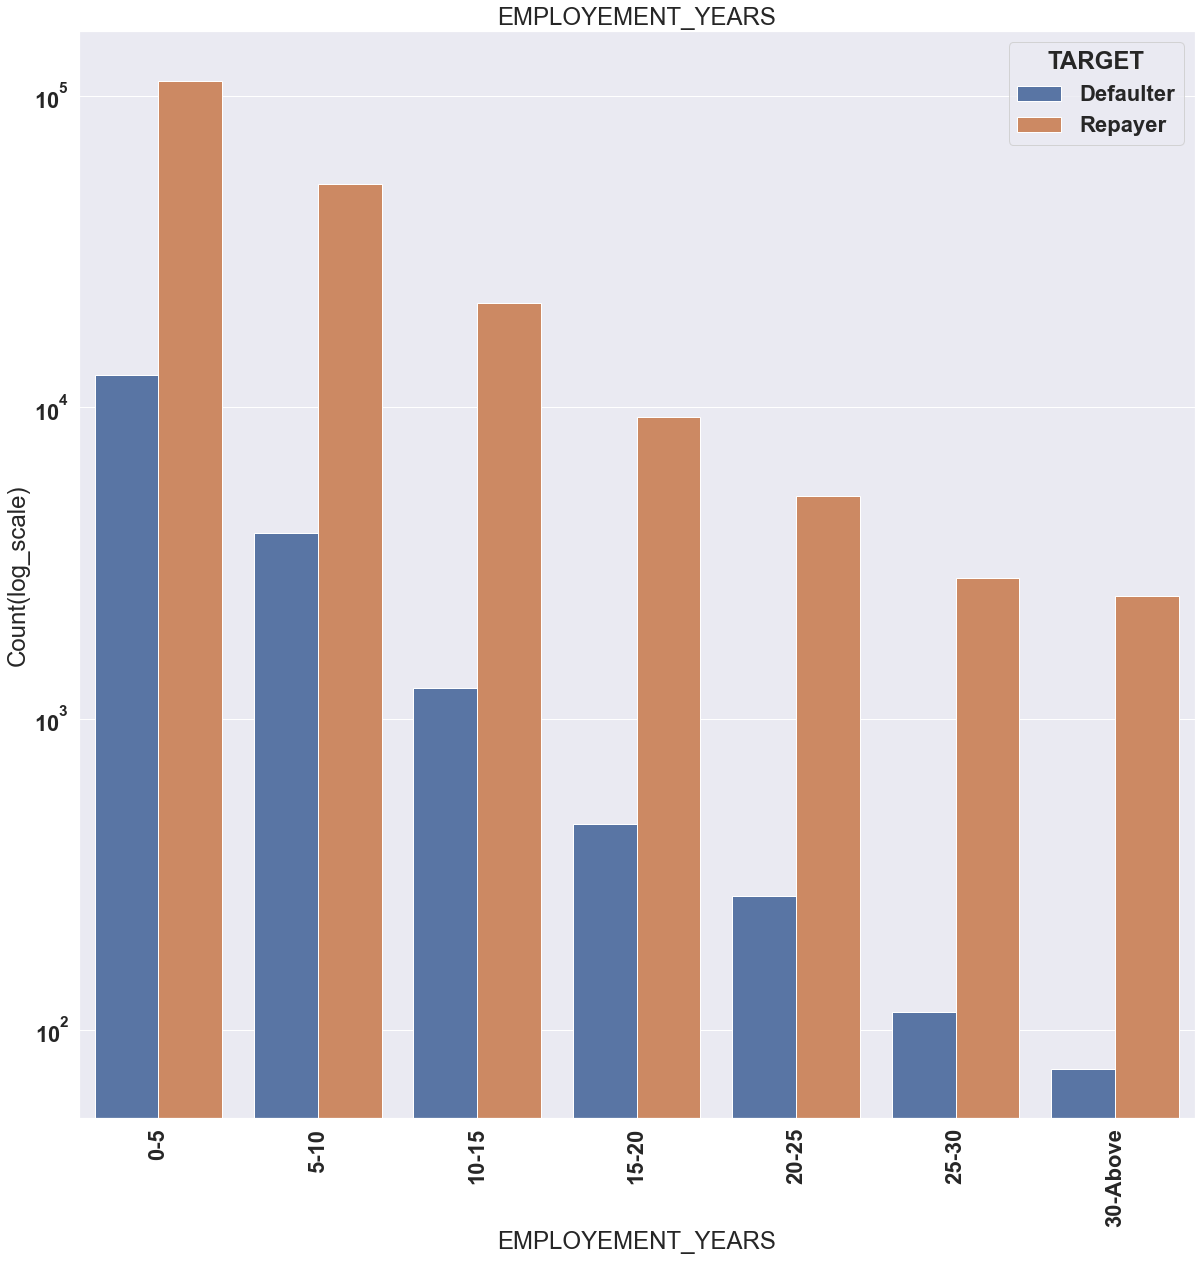

In [147]:
univariate_type(application_data_set,"EMPLOYEMENT_YEARS","TARGET",True,True)

###### Conclusion: clients with 0-5 years of employment are more likely to default loan and they are the most numbers who who applied for the loan

### AMT_CREDIT_RANGE vs TARGET VARIABLE 

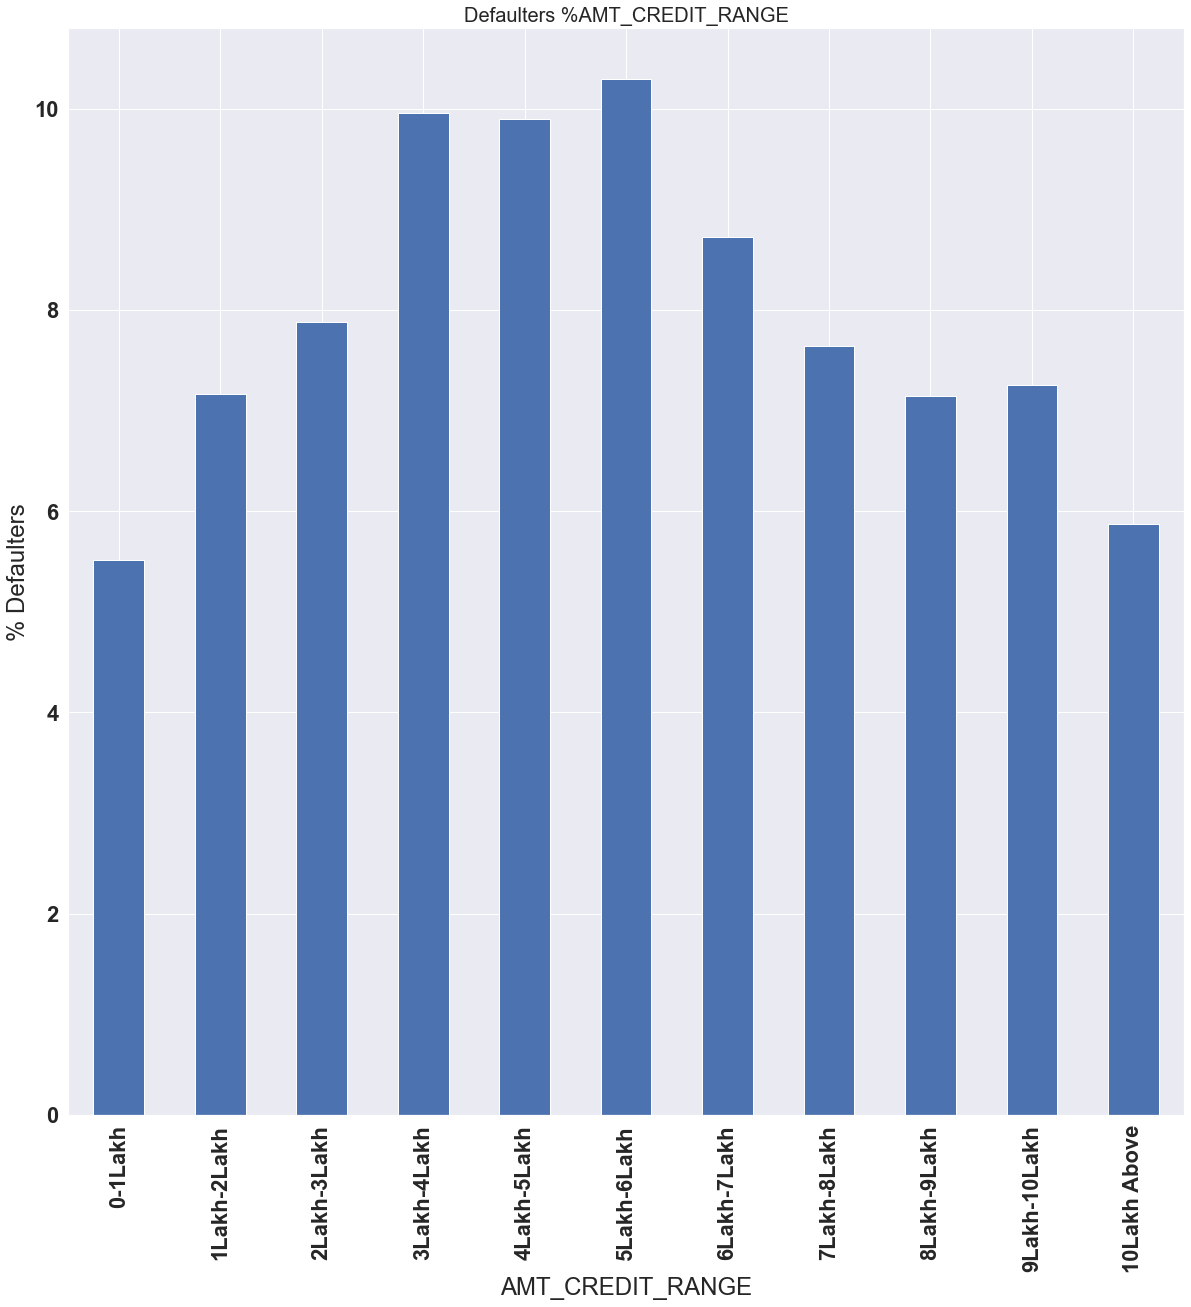

In [148]:
univariate_defaulter_per_analysis(application_data_set,"AMT_CREDIT_RANGE","TARGET",True)

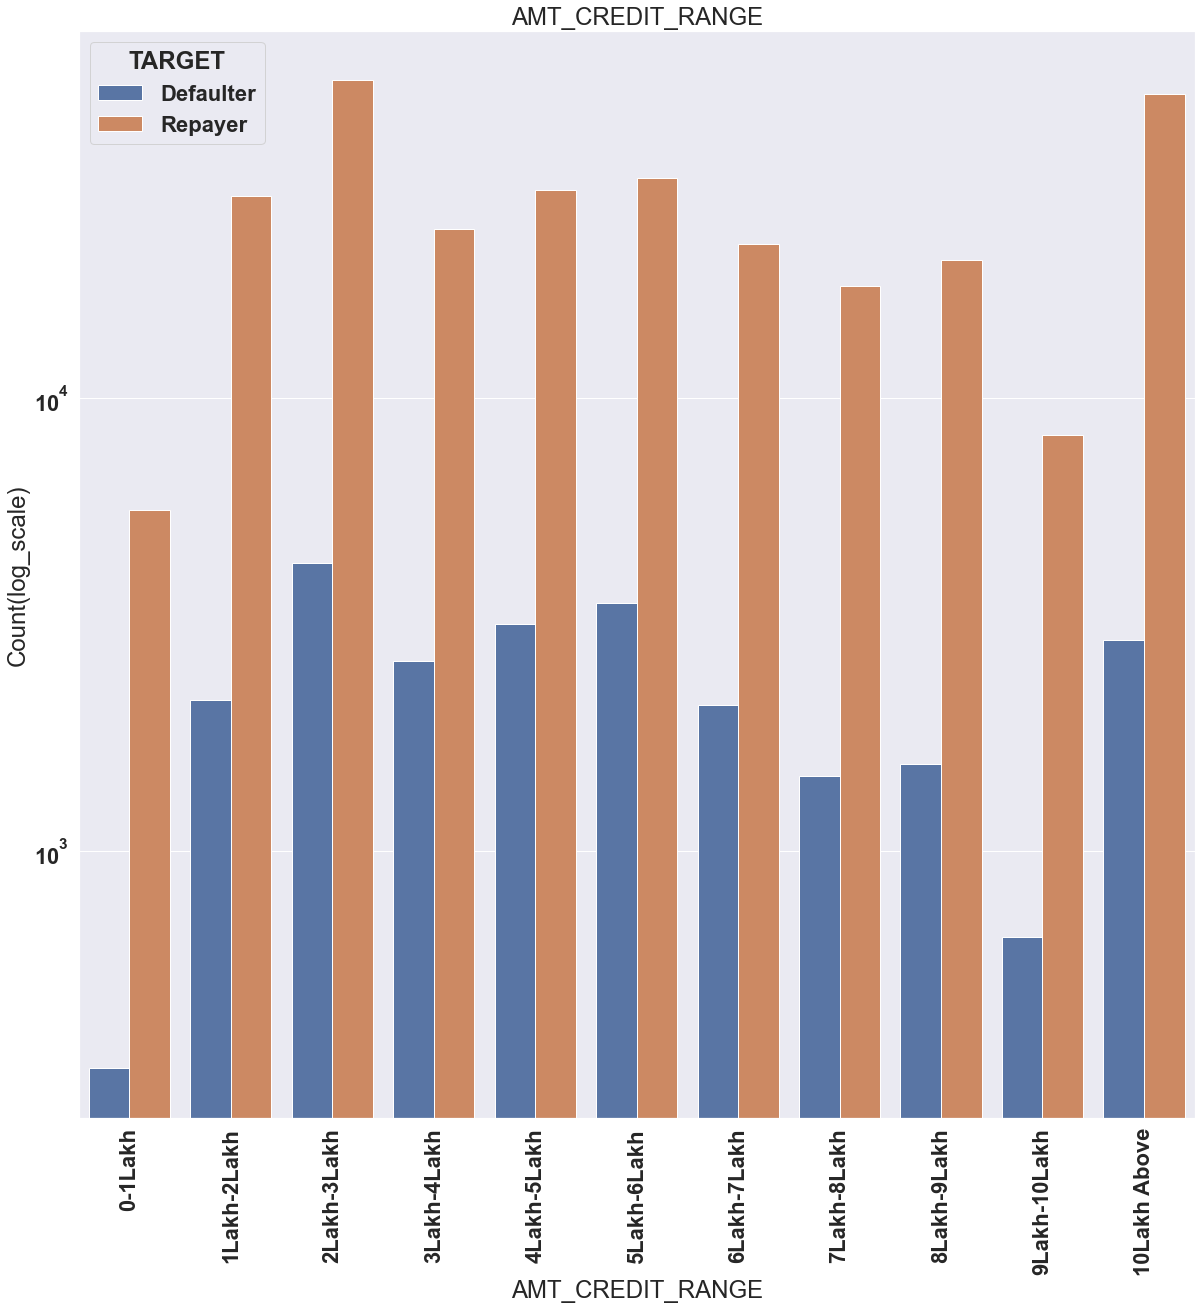

In [149]:
univariate_type(application_data_set,"AMT_CREDIT_RANGE","TARGET",True,True)

###### Conclusion: Client with 3-6 lakhs range are most numbers of defaulters. 

### AMT_INCOME_RANGE vs TARGET VARIABLE 

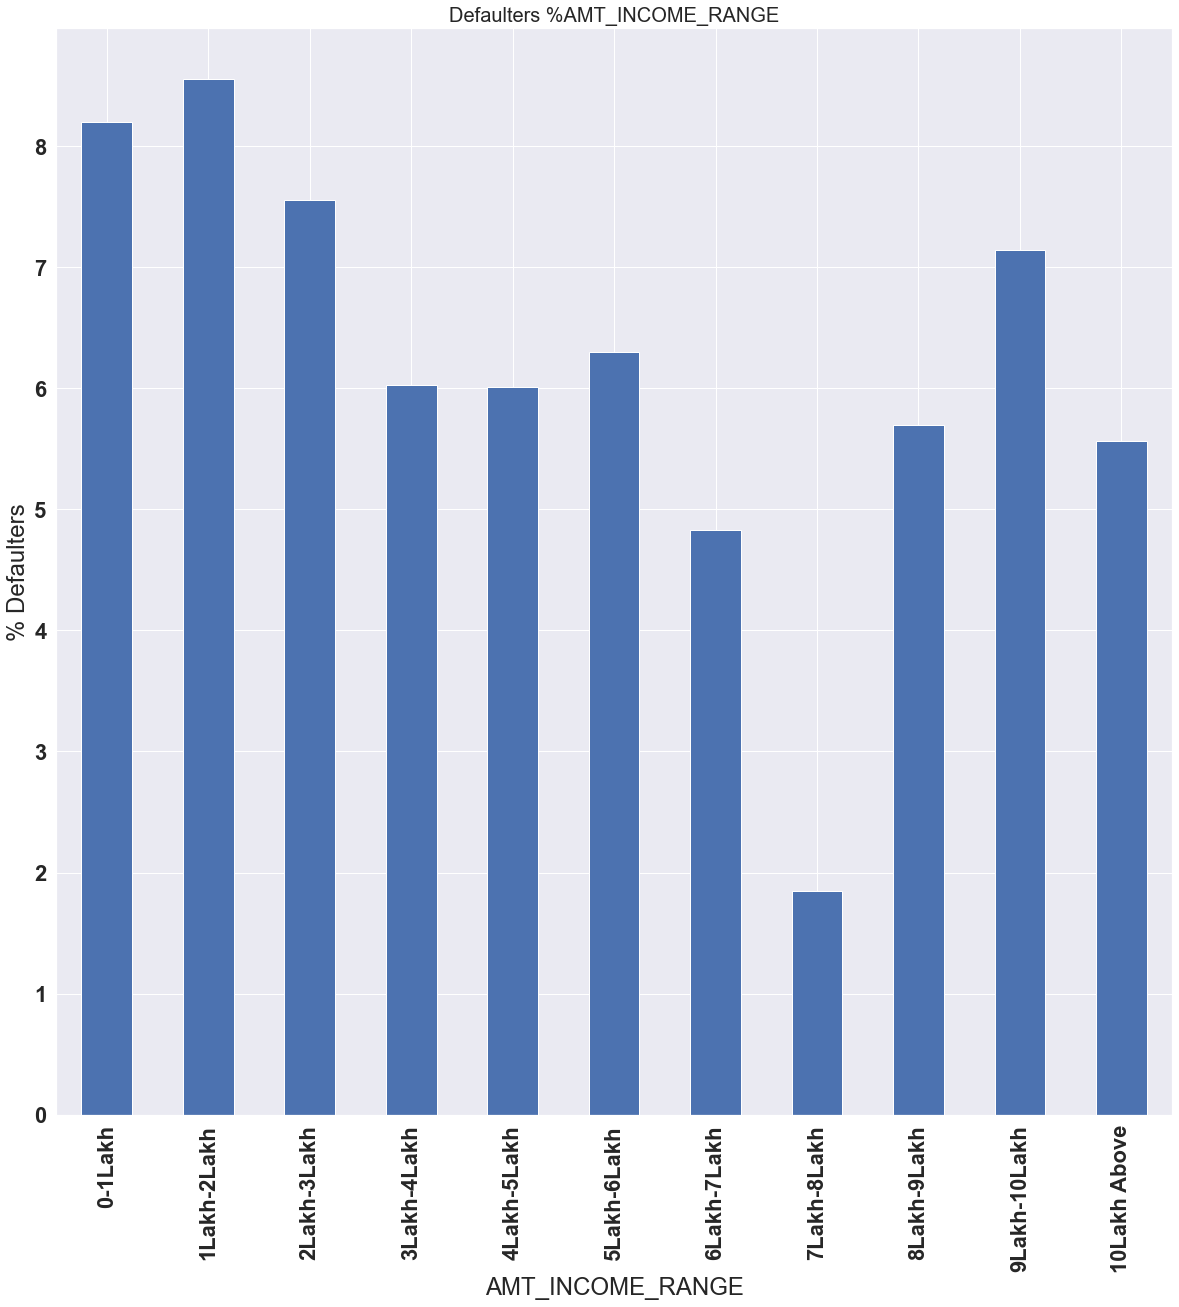

In [150]:
univariate_defaulter_per_analysis(application_data_set,"AMT_INCOME_RANGE","TARGET",True)

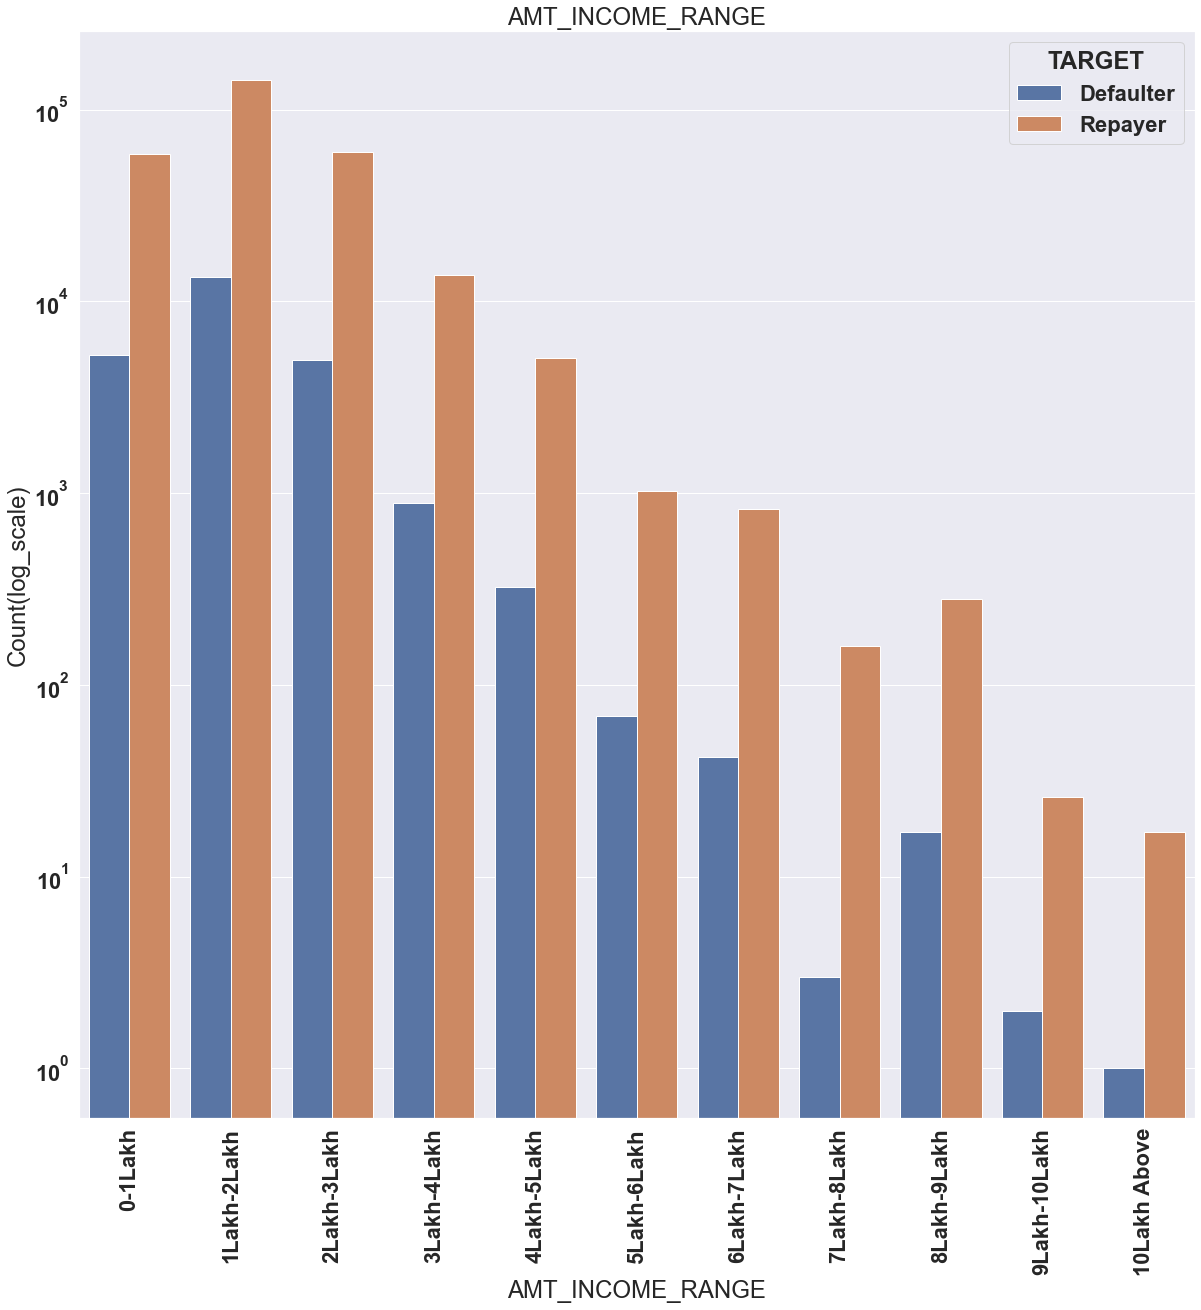

In [151]:
univariate_type(application_data_set,"AMT_INCOME_RANGE","TARGET",True,True)

###### Conclusion : Clients with 0-3 lakh income range are most likely to be defaulters and they are the once who mostly applied for loan 

### CNT_CHILDREN vs TARGET VARIABLE 

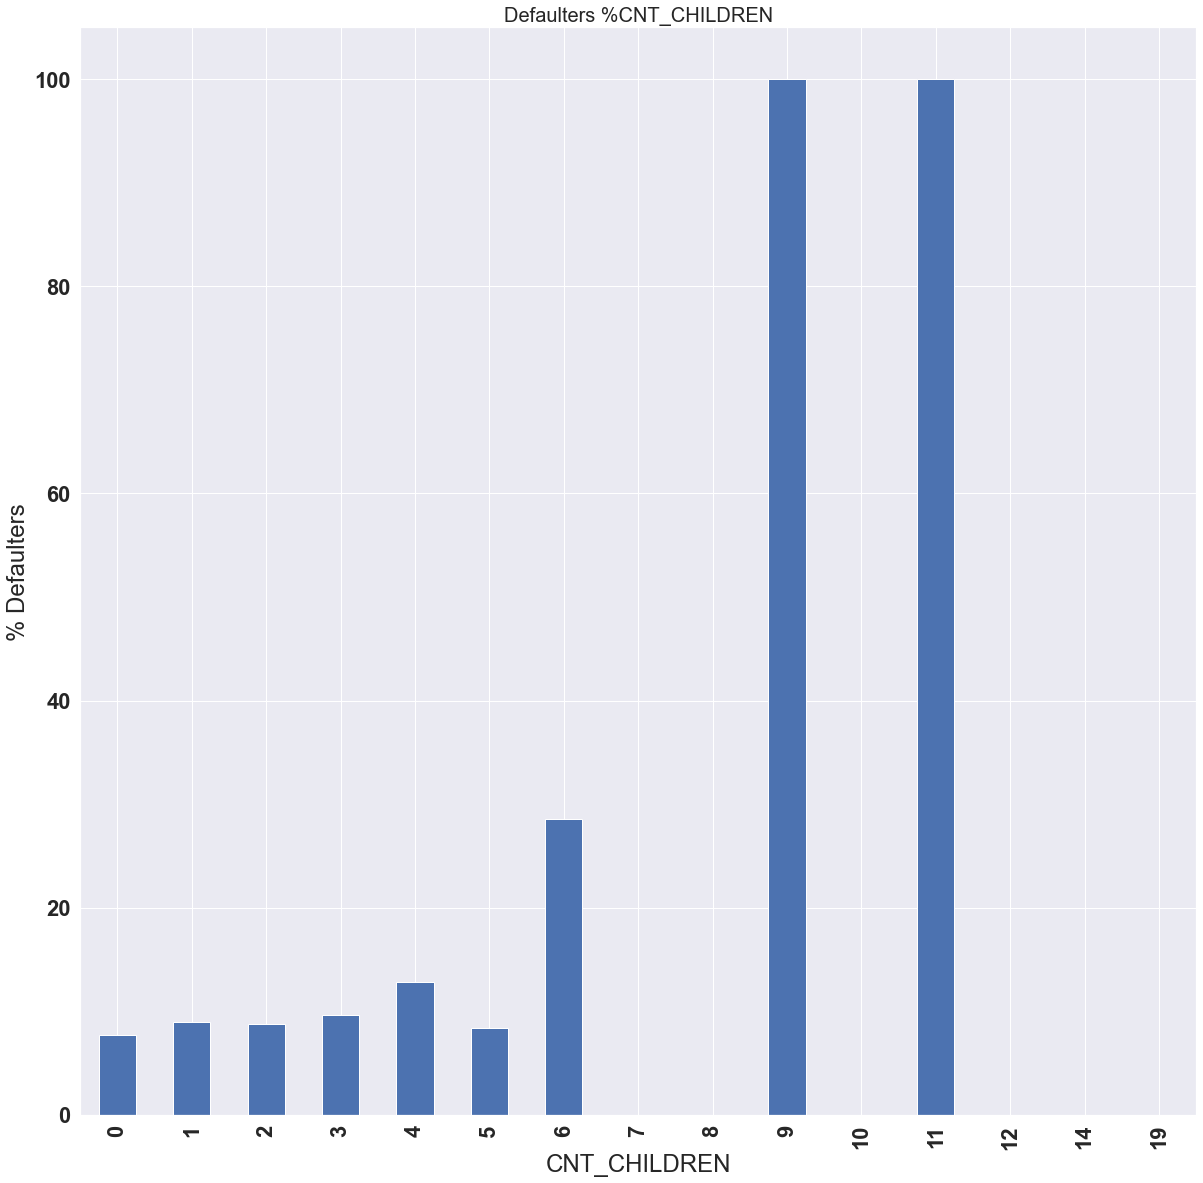

In [152]:
univariate_defaulter_per_analysis(application_data_set,"CNT_CHILDREN","TARGET",True)

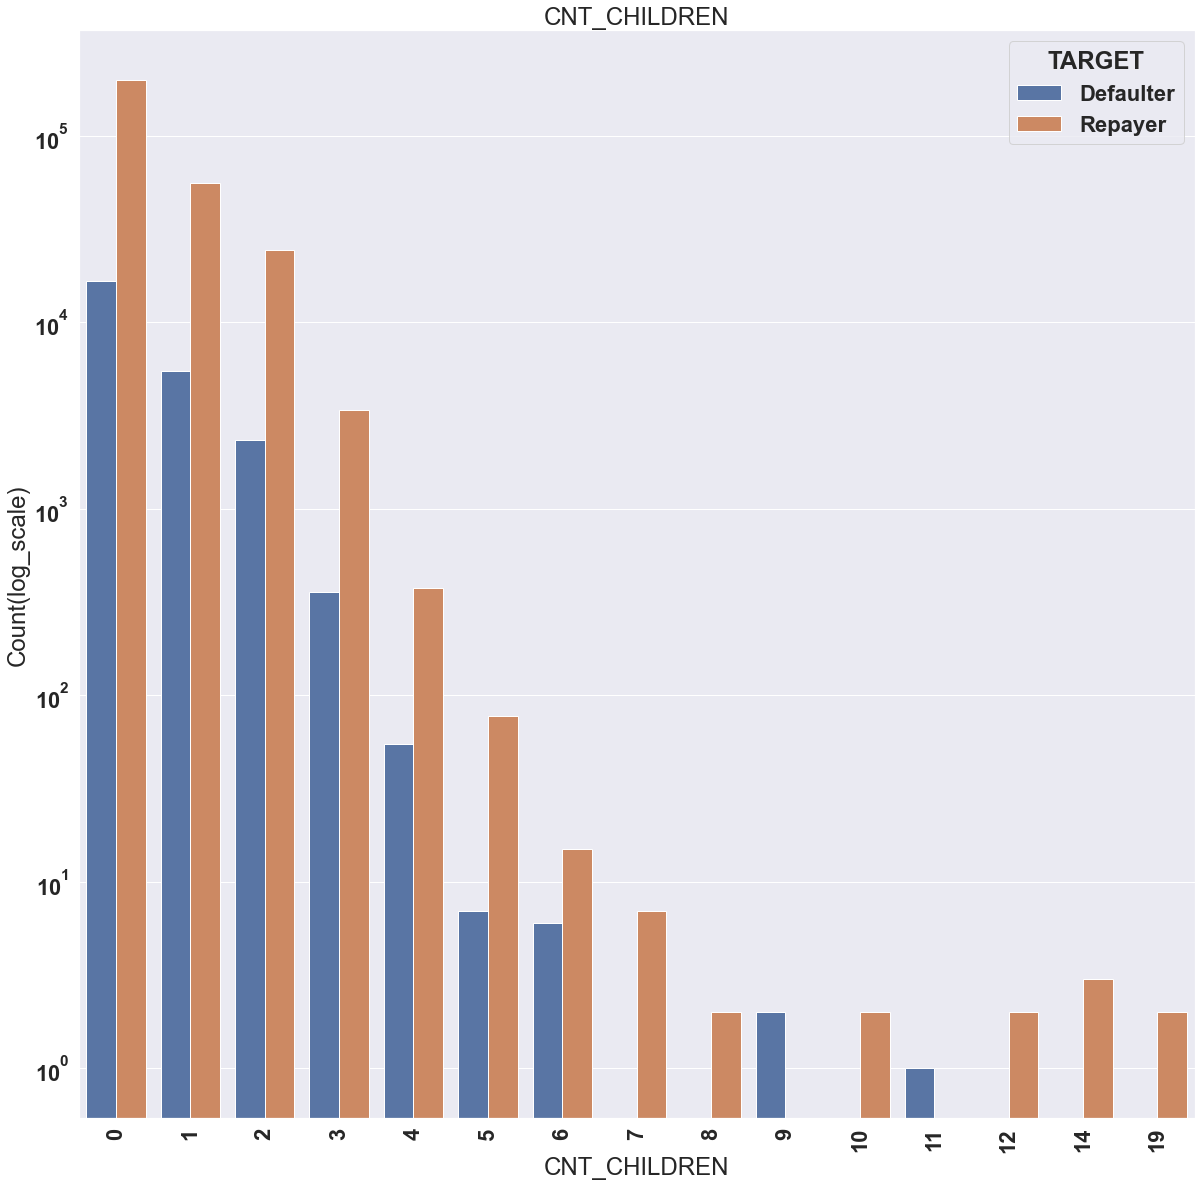

In [153]:
univariate_type(application_data_set,"CNT_CHILDREN","TARGET",True,True)

###### Conclusion: Client with more than 6 Children are most likely defaulter and most applicant have either no children or less than 3

### CNT_FAM_MEMBERS vs TARGET VARIABLE 

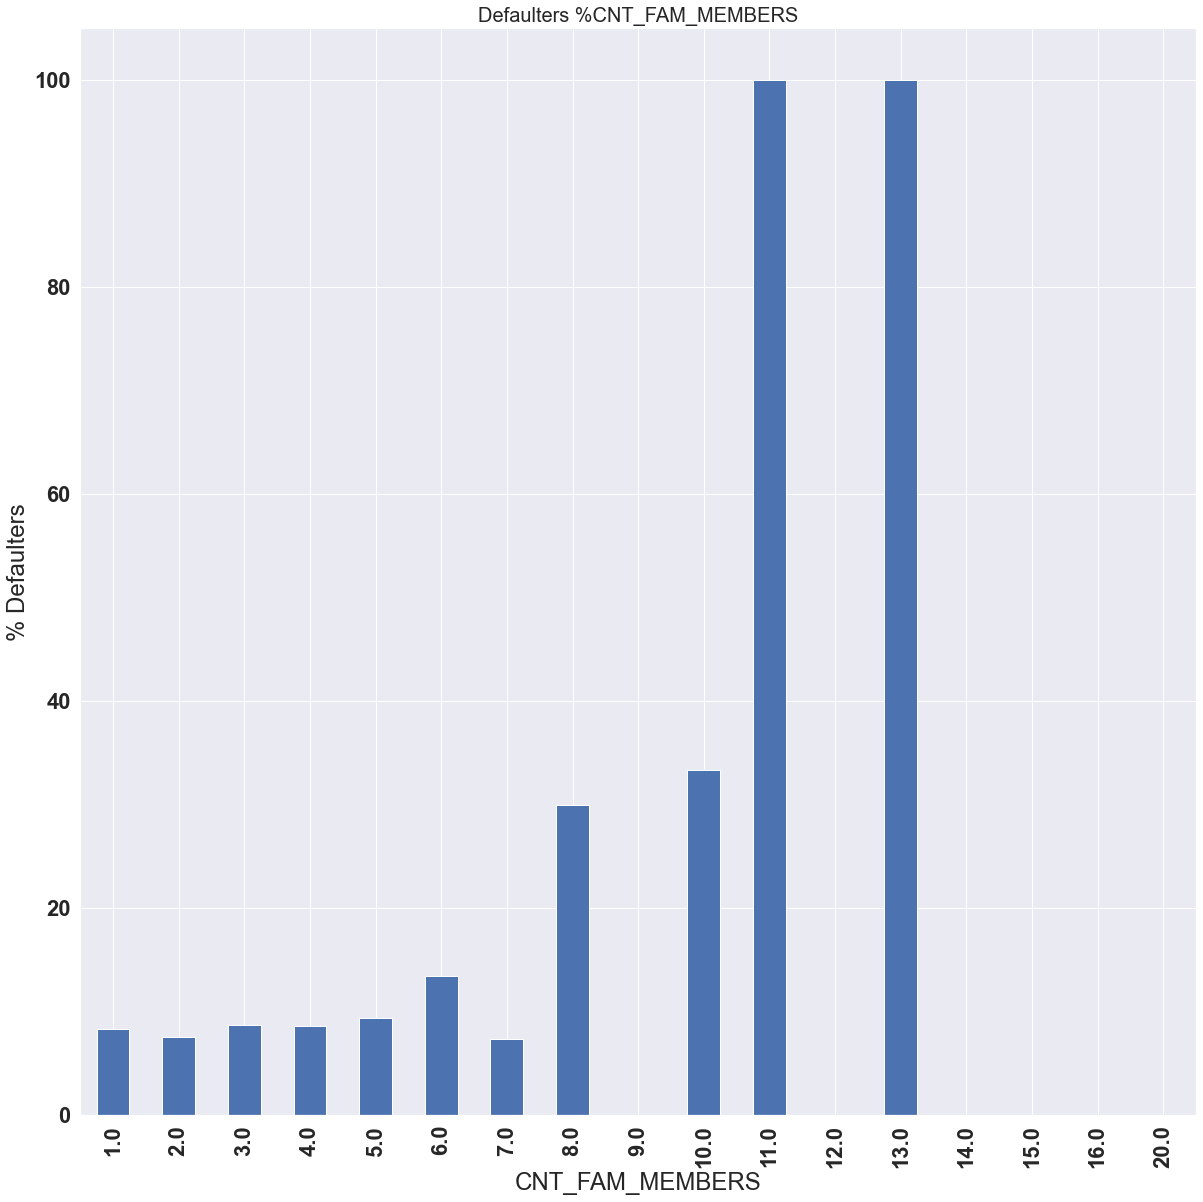

In [154]:
univariate_defaulter_per_analysis(application_data_set,"CNT_FAM_MEMBERS","TARGET",True)

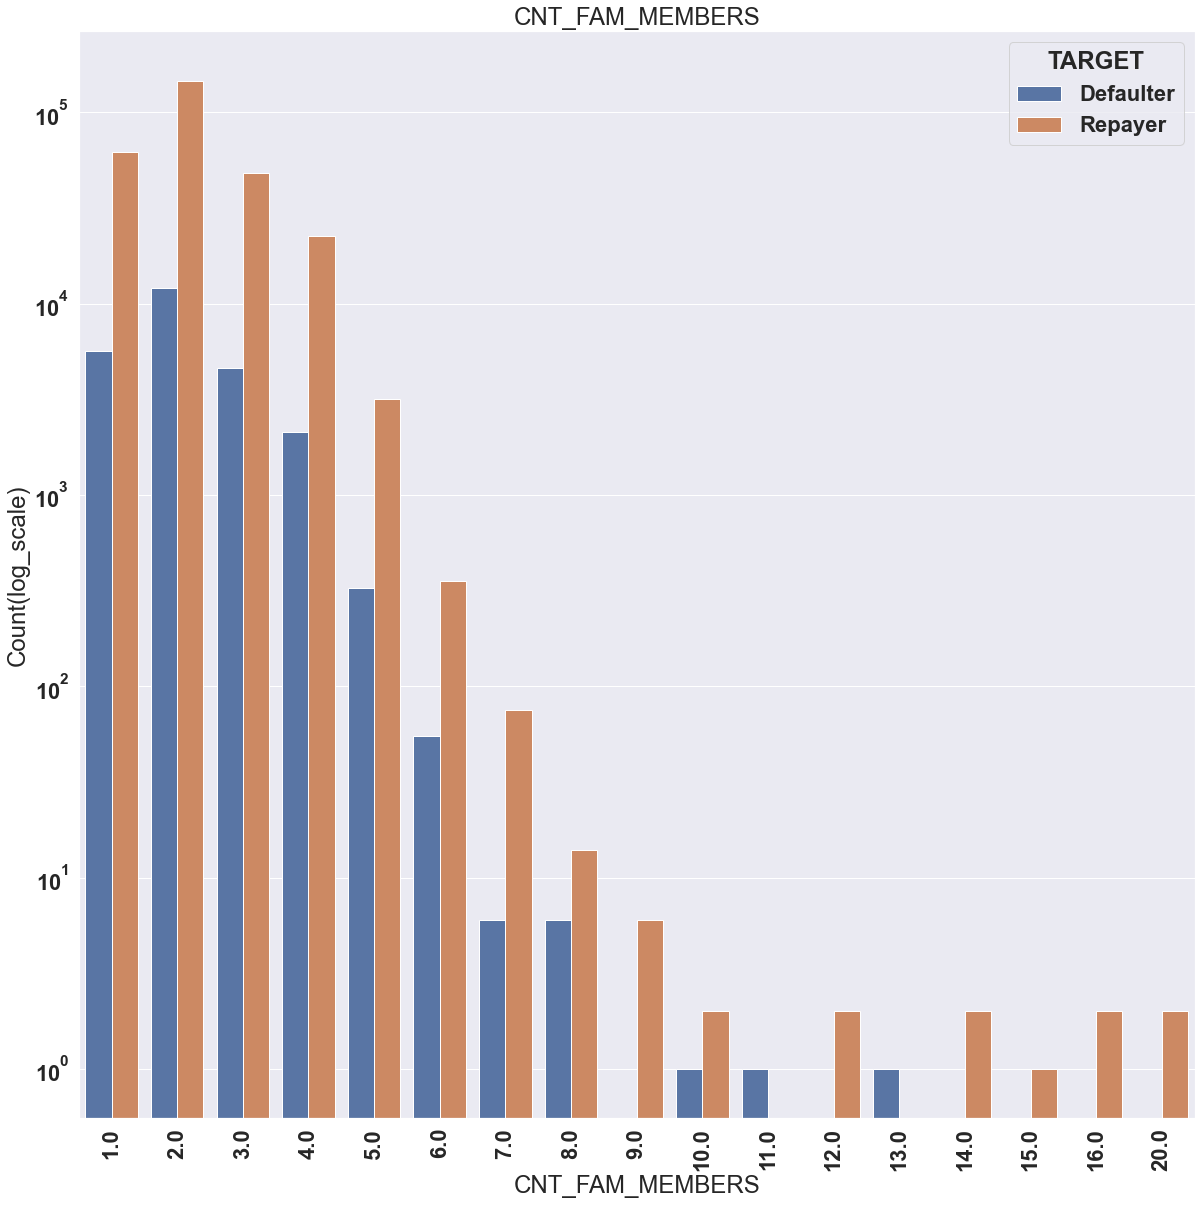

In [155]:
univariate_type(application_data_set,"CNT_FAM_MEMBERS","TARGET",True,True)

###### Conclusion: Family memebres with count more than 8 are most likely defaulters 

### Bivariate Analysis

In [156]:
def bivariate_analysis(x,y,df,hue,labels):
    fig, ax = plt.subplots(figsize=(20,20))
    sns.set_style("whitegrid")
    sns.set(font_scale = 2)
    sns.barplot(x=x,y=y,data=df, hue=hue, palette ="Blues")
    plt.xticks(rotation=45)
    plt.title(x + " " +  "vs" + " " + y) 
    plt.show()

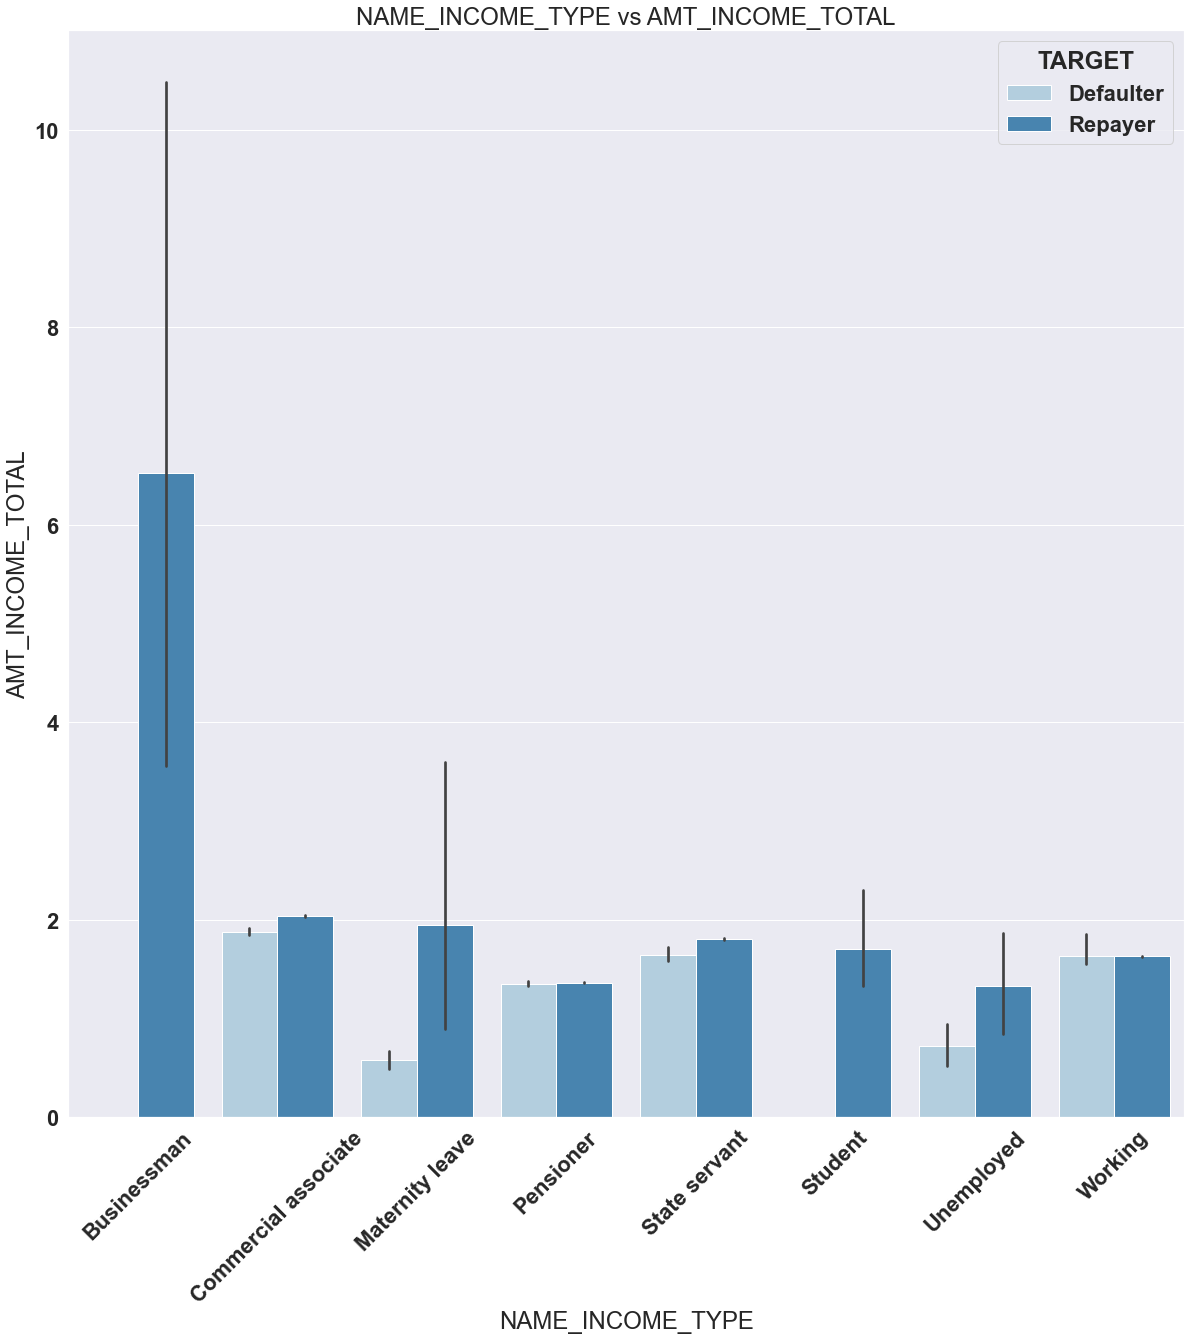

In [157]:
#Imvestigating the relationship between income and client occupation
bivariate_analysis("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",application_data_set,"TARGET",['Repayer','Defaulter'])

###### Conclusion:Businessmen catageory has highest income with range of ~ 3.5 - 10.5 and more likely to apply for loan 

### Finding Correlation between different category column 

In [158]:
application_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  object  
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

In [159]:
application_data_set.shape

(307511, 54)

In [160]:
application_data_set.head()

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002  Defaulter         Cash loans           M               Y   
1      100003    Repayer         Cash loans           F               N   
2      100004    Repayer    Revolving loans           M               Y   
3      100006    Repayer         Cash loans           F               Y   
4      100007    Repayer         Cash loans           M               Y   

  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0            0             2.025    4.065975      24700.5            3.510   
1            0             2.700   12.935025      35698.5           11.295   
2            0             0.675    1.350000       6750.0            1.350   
3            0             1.350    3.126825      29686.5            2.970   
4            0             1.215    5.130000      21865.5            5.130   

   ... AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0  ...                        0.0                       0.0   
1  ...                        0.0                       0.0   
2  ...                        0.0                       0.0   
3  ...                        0.0                       0.0   
4  ...                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR DAYS_BIRTH_BINS  \
0                       0.0                        1.0           20-25   
1                       0.0                        0.0           40-45   
2                       0.0                        0.0           50-55   
3                       0.0                        1.0           50-55   
4                       0.0                        0.0           50-55   

   YEARS_EMPLOYED  EMPLOYEMENT_YEARS  AMT_INCOME_RANGE  AMT_CREDIT_RANGE  \
0               1                0-5       2Lakh-3Lakh       4Lakh-5Lakh   
1               3                0-5       2Lakh-3Lakh      10Lakh Above   
2               0                NaN           0-1Lakh       1Lakh-2Lakh   
3               8               5-10       1Lakh-2Lakh       3Lakh-4Lakh   
4               8               5-10       1Lakh-2Lakh       5Lakh-6Lakh   

   AMT_GOODS_PRICE_RANGE  
0            3Lakh-4Lakh  
1           10Lakh Above  
2            1Lakh-2Lakh  
3            2Lakh-3Lakh  
4            5Lakh-6Lakh  

[5 rows x 54 columns]

In [161]:
df_category_columns_1 = application_data_set.select_dtypes(exclude = ['category']).columns
df_category_columns_1

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'YEARS_EMPLOYED'],
      dtype='object')

In [162]:
df_category_columns = application_data_set[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 
       'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',]]

In [163]:
df_category_columns.shape

(307511, 22)

In [164]:
df_category_columns['TARGET']

0         Defaulter
1           Repayer
2           Repayer
3           Repayer
4           Repayer
            ...    
307506      Repayer
307507      Repayer
307508      Repayer
307509    Defaulter
307510      Repayer
Name: TARGET, Length: 307511, dtype: object

In [165]:
df_category_columns['TARGET']= df_category_columns['TARGET'].replace({"Defaulter":1, "Repayer":0})

###### Grouping/Binning df_category_columns with  TARGET =1 and TARGET = 0

In [166]:
df_defaulter = df_category_columns.loc[df_category_columns['TARGET'] == 1]

In [167]:
df_defaulter = df_defaulter.drop('TARGET', axis=1)

In [168]:
df_defaulter.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              2.025    4.065975      24700.5            3.510   
26             1.125    9.799920      27076.5            7.020   
40             2.025   11.935800      35028.0            8.550   
42             1.350    2.888730      16258.5            2.385   
81             0.810    2.520000      14593.5            2.520   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801          25          637.0             3648.0   
26                    0.018029          51         2628.0             6573.0   
40                    0.025164          47         1262.0             1182.0   
42                    0.007305          36         3597.0               45.0   
81                    0.028663          67       365243.0             5391.0   

    DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  ...  OBS_60_CNT_SOCIAL_CIRCLE  \
0            2120.0                       10  ...                       2.0   
26           1827.0                        9  ...                      10.0   
40           1029.0                        9  ...                       0.0   
42           4409.0                       11  ...                       1.0   
81           4199.0                       10  ...                       1.0   

    DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
0                        2.0                  1134.0                1   
26                       0.0                   161.0                1   
40                       0.0                  1075.0                1   
42                       0.0                  1480.0                1   
81                       1.0                     0.0                0   

    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        0.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        2.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0                         1.0  
26                        2.0                         2.0  
40                        0.0                         4.0  
42                        0.0                         2.0  
81                        0.0                         0.0  

[5 rows x 21 columns]

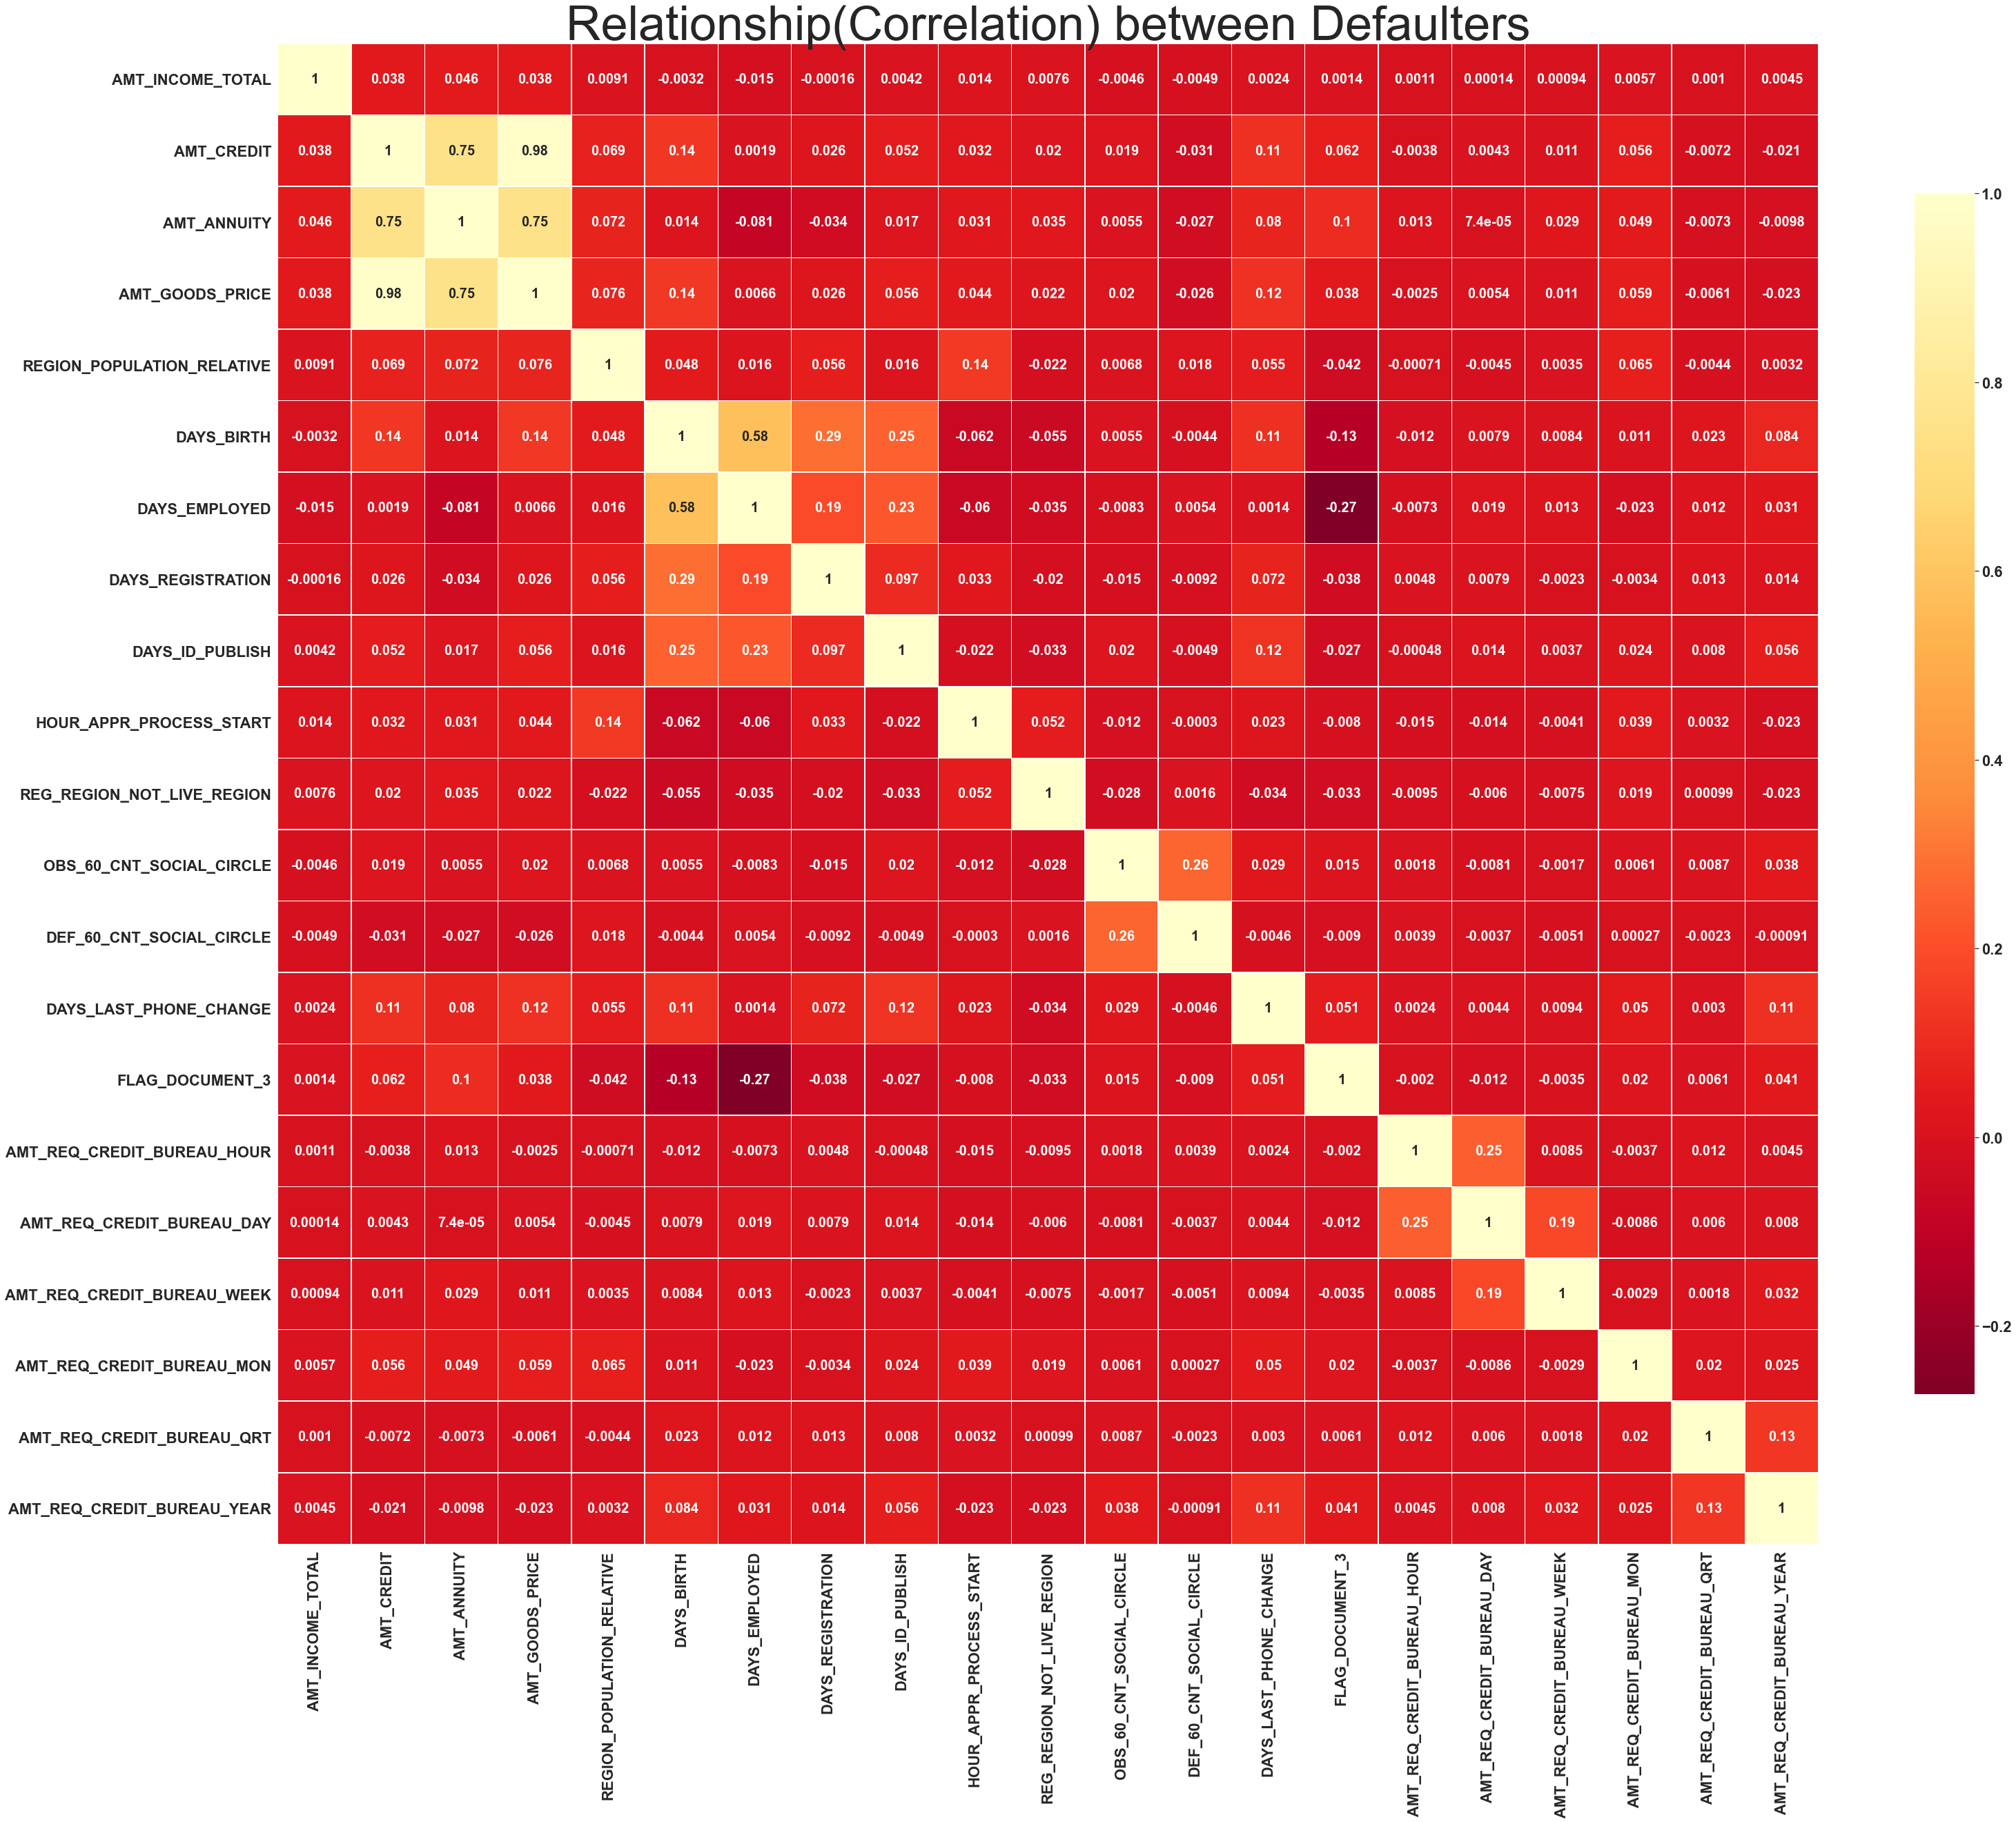

In [169]:
import seaborn as sns
corr = pd.DataFrame()
for col_a in list(df_defaulter.columns):
    #print(col_a)
    for col_b in list(df_defaulter.columns):
        corr.loc[col_a, col_b] = df_defaulter.corr().loc[col_a, col_b]

f, ax = plt.subplots(figsize=(50,40))
#cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
#sns.set_style("whitegrid")
sns.set(font_scale = 2)
sns.heatmap(corr, linewidths=0.5, cmap="YlOrRd_r",cbar_kws={"shrink": .8},annot=True,annot_kws={"fontsize":20})
sns.set(font_scale=1.5) 
plt.title('Relationship(Correlation) between Defaulters', fontsize = 70)
plt.show()

###### Conclusions: Credit amount of the loan is correlated well with loan annuality and the price of the goods for which the loan is given. Also number of days employed carry more weithage with loan repayment 

In [170]:
df_repayer = df_category_columns.loc[df_category_columns['TARGET'] == 0]

In [171]:
df_repayer = df_repayer.drop('TARGET', axis=1)

NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE


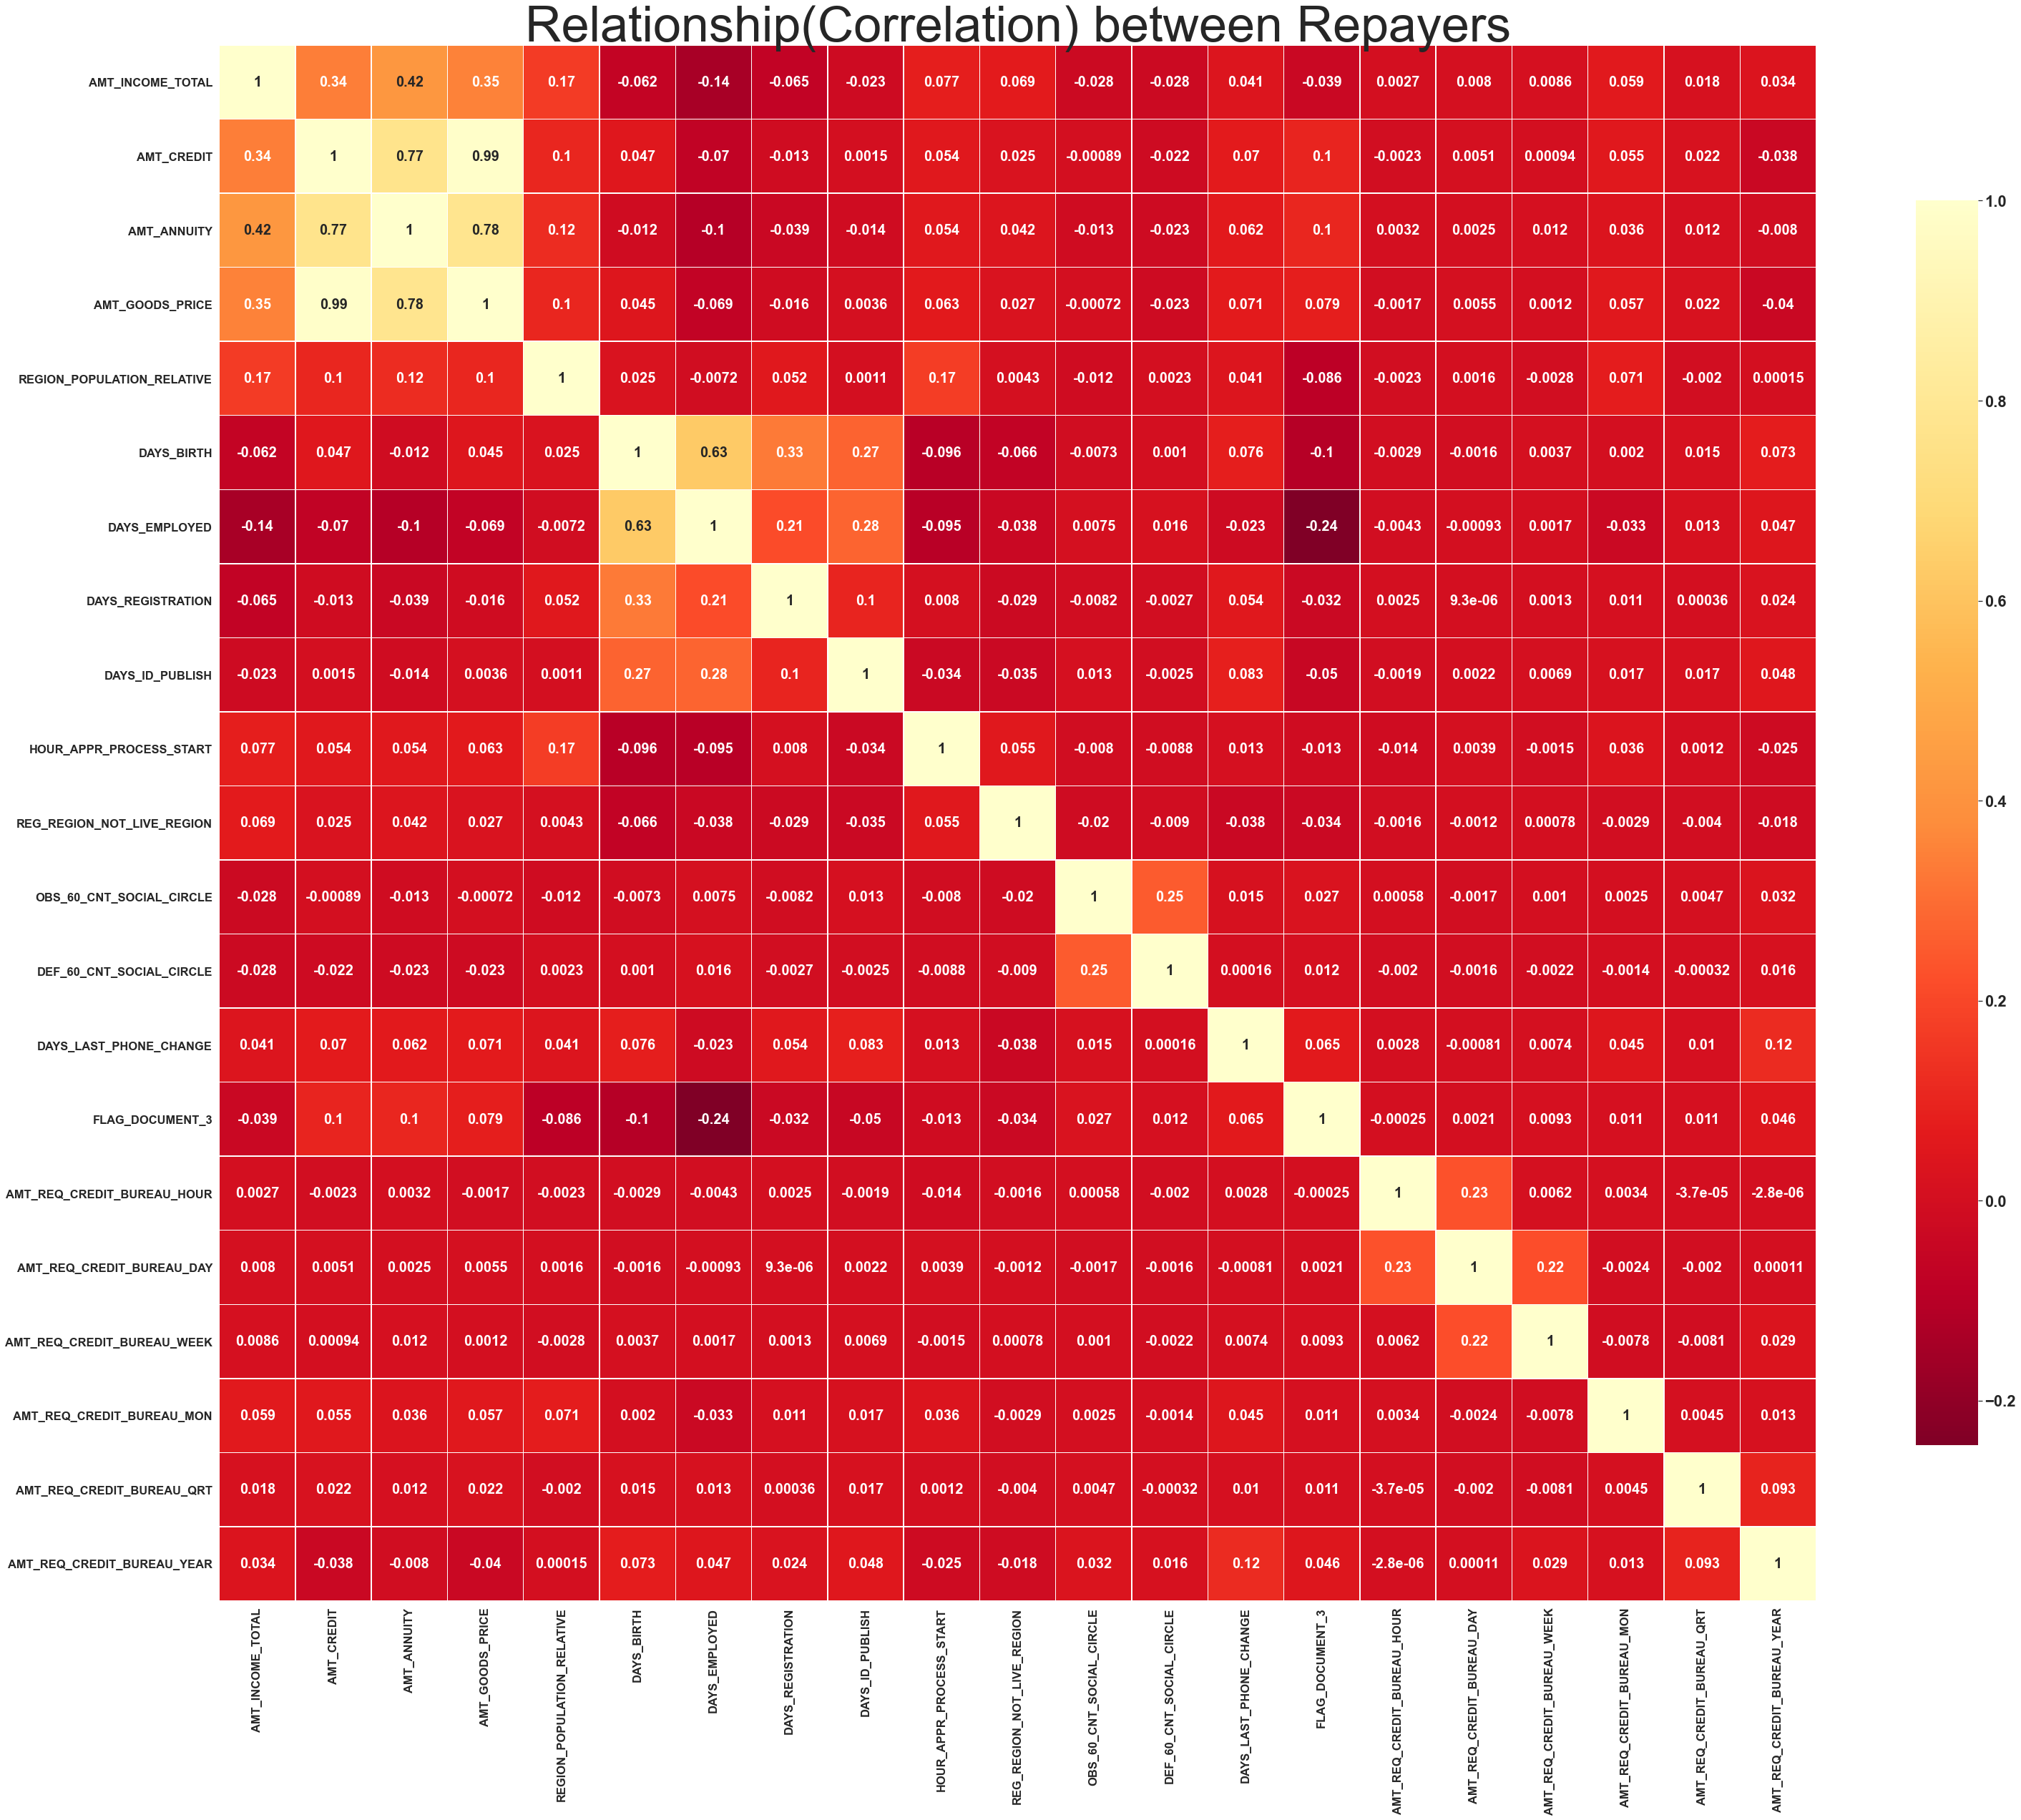

In [172]:
import seaborn as sns
corr = pd.DataFrame()
for col_a in list(df_repayer.columns):
    print(col)
    for col_b in list(df_repayer.columns):
        corr.loc[col_a, col_b] = df_repayer.corr().loc[col_a, col_b]

f, ax = plt.subplots(figsize=(50,40))
sns.set(font_scale = 2)
#cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.heatmap(corr, linewidths=0.5, cmap="YlOrRd_r",cbar_kws={"shrink": .8},annot=True,annot_kws={"fontsize":20})
sns.set(font_scale=1.5) 
plt.title('Relationship(Correlation) between Repayers', fontsize = 70)
plt.show()

###### Conclusions: Credit amount is strongly correlated with loan annuality and the price of the goods for which the loan is given and Total Income. Also  repayers have good  correlation in number of days client employed.

### Now from above correlation study its found that the columns viz.  AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE have dependcency so lets further explore that

<Figure size 2160x1440 with 0 Axes>

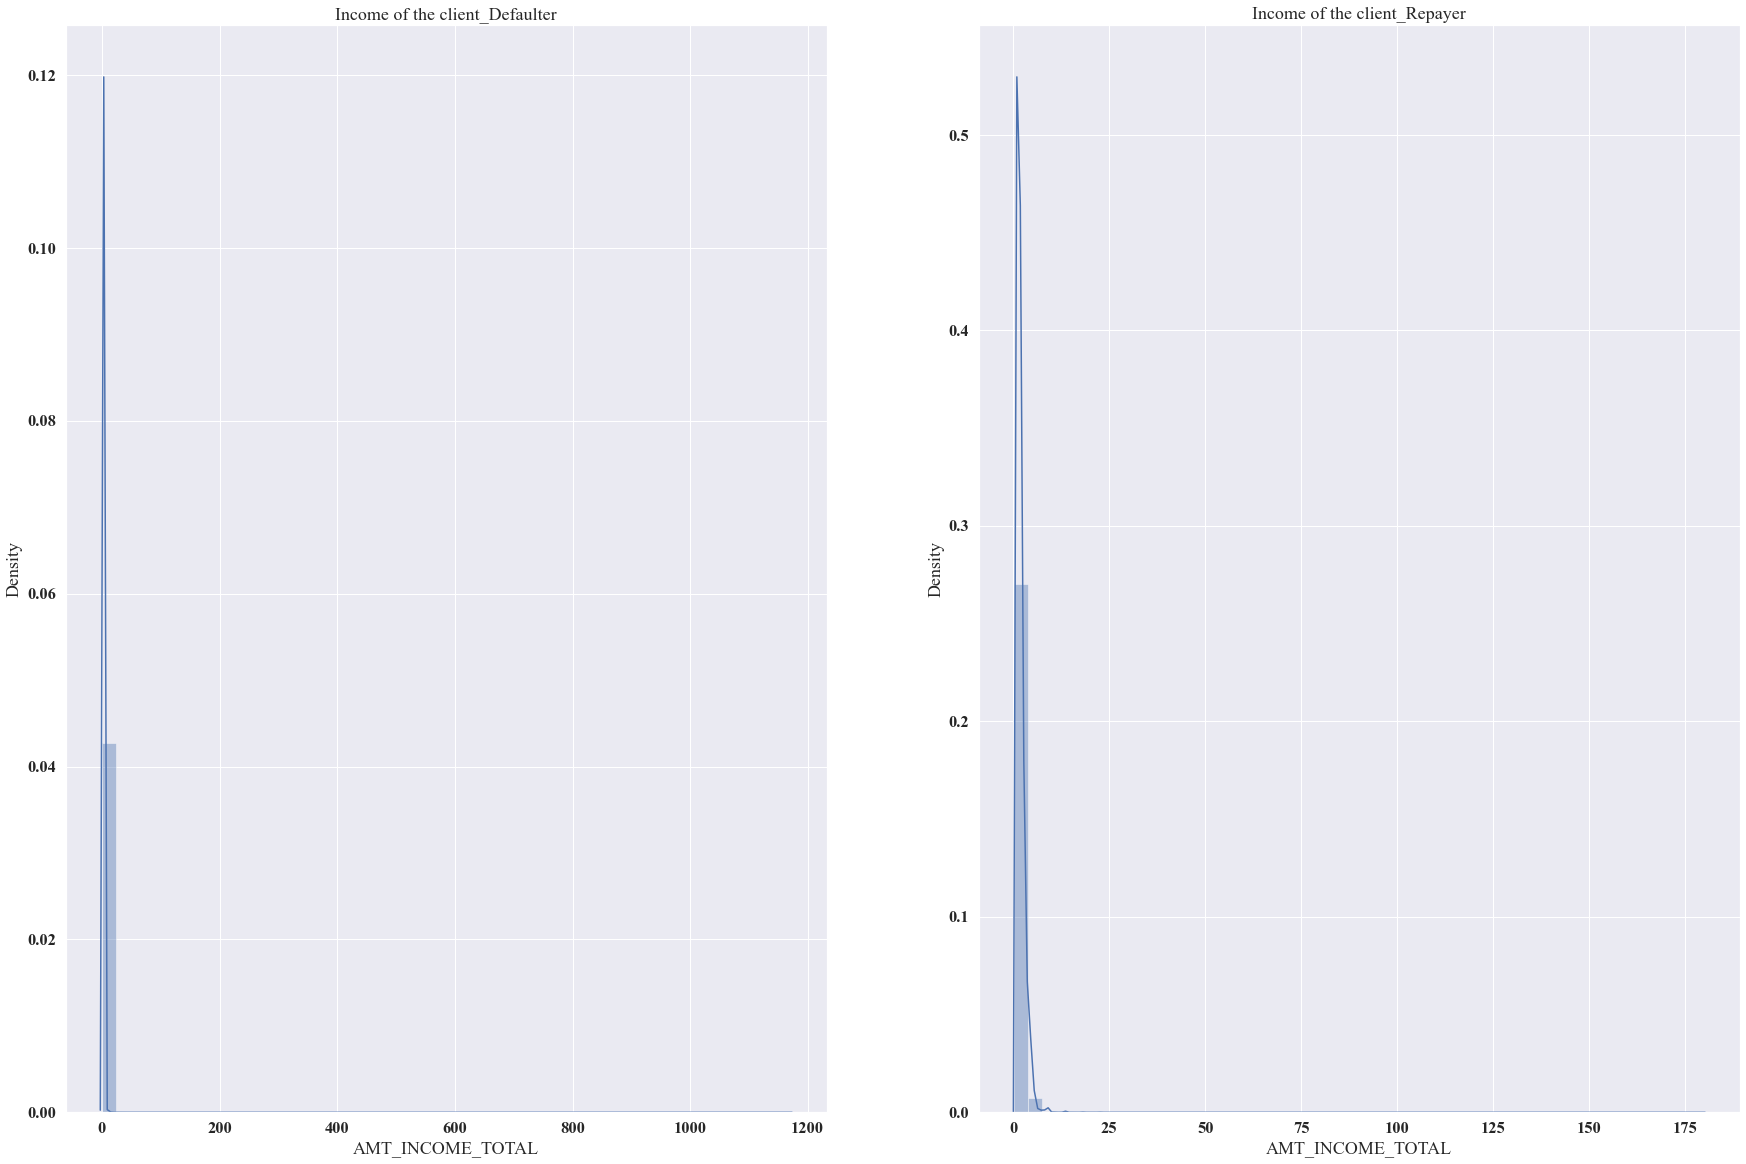

In [173]:
# Plotting distribution density plot for AMT_INCOME_TOTAL
fig = plt.figure(figsize=(30,20))
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)

plt.subplot(1,2,1)
x = pd.Series(df_defaulter['AMT_INCOME_TOTAL'])
ax = sns.distplot(x)
plt.title('Income of the client_Defaulter')
plt.subplot(1,2,2)
x = pd.Series(df_repayer['AMT_INCOME_TOTAL'])
ax = sns.distplot(x)
plt.title('Income of the client_Repayer')
plt.show()

<Figure size 2160x1440 with 0 Axes>

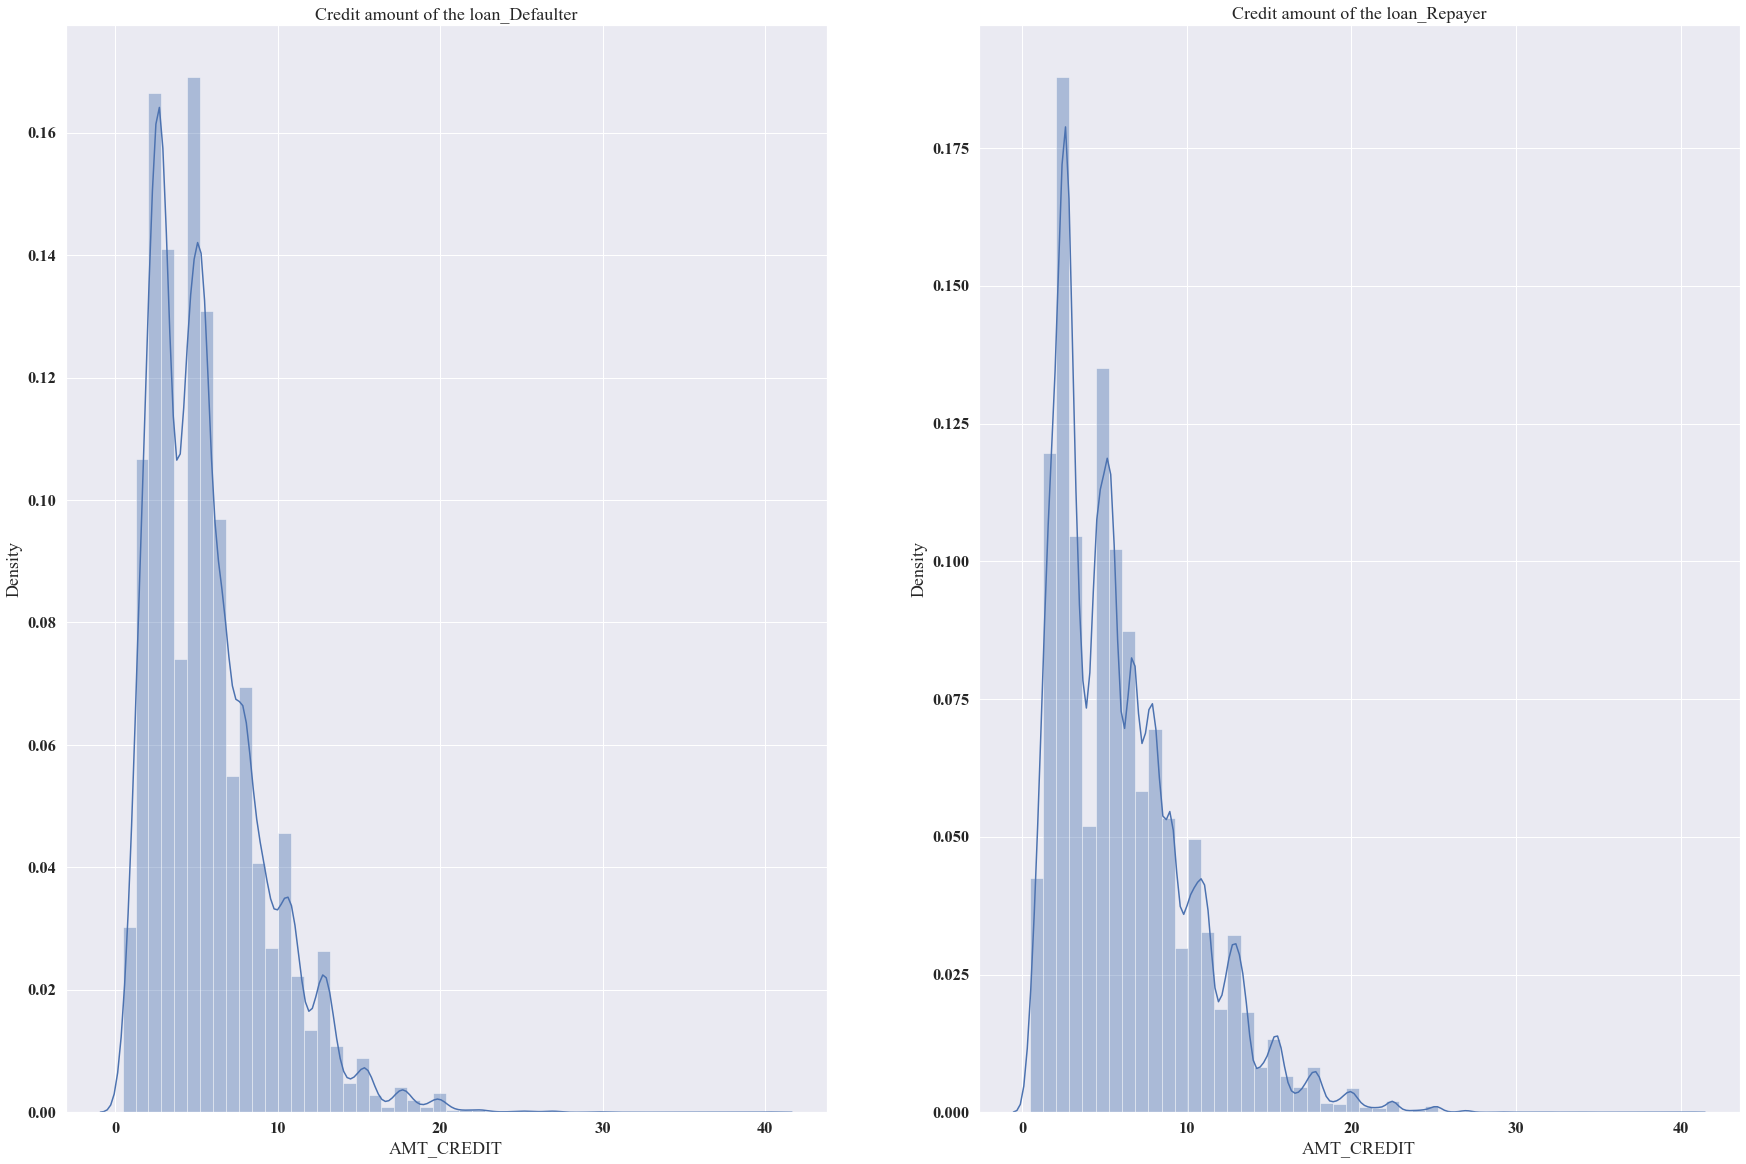

In [174]:
# Plotting distribution density plot for AMT_CREDIT
fig = plt.figure(figsize=(30,20))
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)

plt.subplot(1,2,1)
x = pd.Series(df_defaulter['AMT_CREDIT'])
ax = sns.distplot(x)
plt.title('Credit amount of the loan_Defaulter')
plt.subplot(1,2,2)
x = pd.Series(df_repayer['AMT_CREDIT'])
ax = sns.distplot(x)
plt.title('Credit amount of the loan_Repayer')
plt.show()

<Figure size 2160x1440 with 0 Axes>

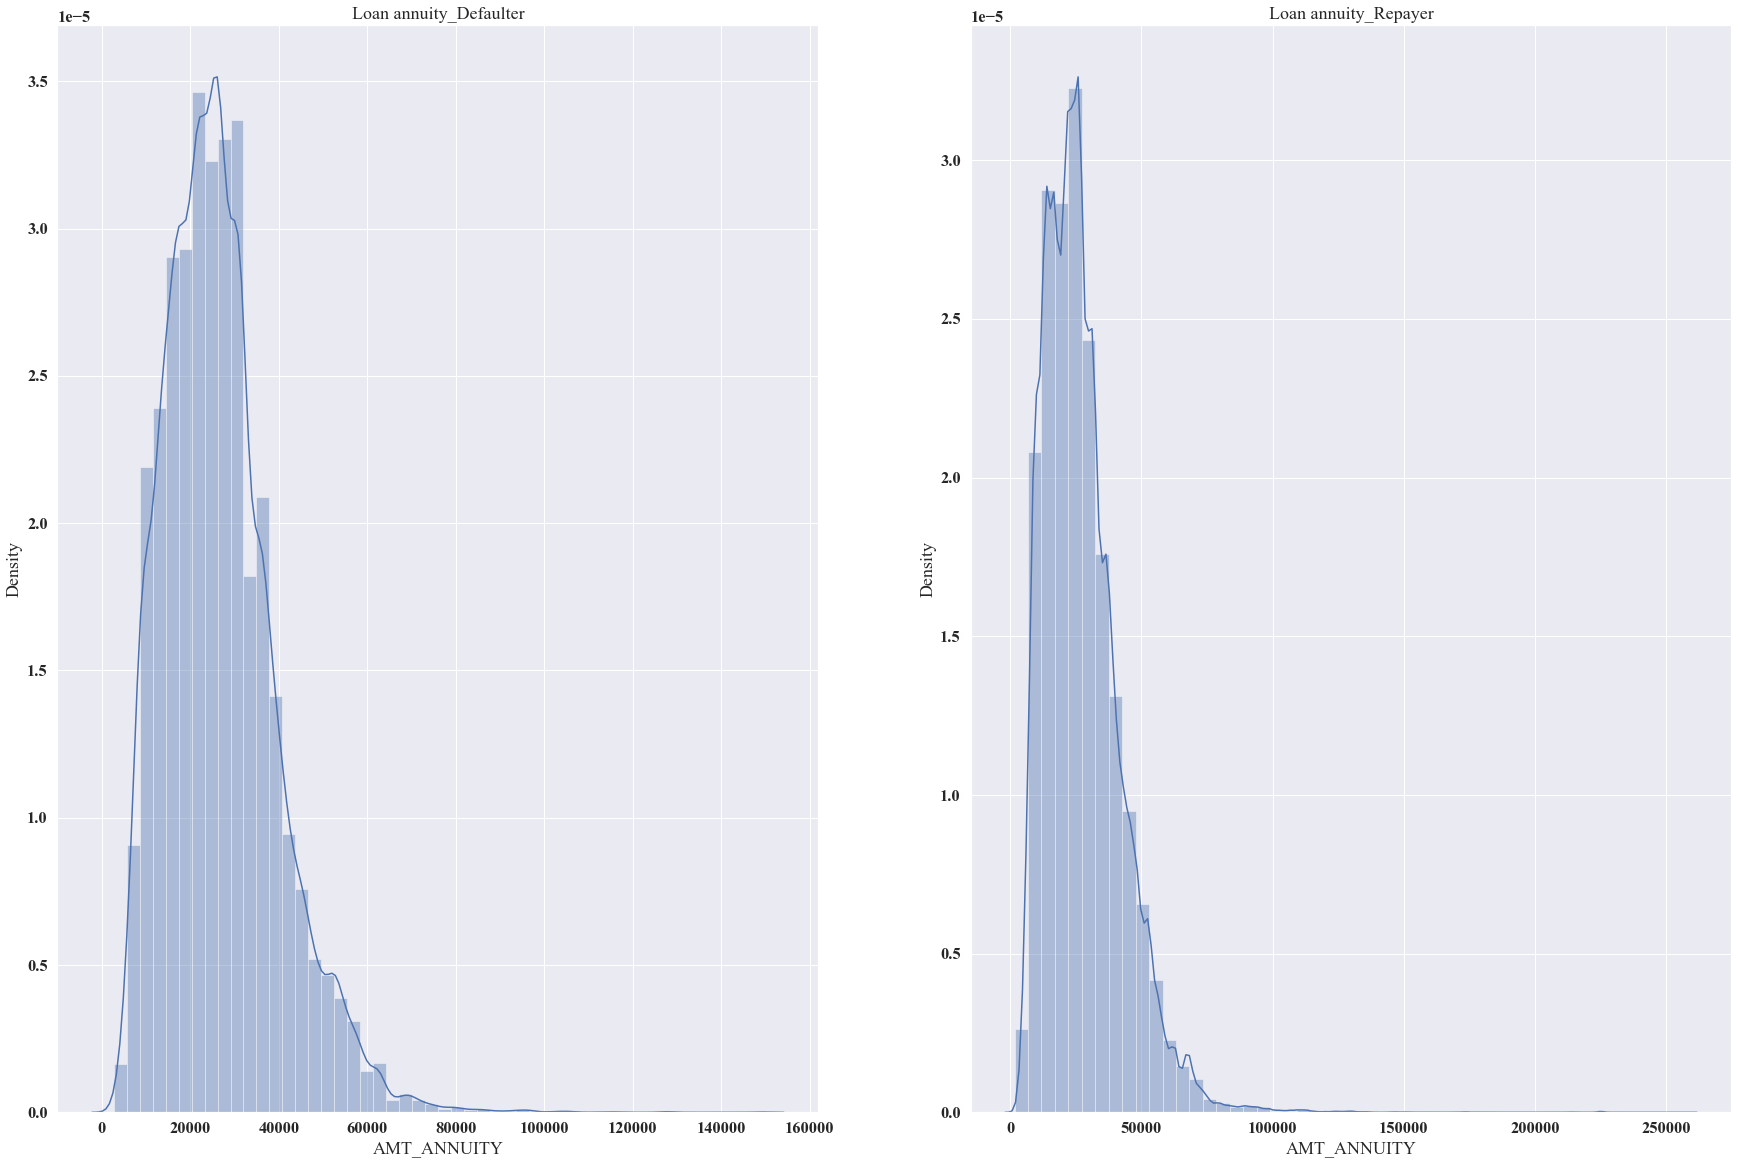

In [175]:
# Plotting distribution density plot for AMT_ANNUITY
fig = plt.figure(figsize=(30,20))
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)

plt.subplot(1,2,1)
x = pd.Series(df_defaulter['AMT_ANNUITY'])
ax = sns.distplot(x)
plt.title('Loan annuity_Defaulter')
plt.subplot(1,2,2)
x = pd.Series(df_repayer['AMT_ANNUITY'])
ax = sns.distplot(x)
plt.title('Loan annuity_Repayer')
plt.show()

<Figure size 2160x1440 with 0 Axes>

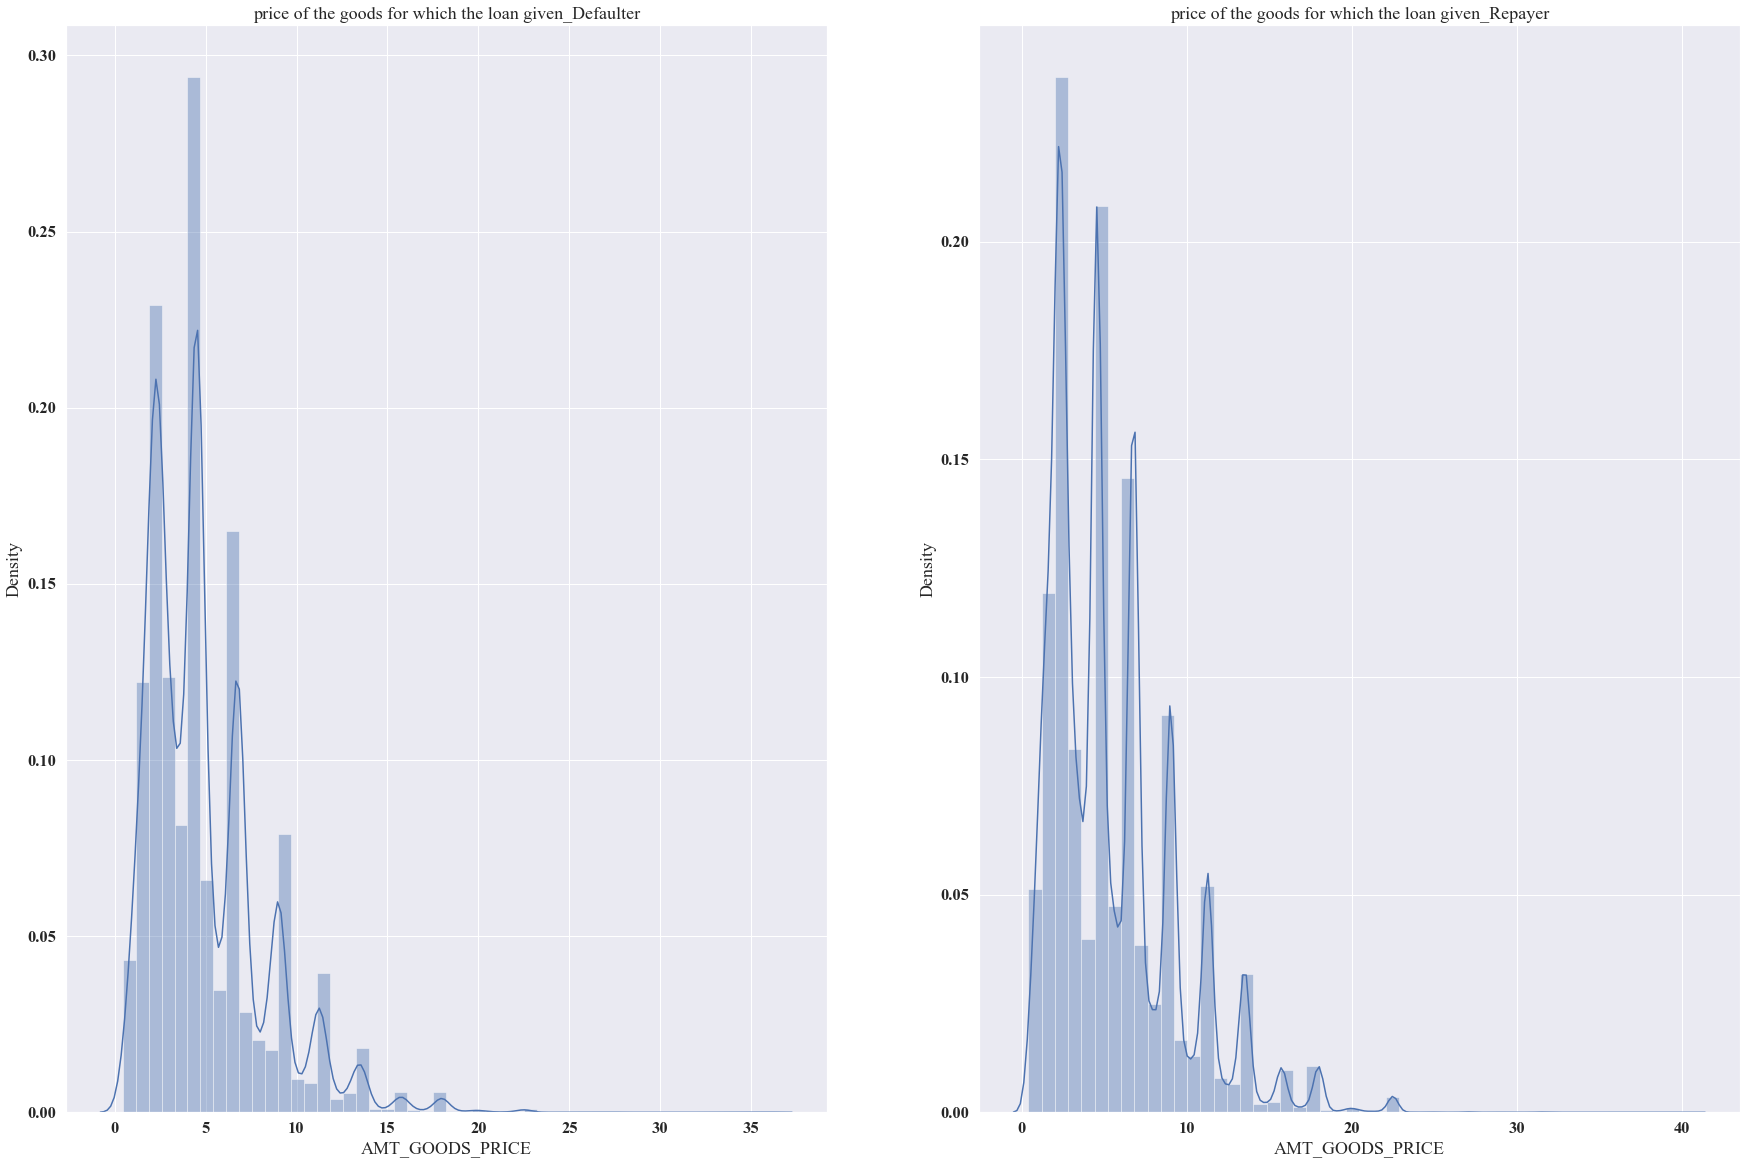

In [176]:
# Plotting distribution density plot for AMT_GOODS_PRICE
fig = plt.figure(figsize=(30,20))
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)

plt.subplot(1,2,1)
x = pd.Series(df_defaulter['AMT_GOODS_PRICE'])
ax = sns.distplot(x)
plt.title('price of the goods for which the loan given_Defaulter')
plt.subplot(1,2,2)
x = pd.Series(df_repayer['AMT_GOODS_PRICE'])
ax = sns.distplot(x)
plt.title('price of the goods for which the loan given_Repayer')
plt.show()

###### Conclusions: 1) Credit amount given to clients is approximately less than 10 lakhs 2) The repayers and defaulters shows similar distribution for all above four graphs and hence it may not suitable to make judgement based on this single varibale 

In [177]:
application_data_set["TARGET"] = application_data_set["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

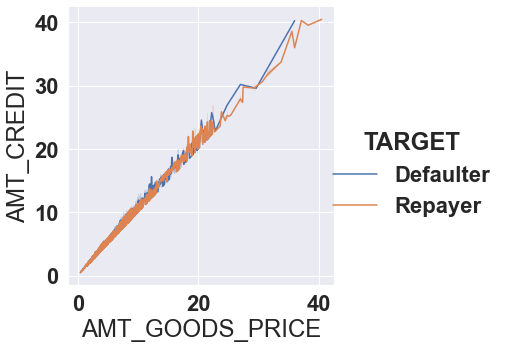

In [178]:
fig = plt.figure(figsize=(30,20))
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.figure(figsize=[30,20])
sns.relplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=application_data_set, hue='TARGET',kind="line")
plt.show()

###### Conclusion : With loan amount more than 30 lakh the defaulter people increases

In [179]:
application_data_set.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHA

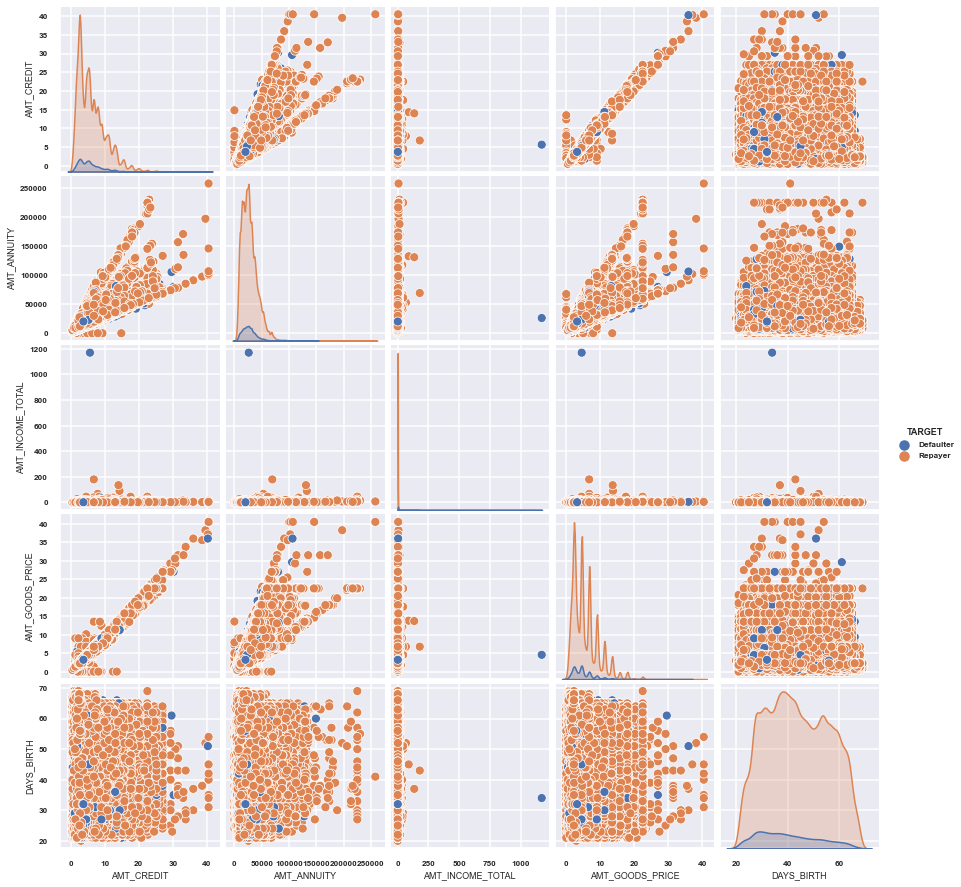

In [180]:
amount_bivariate_analysis = application_data_set[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','TARGET']].fillna(0)
sns.set_context("paper", rc={"axes.labelsize":5})
sns.set_context("talk", font_scale=0.5)
sns.pairplot(amount_bivariate_analysis,hue ='TARGET')
plt.show()

###### Conclusions:

###### 1)Loan Amount and Goods price shows positive  correlation 
###### 2) AMT_INCOME_TOTAL does not give any clear indication about defaulters and repayers 

### 9. Merging Two Dataframes to investigate and draw conclusions based on that

In [181]:
df_merge = application_data_set.merge(previous_data_set,on='SK_ID_CURR', how='inner')

In [182]:
df_merge.head()

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0      100002  Defaulter           Cash loans           M               Y   
1      100003    Repayer           Cash loans           F               N   
2      100003    Repayer           Cash loans           F               N   
3      100003    Repayer           Cash loans           F               N   
4      100004    Repayer      Revolving loans           M               Y   

  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0            0             2.025      4.065975        24700.5   
1            0             2.700     12.935025        35698.5   
2            0             2.700     12.935025        35698.5   
3            0             2.700     12.935025        35698.5   
4            0             0.675      1.350000         6750.0   

   AMT_GOODS_PRICE_x  ... CNT_PAYMENT NAME_YIELD_GROUP  \
0              3.510  ...        24.0       low_normal   
1             11.295  ...        12.0       low_normal   
2             11.295  ...         6.0           middle   
3             11.295  ...        12.0           middle   
4              1.350  ...         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest             365243            565   
1             Cash X-Sell: low             365243            716   
2   POS industry with interest             365243            797   
3  POS household with interest             365243           2310   
4  POS mobile without interest             365243            784   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                        125             25                17   
1                        386            536               527   
2                        647            647               639   
3                       1980           1980              1976   
4                        694            724               714   

   NFLAG_INSURED_ON_APPROVAL  YEARLY_DECISION  
0                          0                2  
1                          1                3  
2                          0                3  
3                          1                7  
4                          0                3  

[5 rows x 83 columns]

In [183]:
# Binning the columns based on Repayer or Defaulter
df_merge_default = df_merge[df_merge['TARGET']=='Repayer'] 
df_merge_repay = df_merge[df_merge['TARGET']=='Defaulter'] 

In [184]:
df_merge.describe()

SK_ID_CURR  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
count  1.413701e+06      1.413701e+06  1.413701e+06   1.413608e+06   
mean   2.784813e+05      1.733160e+00  5.875537e+00   2.701702e+04   
std    1.028118e+05      1.985734e+00  3.849173e+00   1.395116e+04   
min    1.000020e+05      2.565000e-01  4.500000e-01   1.615500e+03   
25%    1.893640e+05      1.125000e+00  2.700000e+00   1.682100e+04   
50%    2.789920e+05      1.575000e+00  5.084955e+00   2.492550e+04   
75%    3.675560e+05      2.070000e+00  8.079840e+00   3.454200e+04   
max    4.562550e+05      1.170000e+03  4.050000e+01   2.250000e+05   

       AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  \
count       1.412493e+06                1.413701e+06  1.413701e+06   
mean        5.277186e+00                2.074985e-02  4.421384e+01   
std         3.532465e+00                1.334702e-02  1.190217e+01   
min         4.050000e-01                2.900000e-04  2.000000e+01   
25%         2.385000e+00                1.003200e-02  3.400000e+01   
50%         4.500000e+00                1.885000e-02  4.300000e+01   
75%         6.795000e+00                2.866300e-02  5.400000e+01   
max         4.050000e+01                7.250800e-02  6.900000e+01   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  \
count   1.413701e+06       1.413701e+06     1.413701e+06  ...   
mean    7.266347e+04       5.003233e+03     3.034563e+03  ...   
std     1.433374e+05       3.551051e+03     1.507376e+03  ...   
min     0.000000e+00       0.000000e+00     0.000000e+00  ...   
25%     1.042000e+03       2.001000e+03     1.783000e+03  ...   
50%     2.401000e+03       4.508000e+03     3.330000e+03  ...   
75%     6.313000e+03       7.510000e+03     4.319000e+03  ...   
max     3.652430e+05       2.467200e+04     7.197000e+03  ...   

       AMT_REQ_CREDIT_BUREAU_YEAR  YEARS_EMPLOYED    SK_ID_PREV  \
count                1.413701e+06    1.413701e+06  1.413701e+06   
mean                 2.691239e+00    1.985500e+02  1.922744e+06   
std                  2.157176e+00    3.926378e+02  5.327153e+05   
min                  0.000000e+00    0.000000e+00  1.000001e+06   
25%                  1.000000e+00    2.000000e+00  1.461346e+06   
50%                  2.000000e+00    6.000000e+00  1.922698e+06   
75%                  4.000000e+00    1.700000e+01  2.384012e+06   
max                  2.500000e+01    1.000000e+03  2.845381e+06   

       AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  \
count   1.413701e+06     1.413701e+06  1.413700e+06       1.413701e+06   
mean    1.484032e+04     1.752436e+05  1.963541e+05       1.854396e+05   
std     1.316370e+04     2.936222e+05  3.194813e+05       2.881244e+05   
min     0.000000e+00     0.000000e+00  0.000000e+00       0.000000e+00   
25%     7.406055e+03     1.975050e+04  2.488050e+04       4.500000e+04   
50%     1.125000e+04     7.087050e+04  8.059500e+04       7.087500e+04   
75%     1.674797e+04     1.800000e+05  2.156400e+05       1.800000e+05   
max     4.180581e+05     5.850000e+06  4.509688e+06       5.850000e+06   

       DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count   1.413701e+06      1.413701e+06  1.413701e+06  
mean    8.803670e+02      3.149878e+02  1.256367e+01  
std     7.835402e+02      7.695082e+03  1.448807e+01  
min     1.000000e+00     -1.000000e+00  0.000000e+00  
25%     2.710000e+02     -1.000000e+00  0.000000e+00  
50%     5.820000e+02      4.000000e+00  1.000000e+01  
75%     1.313000e+03      8.500000e+01  1.800000e+01  
max     2.922000e+03      4.000000e+06  8.400000e+01  

[8 rows x 36 columns]

In [185]:
df_merge['NAME_CONTRACT_STATUS'].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [186]:
df_merge['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                                   45
Money for a

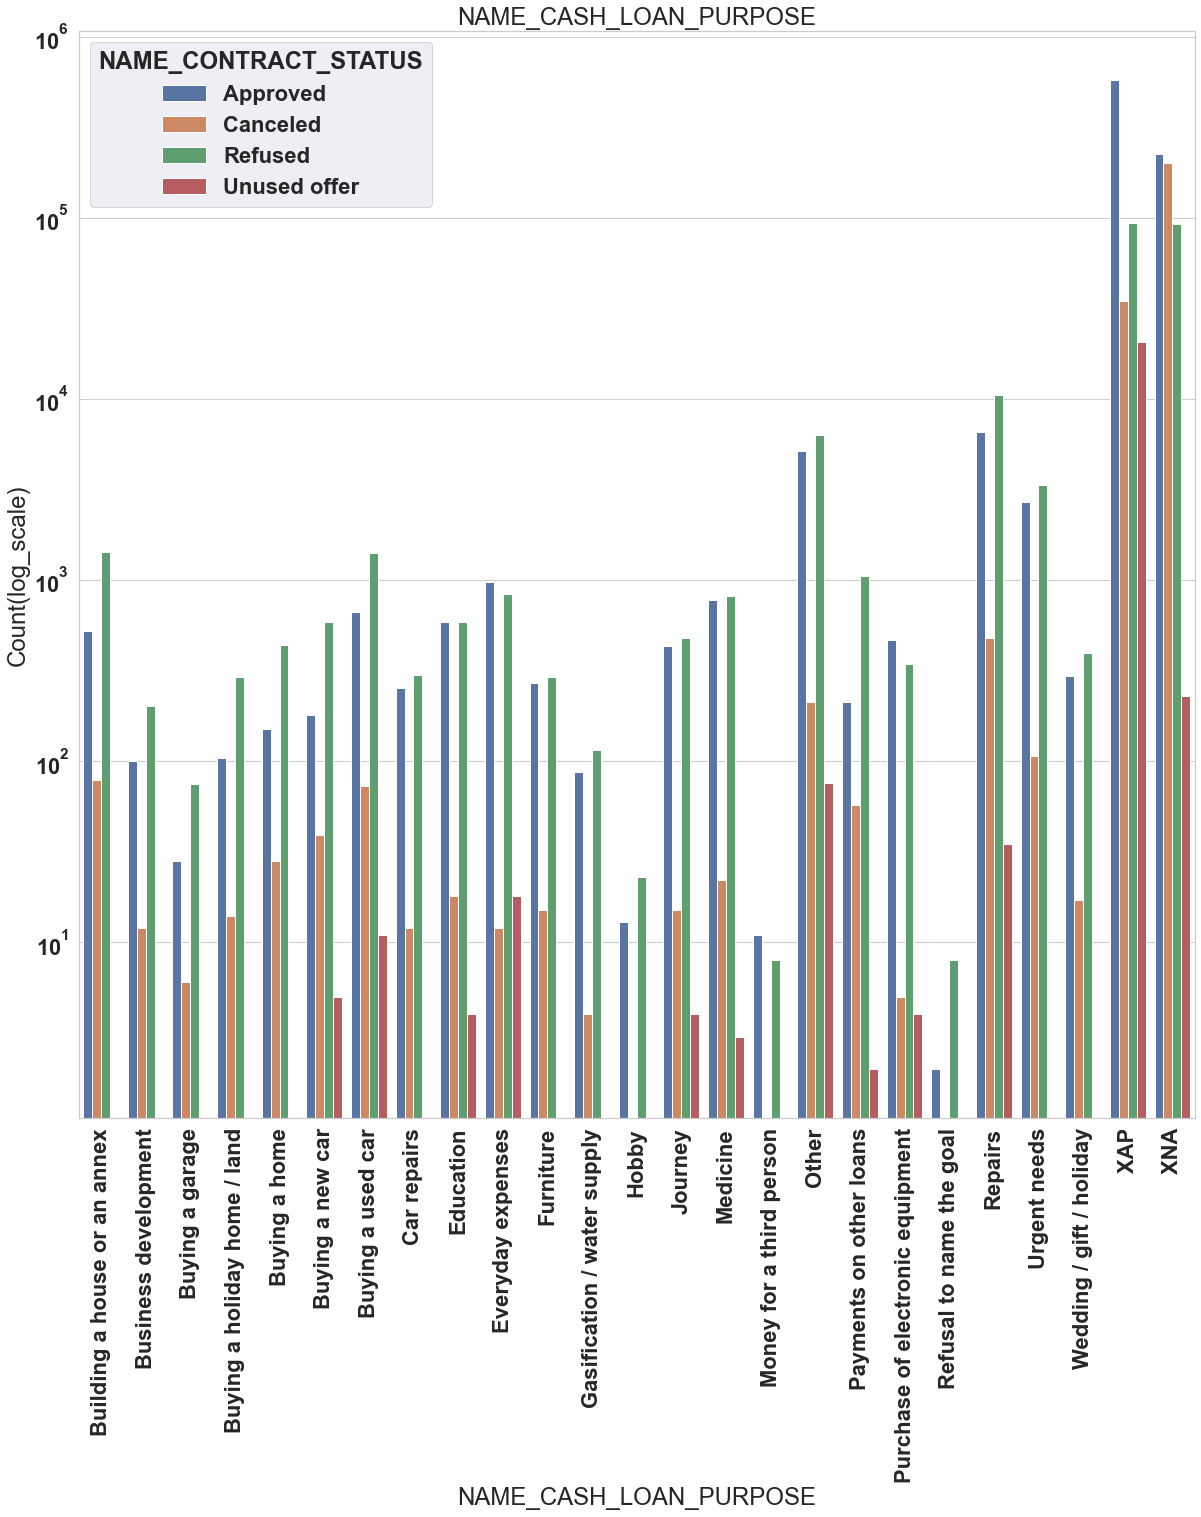

In [198]:
univariate_type(df_merge_default,'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS',True,True)

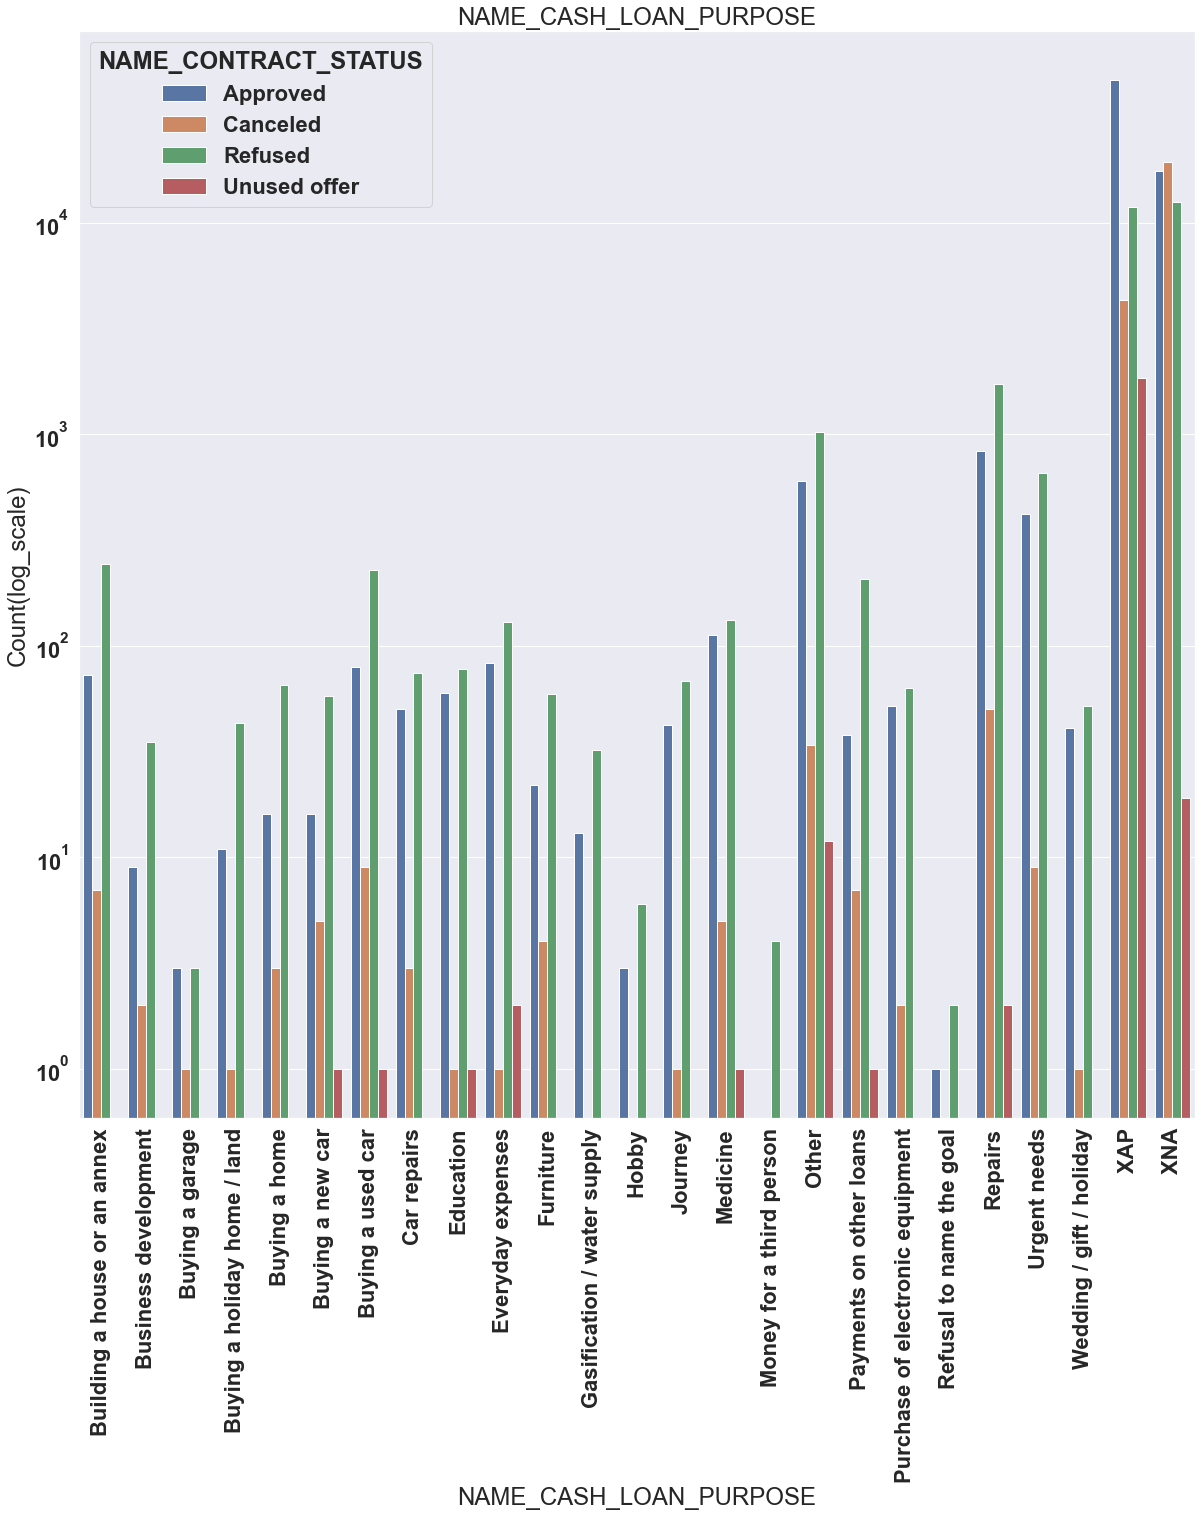

In [188]:
univariate_type(df_merge_repay,'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS',True,True)

###### Inferences: 1) Purpose of the cash loan for repair and other has substantial applicant and in this category more applictions are rejected  2) Also XNA and XAP which are the purpose of loan have the most application for  

In [189]:
df_merge['NAME_CLIENT_TYPE'].dtypes

CategoricalDtype(categories=['New', 'Refreshed', 'Repeater', 'XNA'], ordered=False)

In [190]:
df_merge['NAME_CONTRACT_STATUS'].dtypes

CategoricalDtype(categories=['Approved', 'Canceled', 'Refused', 'Unused offer'], ordered=False)

In [191]:
df_merge["TARGET"] = df_merge["TARGET"].replace({'Defaulter':1, "Repayer": 0})

In [192]:
df_merge_loan_payment_diff_1 = pd.pivot_table(df_merge, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

In [193]:
df_merge_loan_payment_diff_1

NAME_CONTRACT_STATUS  Approved  Canceled   Refused  Unused offer
NAME_CLIENT_TYPE                                                
New                   0.088216  0.145205  0.110940      0.089448
Refreshed             0.065158  0.081098  0.117412      0.074324
Repeater              0.072144  0.091767  0.120596      0.083338
XNA                   0.071264  0.101377  0.135714      0.103448

<Figure size 3600x2880 with 0 Axes>

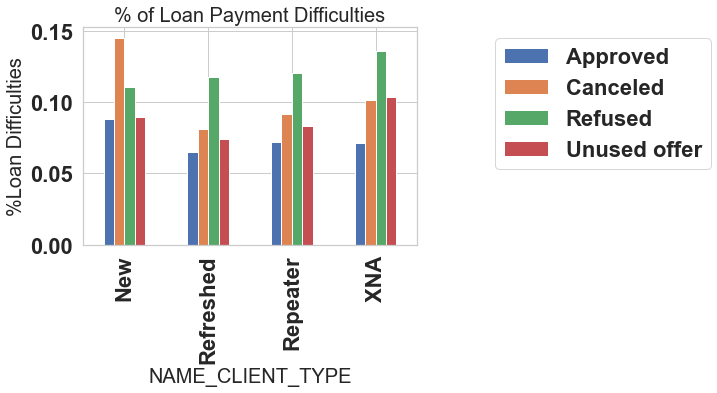

In [194]:
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(50, 40))
sns.set_style("whitegrid")
ax = df_merge_loan_payment_diff_1.plot(kind='bar')

plt.setp(ax.get_legend().get_texts(), fontsize='10') 
plt.setp(ax.get_legend().get_title(), fontsize='10') 

ax.legend(bbox_to_anchor= (1.2,1))
ax.axes.set_title("% of Loan Payment Difficulties",fontsize=20)
ax.set_xlabel("NAME_CLIENT_TYPE",fontsize=20)
ax.set_ylabel("%Loan Difficulties",fontsize=20)

plt.show()

######  Client who are "NEW and  could scure loan application previously ( 'Cancelled')tend to be more  % of Loan-Payment Difficulties 

In [195]:
df_merge_loan_payment_diff_2 = pd.pivot_table(df_merge, values='TARGET', index=['NAME_CONTRACT_TYPE_y'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

<Figure size 3600x2880 with 0 Axes>

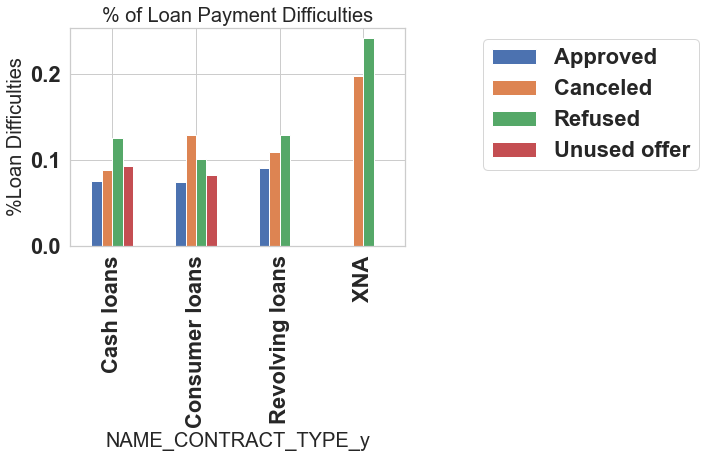

In [196]:
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(50, 40))
sns.set_style("whitegrid")
ax = df_merge_loan_payment_diff_2.plot(kind='bar')

plt.setp(ax.get_legend().get_texts(), fontsize='10') 
plt.setp(ax.get_legend().get_title(), fontsize='10') 

ax.legend(bbox_to_anchor= (1.2,1))
ax.axes.set_title("% of Loan Payment Difficulties",fontsize=20)
ax.set_xlabel("NAME_CONTRACT_TYPE_y",fontsize=20)
ax.set_ylabel("%Loan Difficulties",fontsize=20)

plt.show()

###### Clients with 'Revolving loans' and also 'Refused' status previously have more difficulties in  % of Loan-Payment Difficulties. More over no conclucions can be drawn for XNA loan application which is unknown

## Conclusions: Business Objectives

###### After doing data analysis study on both the datasets viz. application and previous, we can draw some insights about whether bank can potenatially identify risk associated with offering loan to certain customers. There are certain attibutes which can help to bank to draw some conclusions.

## <p style="font-family: Arial; font-size:1.5em;color:Green;"> A. Factors which predict the client can be defaulter</p>

###### 1) Lower Secondary’ in ‘NAME_EDUCATION_TYPE’  has more difficulty in repaying loans 
###### 2)‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’ also has maximum difficulty in loan repayment
###### 3)‘Maternity Leave’ in ‘NAME_INCOME_TYPE’ also has maximum difficulty in loan repayment. 
###### 4) 0-5 years of employment are more likely to default loan 
###### 5)AMT_INCOME_TOTAL:Higher income people less likely to defaulters
###### 6) CNT_CHILDREN: More number of children >3 are more likely to defaulters

## <p style="font-family: Arial; font-size:1.5em;color:Green;"> B. Factors which predict the client can be a potential repayer and can be helpful for business profit</p>

###### 1) People who are Student and Businessmen are most likely to repay loans
###### 2) Loans which are perosnal in nature like hobby are likely to be repay
###### 3) People who are towards their retirement i.e. age > 50 have good track record of repayment 
###### 4) Women have higher chances of repayment of loan
###### 5) Marraige also is driving factor while deciding loan repayment i.e. applicant who are single and civil marraige are more likely to repay loan 
###### 6) if price of the goods for which the loan given is less than ~3 lakh there are higher chances getting repayment

## <p style="font-family: Arial; font-size:1.5em;color:Green;"> C. Factors which can be helpful to offer the loan but reduce its amount & at higher interest rates</p>

###### 1) Based on number of family members (i.e. if number is large) reduce amount of loan than eligible (say some % of take home salary)  can be offered at higher interest rates

###### 2) People who have Goods price and less income can be potential customer for reduce loan and higher interest rates

###### 3) If client refused to mention the purpose of loan can be targeted with reduced loan amount and higher interest rate

###### 4) Client who have refused loan previosuly and refused purpose can be targated with with extra security assurance to increase the business